# Decision Tree Classifier for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts and 151 samples labeled in the semi-supervised learning task. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the decision tree algorithm.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree.export import export_text
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from XLB import *

import warnings
warnings.filterwarnings('ignore')

d:\program files\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


Here we load the data from the csv file and preprocess it by removing the header row and the filename column

After the initial preprocessing step, we separated the music features and the labelled emotion into the x_train and y_train arrays respectively

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# WINNER: 47.62% 0.45
feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [3]:
#MOVING FEATURE HEADERS INTO A LIST
import csv

with open("FinalTrainingSet.csv") as f:
    reader = csv.reader(f)
    features = next(reader)

#Deleting everything except features from the dataset
features.remove("Row Labels")
features.remove("Theme")
features.remove("Theme(Numbered)")
print(len(features))
#Retained features after selection
selected_feats = feat_sel_2.get_support(True)

for ind, ft in sorted(enumerate(features), reverse=True): 
    if ind not in selected_feats:
        del features[ind]
  
#Printing modified list 
#print (features) 
#print (len(features))

324


In [4]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))    

Here we perform different methods to deal with imbalanced datasets. We used the oversampling *Insert link to oversampling if needed* and SMOTE methodology *Insert link to SMOTE if needed*

Here we defined a function that will train the model and perform the hyperparameter search. x_train is the input data, y_train is the labels for the input data, and hp_search is the algorithm for hyperparameter search

This function trains the model, using the previously defined train_model function, and displays the confusion matrix of the model. 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the decison tree object and the hyperparameter search object.

In [5]:
# Decision Tree
random_search_iterations = 1000
n_splits = 5
rand_seed = 481516234

parameters = {
    'criterion':["gini", "entropy"], 
    'splitter':["best", "random"], 
    'max_depth':range(1, num_features + 1), 
    'min_samples_split': uniform(loc=0.00,scale=1.0),
    'min_samples_leaf': uniform(loc=0.0001,scale=0.4999)
}

# train classifier for SMOTE data
dt = tree.DecisionTreeClassifier(random_state=rand_seed)
rscv = RandomizedSearchCV(dt, parameters,cv=n_splits, random_state=rand_seed, n_iter=random_search_iterations,n_jobs=-1)

This model is trained using the default 

Best Score: 0.6957
Vanilla Train Accuracy: 68.8279%


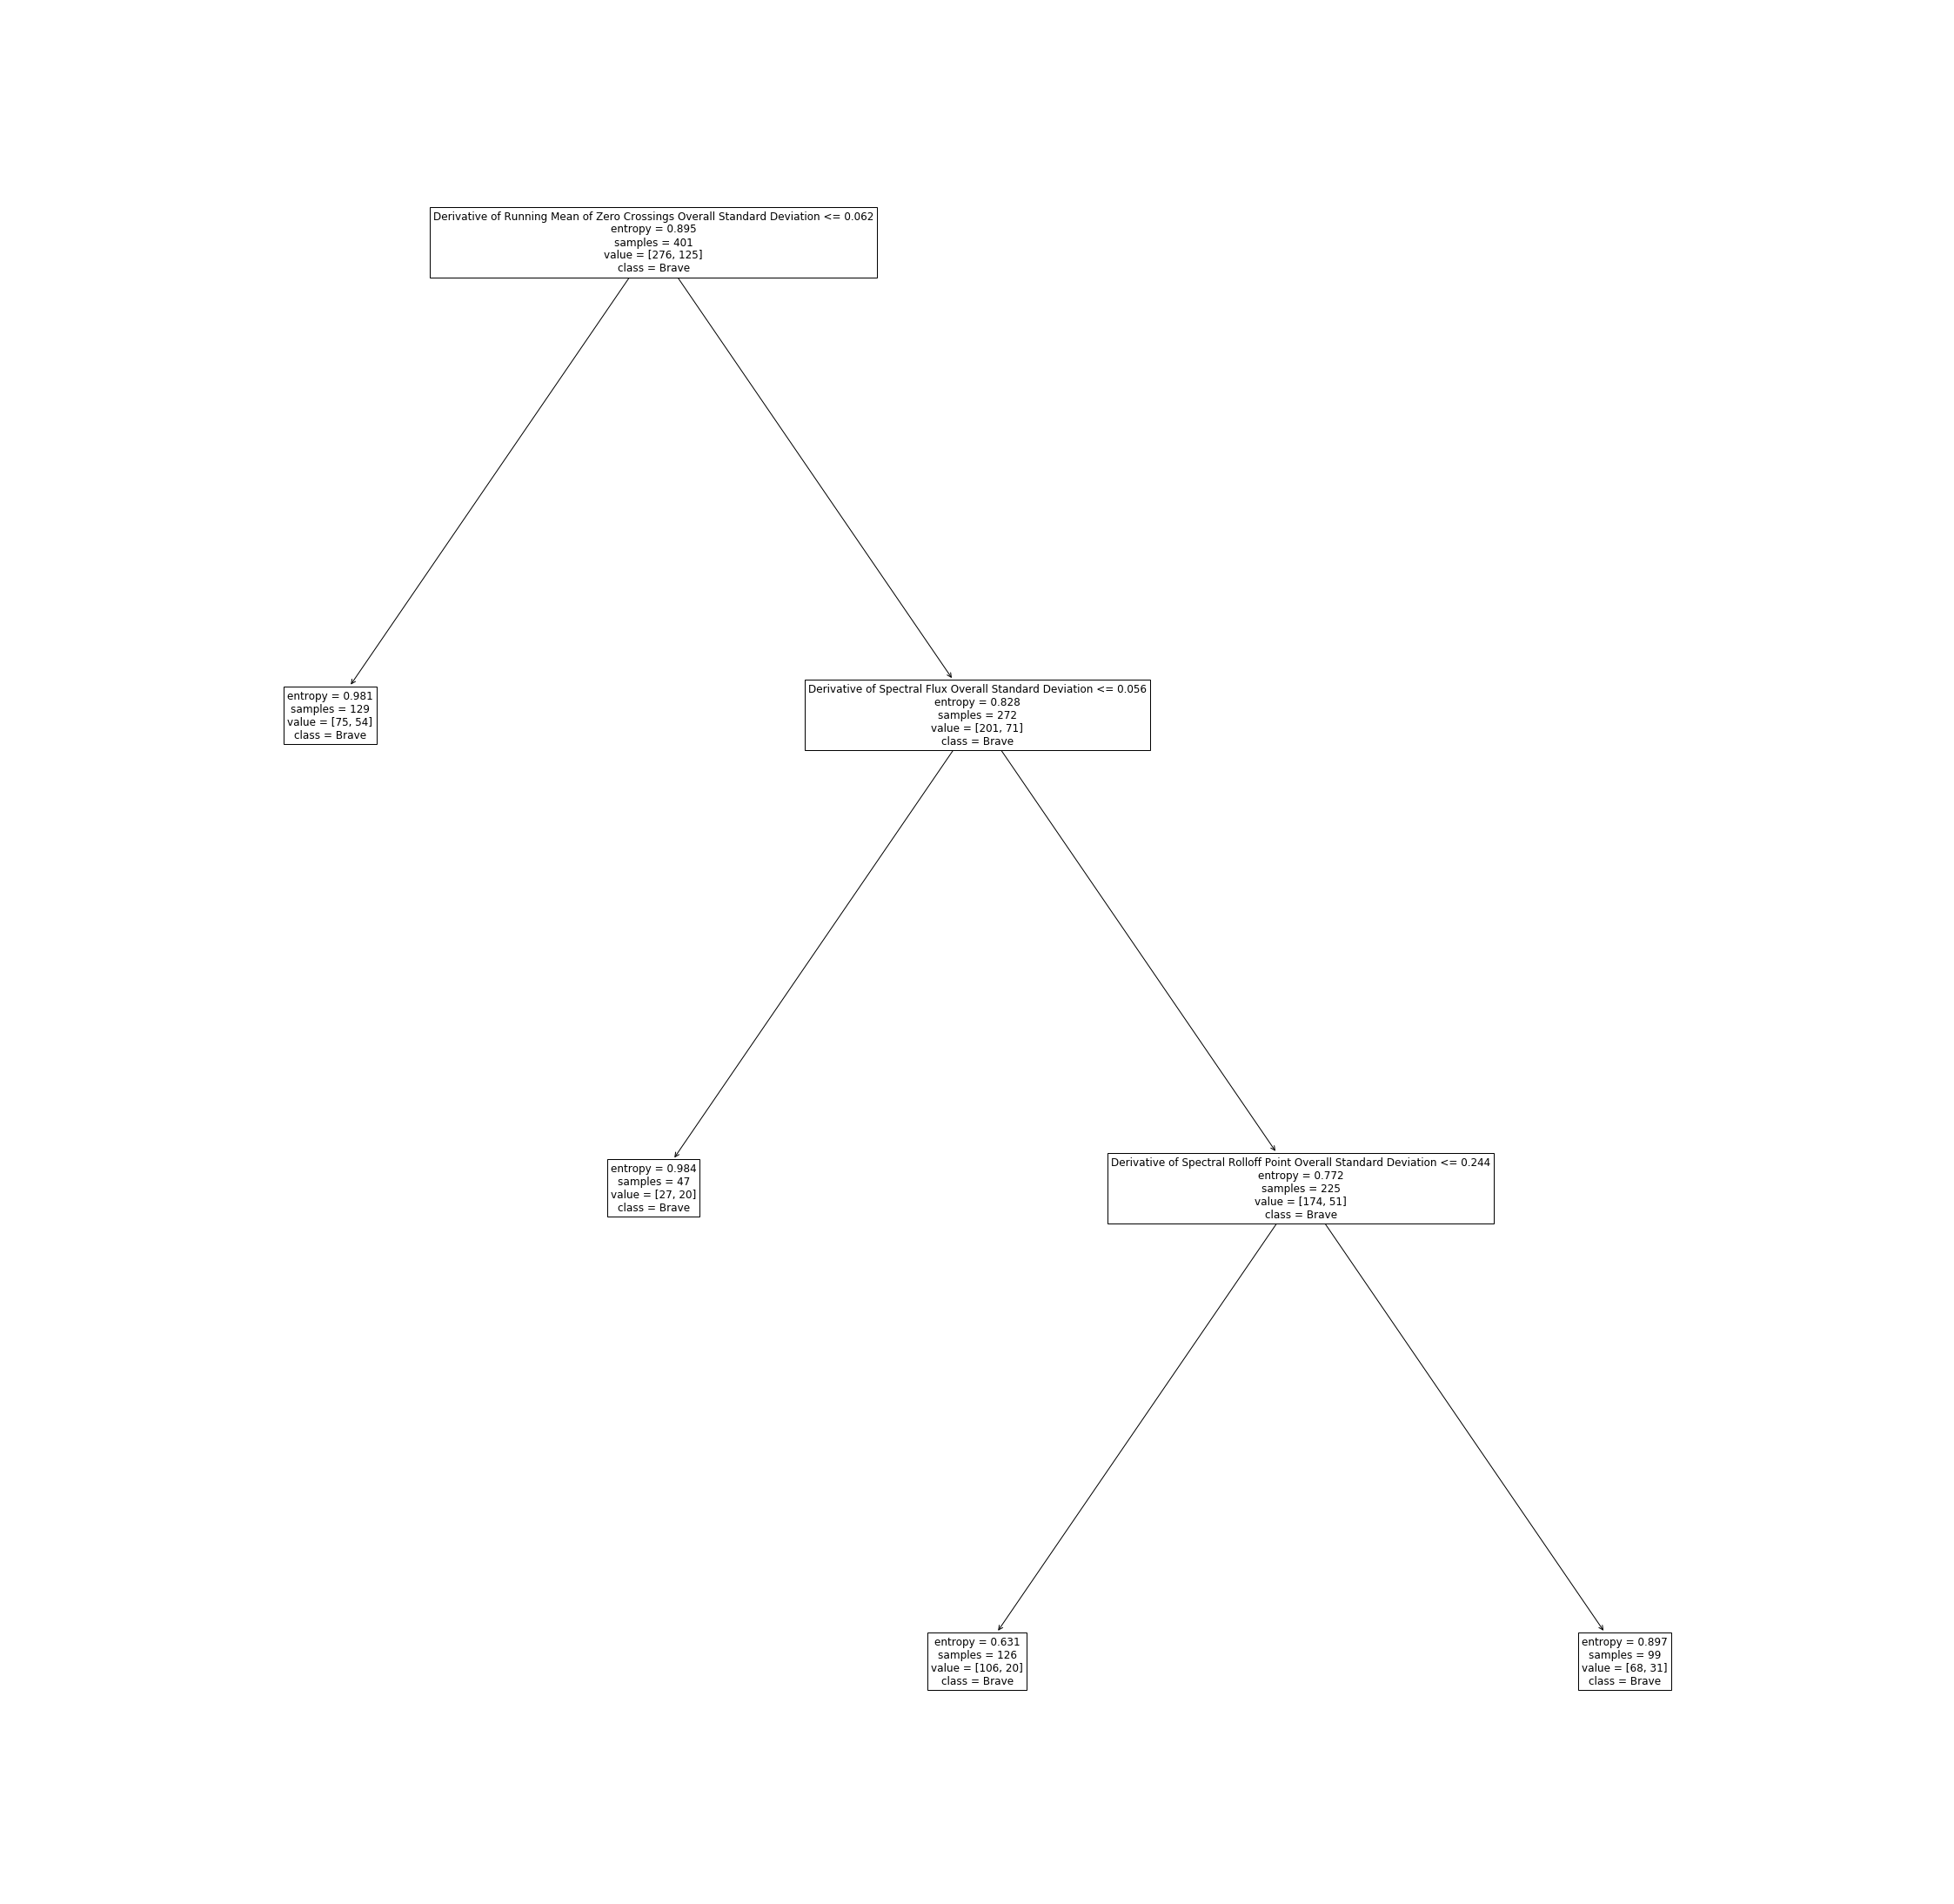

Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.06 and not Themes == 1 Confidence: 0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.06 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average <= 0.06 and not Themes == 1 Confidence: 0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average > 0.06 and Derivative_of_Relative_Difference_Function_Overall_Average <= 0.24 and not Themes == 1 Confidence: 0
Derivative_of_Relative_Difference_Function_Overall_Average > 0.24 and not Themes == 1 Confidence: 0.6882793017456359
Average Confidence: 0.17206982543640897
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.06 and not Themes == 1 Lift: 0.0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.06 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average <= 0.06 and not Themes == 1 Lift: 0.0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average > 0.06 and Derivative_of_Relative_Difference_Function_Ove

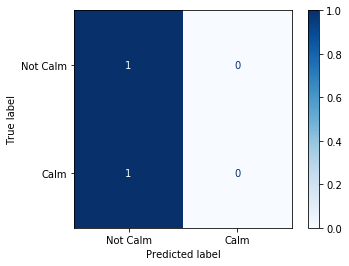

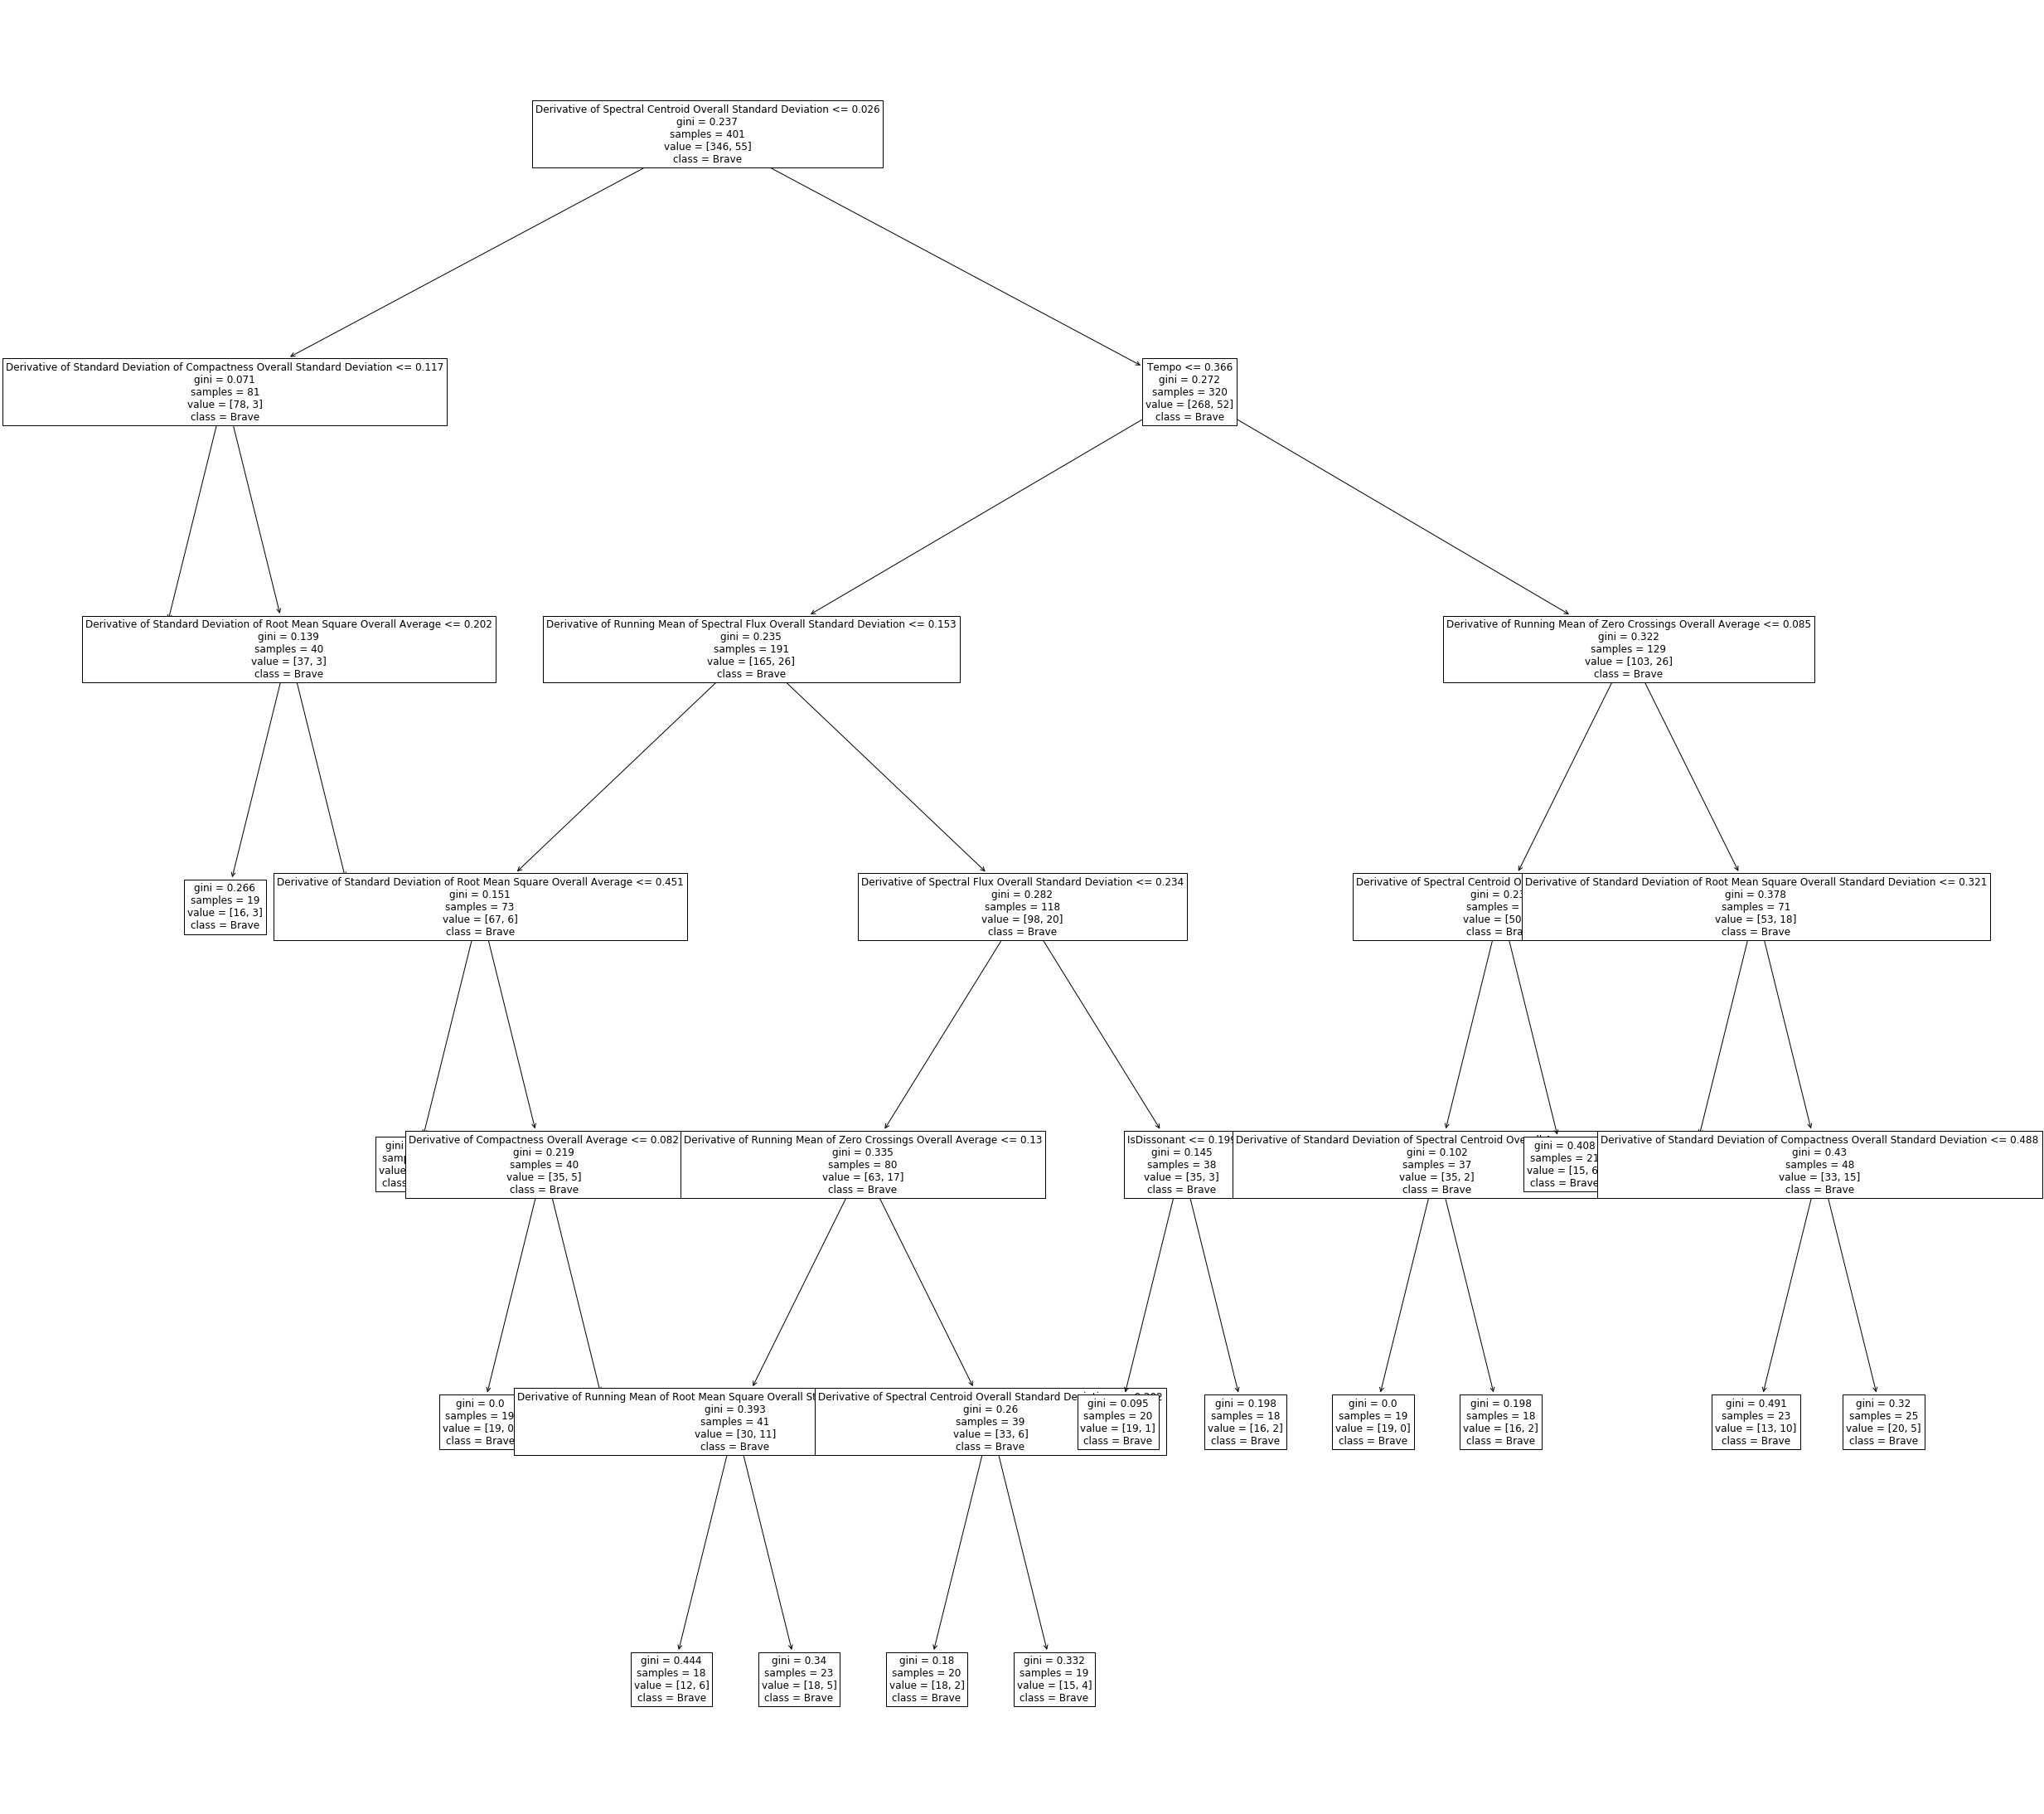

Derivative_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.03 and Derivative_of_Running_Mean_of_LPC_Overall_Average <= 0.12 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_LPC_Overall_Average > 0.12 and Derivative_of_Running_Mean_of_MFCC_Overall_Average <= 0.20 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_MFCC_Overall_Average > 0.20 and not Themes == 2 Confidence: 0.8628428927680798
Derivative_of_Partial_Based_Spectral_Flux_Overall_Average > 0.03 and IsMajor <= 0.37 and Standard_Deviation_of_Spectral_Rolloff_Point_Overall_Average <= 0.15 and Derivative_of_Running_Mean_of_MFCC_Overall_Average <= 0.45 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_MFCC_Overall_Average > 0.45 and Derivative_of_Standard_Deviation_of_Root_Mean_Square_Overall_Standard_Deviation <= 0.08 and not Themes == 2 Confidence: 0.8628428927680798
Derivative_of_Standard_Deviation_of_Root_Mean_Square_Overall_Standard_Deviation > 0.08 and not Themes == 2 Confidence: 

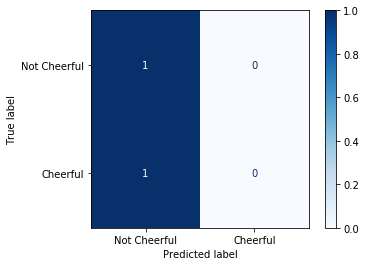

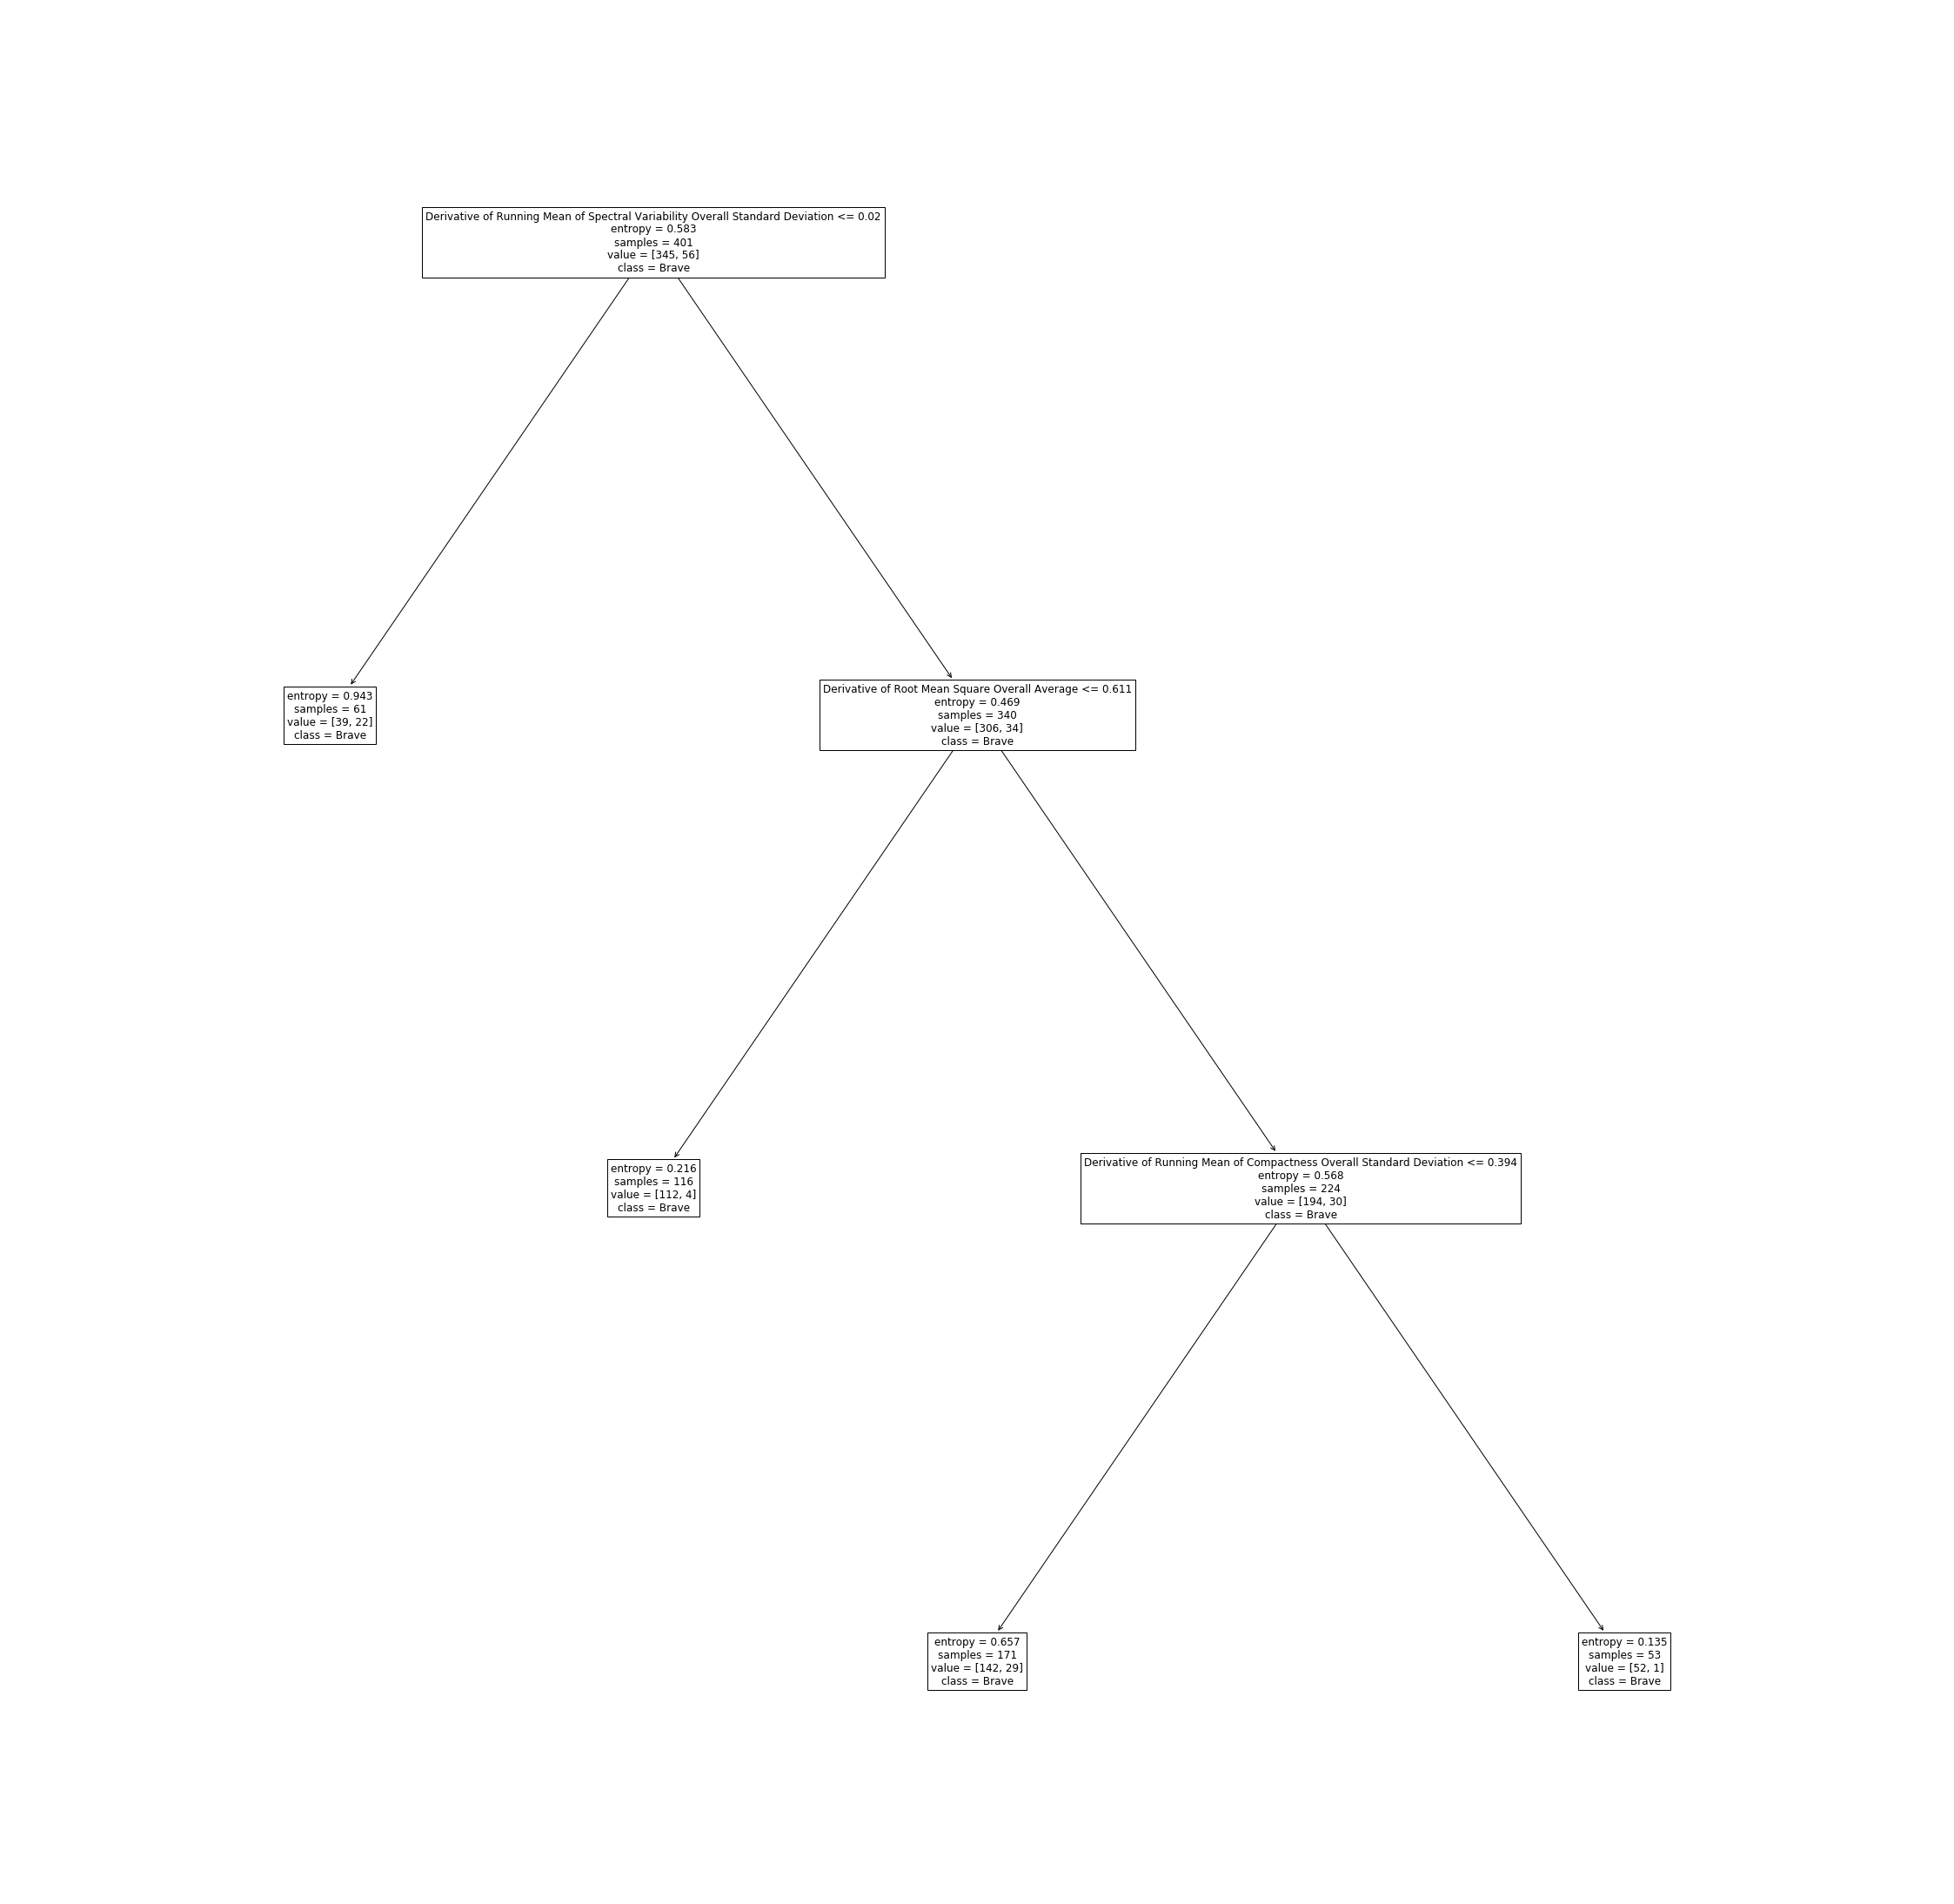

Derivative_of_MFCC_Overall_Average <= 0.02 and not Themes == 3 Confidence: 0
Derivative_of_MFCC_Overall_Average > 0.02 and Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average <= 0.61 and not Themes == 3 Confidence: 0.8538961038961039
Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average > 0.61 and Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation <= 0.39 and not Themes == 3 Confidence: 0.8817204301075269
Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation > 0.39 and not Themes == 3 Confidence: 0
Average Confidence: 0.43390413350090773
Derivative_of_MFCC_Overall_Average <= 0.02 and not Themes == 3 Lift: 0.0
Derivative_of_MFCC_Overall_Average > 0.02 and Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average <= 0.61 and not Themes == 3 Lift: 6.114506029684602
Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average > 0.61 and Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation <= 0.39 and not Themes == 3 Lift: 6.3137480798

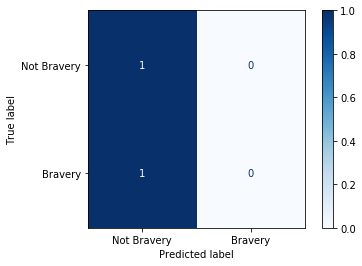

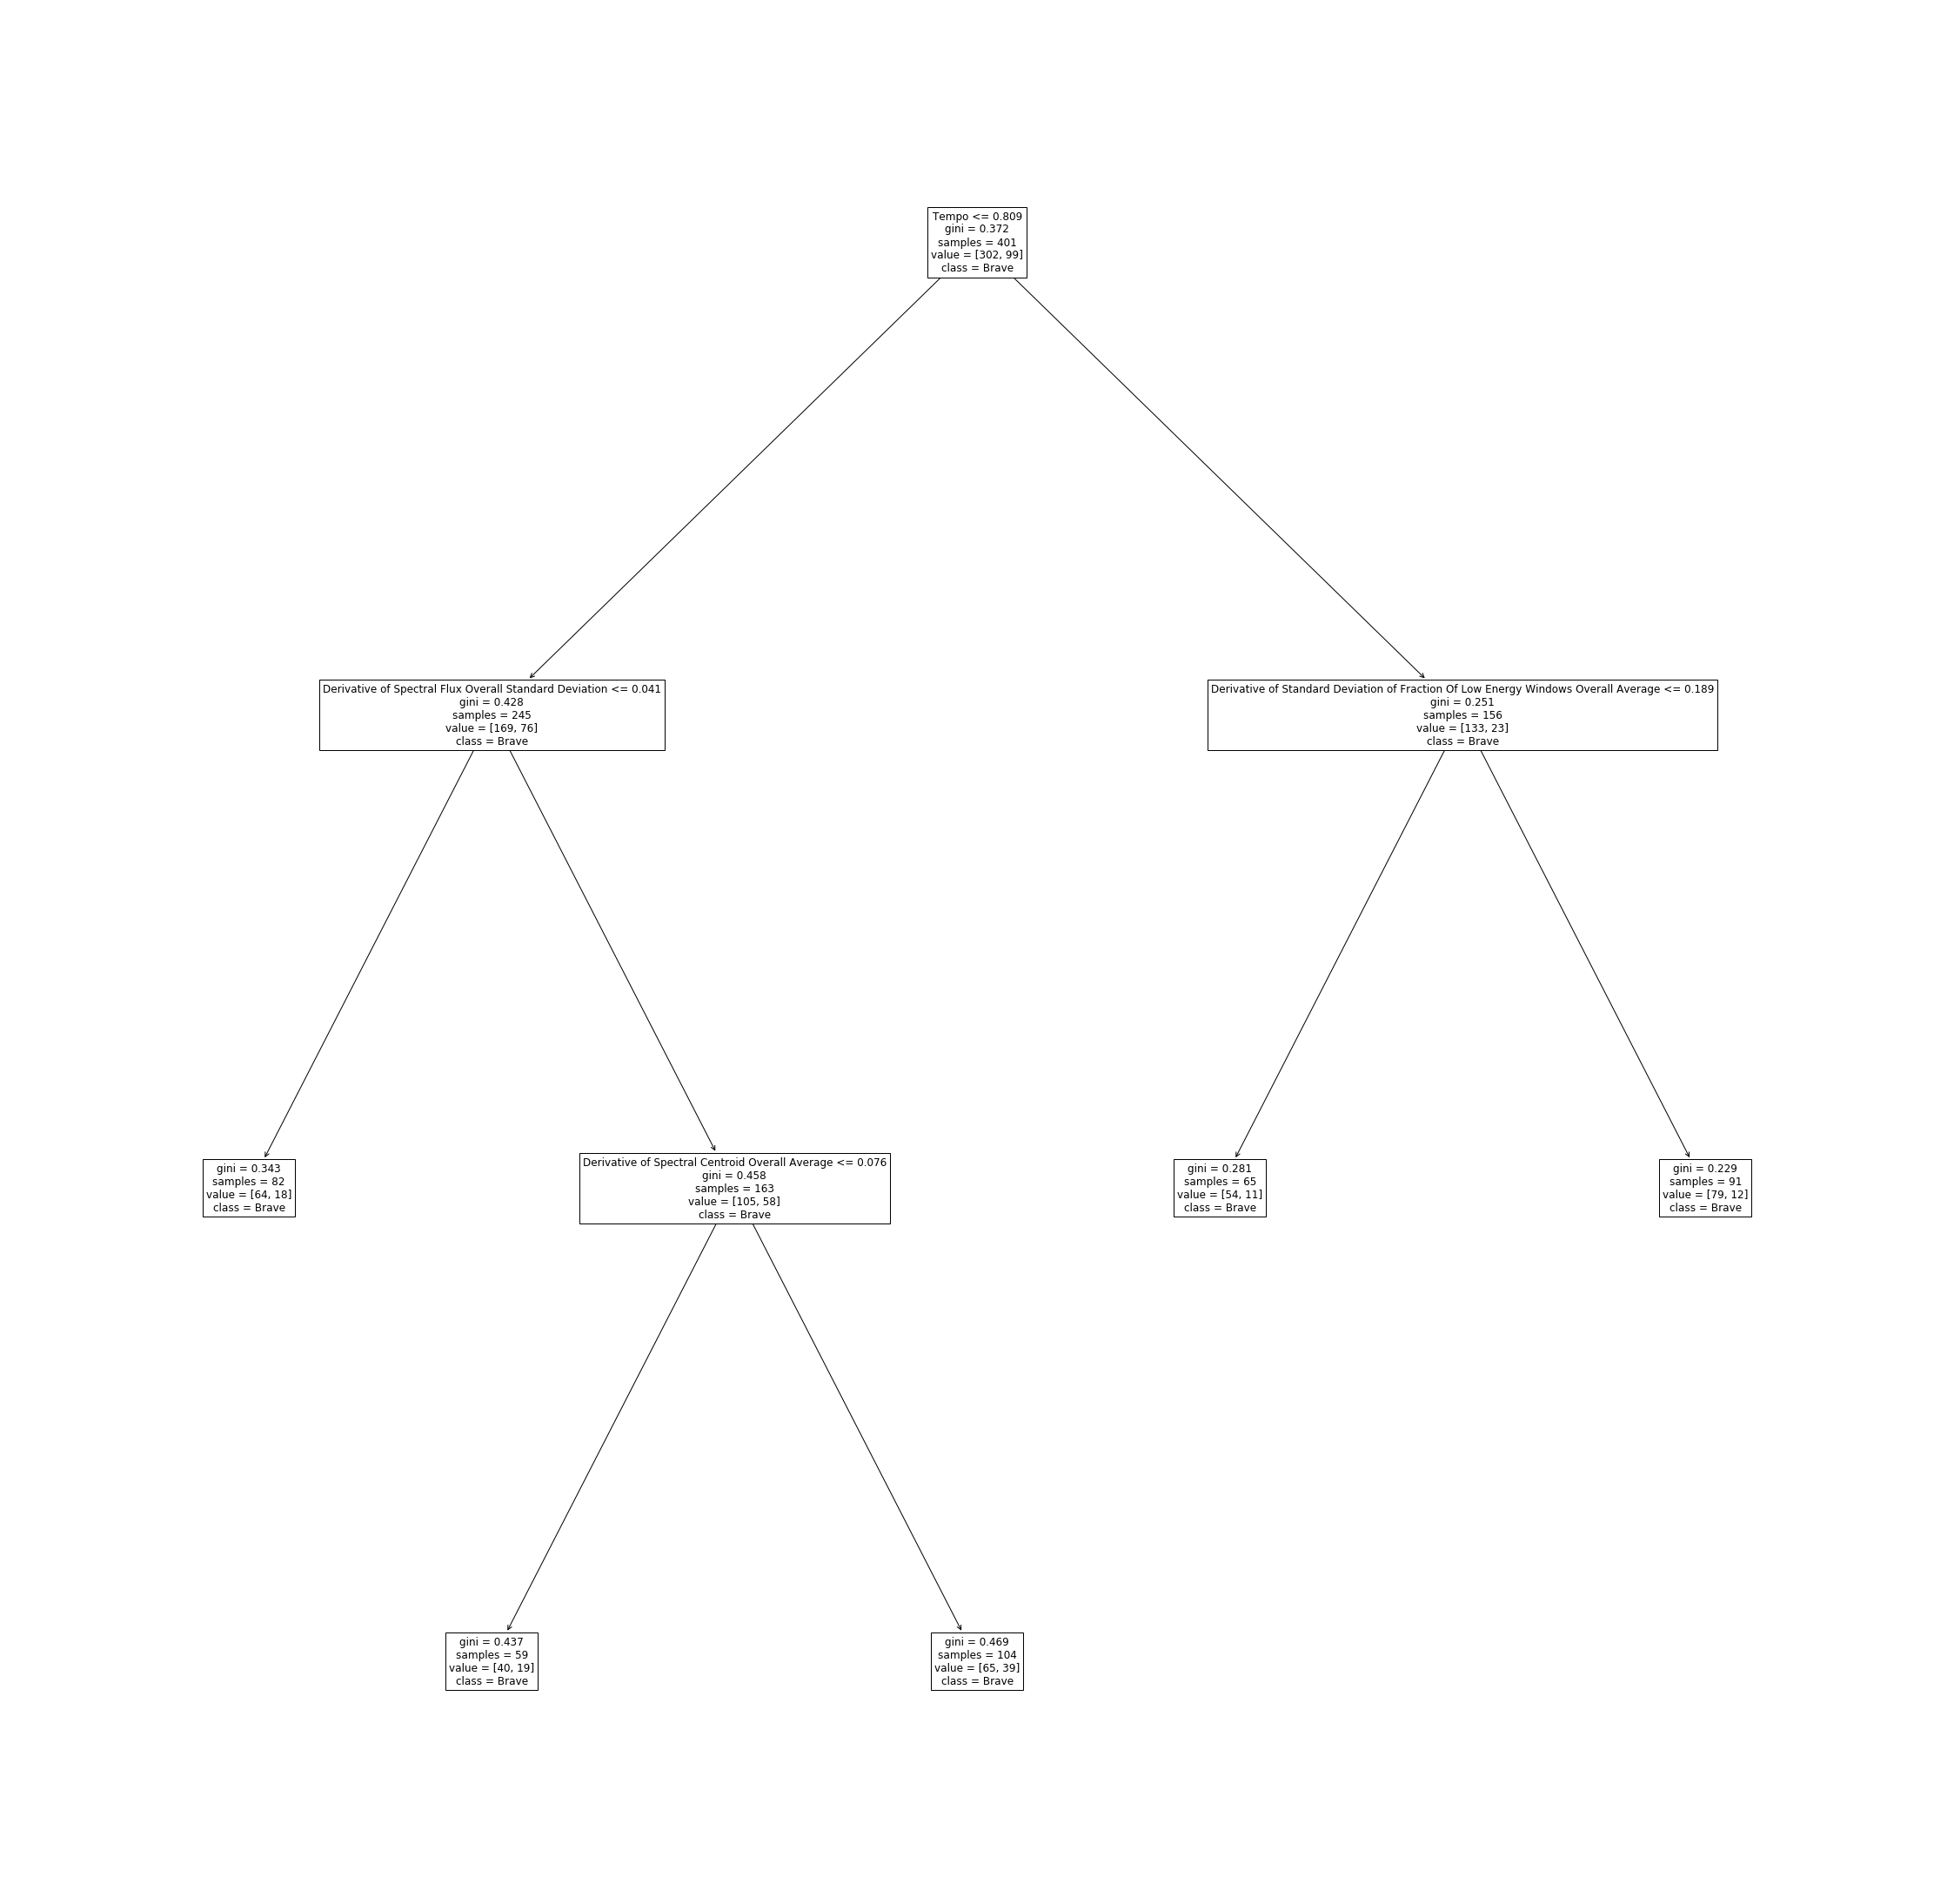

IsMajor <= 0.81 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average <= 0.04 and not Themes == 4 Confidence: 0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average > 0.04 and Derivative_of_Partial_Based_Spectral_Centroid_Overall_Standard_Deviation <= 0.08 and not Themes == 4 Confidence: 0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Standard_Deviation > 0.08 and not Themes == 4 Confidence: 0.7531172069825436
IsMajor > 0.81 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.19 and not Themes == 4 Confidence: 0
Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation > 0.19 and not Themes == 4 Confidence: 0.7531172069825436
Average Confidence: 0.3012468827930174
IsMajor <= 0.81 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average <= 0.04 and not Themes == 4 Lift: 0.0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average > 0.04 and Derivative_of_Partial_Based_Spectral_Centroid_Overall_Standard_Deviation <= 0.08 and not

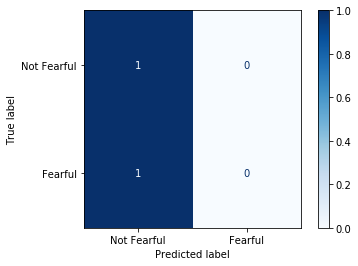

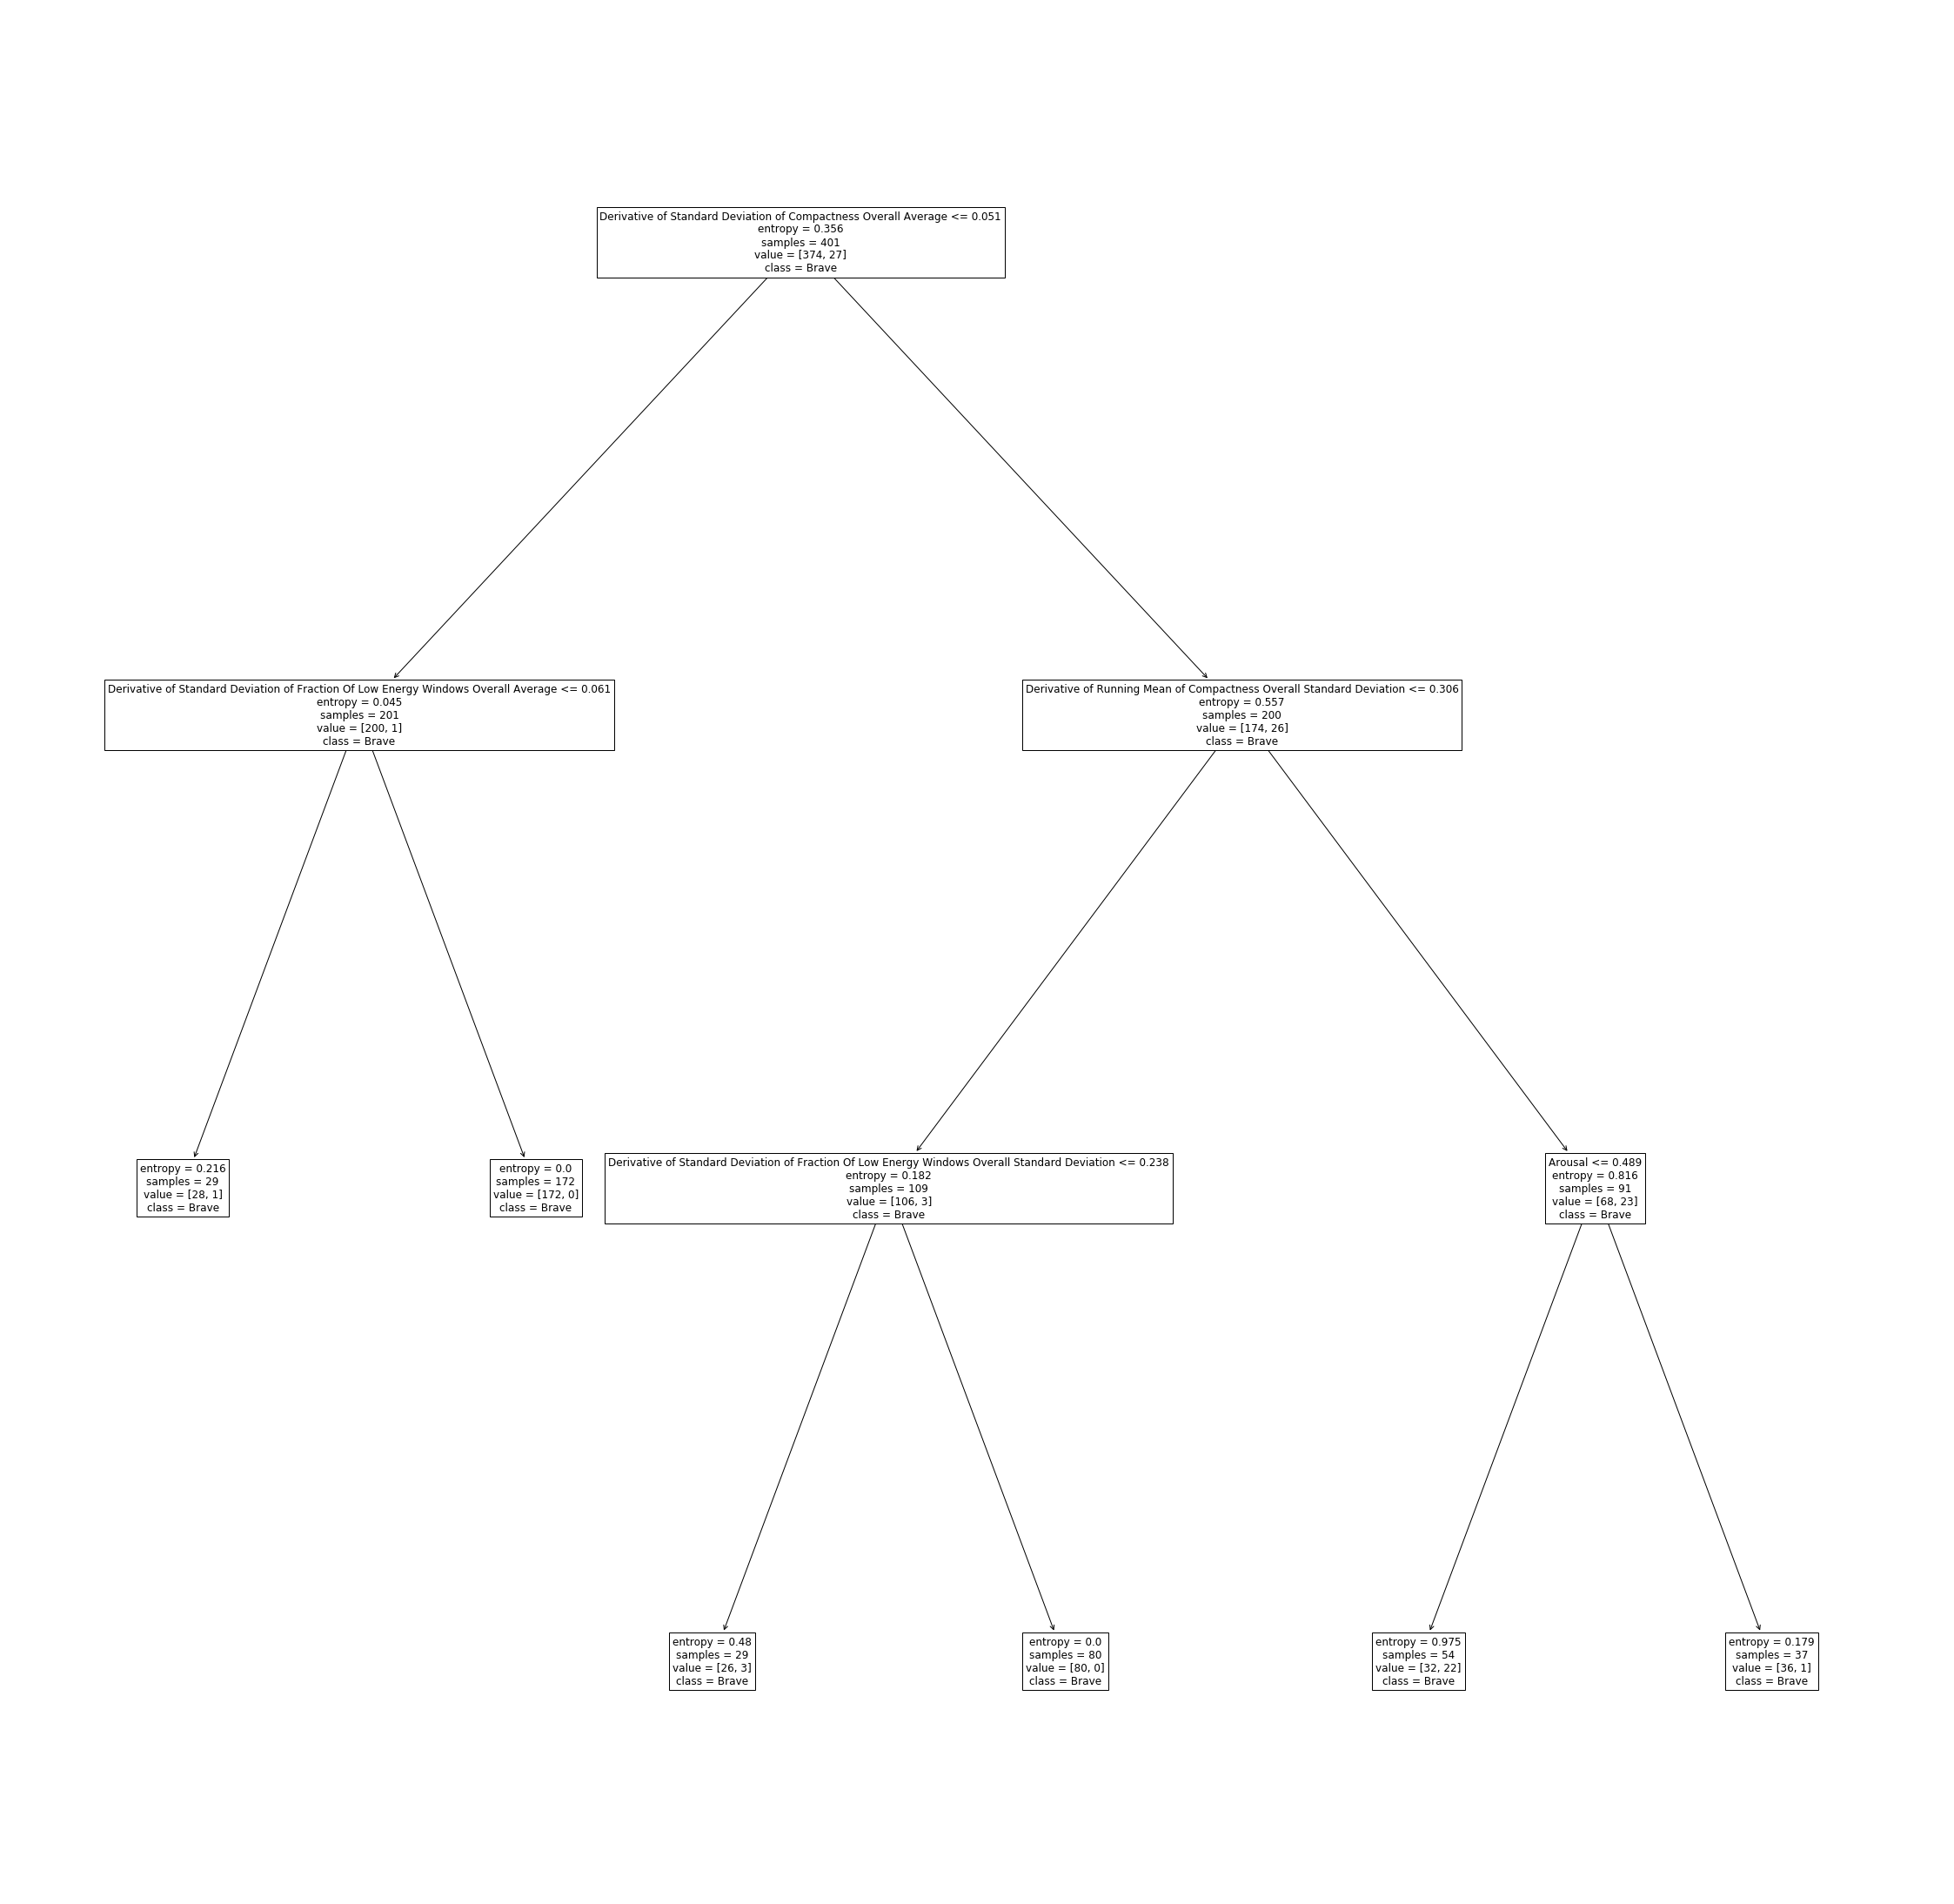

Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation <= 0.05 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.06 and not Themes == 5 Confidence: 0
Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation > 0.06 and not Themes == 5 Confidence: 0.9326683291770573
Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation > 0.05 and Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation <= 0.31 and Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average <= 0.24 and not Themes == 5 Confidence: 0
Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average > 0.24 and not Themes == 5 Confidence: 0.9326683291770573
Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation > 0.31 and Derivative_of_Running_Mean_of_Fraction_Of_Low_Energy_Windows_Overall_Average <= 0.49 and not Themes == 5 Confidence: 0
Derivative_of_Running_Mean_of_Fraction_Of_Low_Energy_Windows_Overall_Average > 0.49 and not Themes == 5 Confidence: 0
Average Confidence: 0

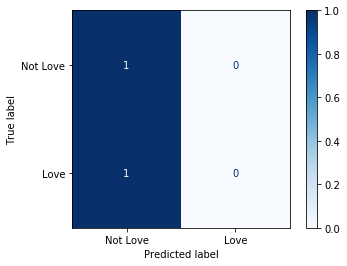

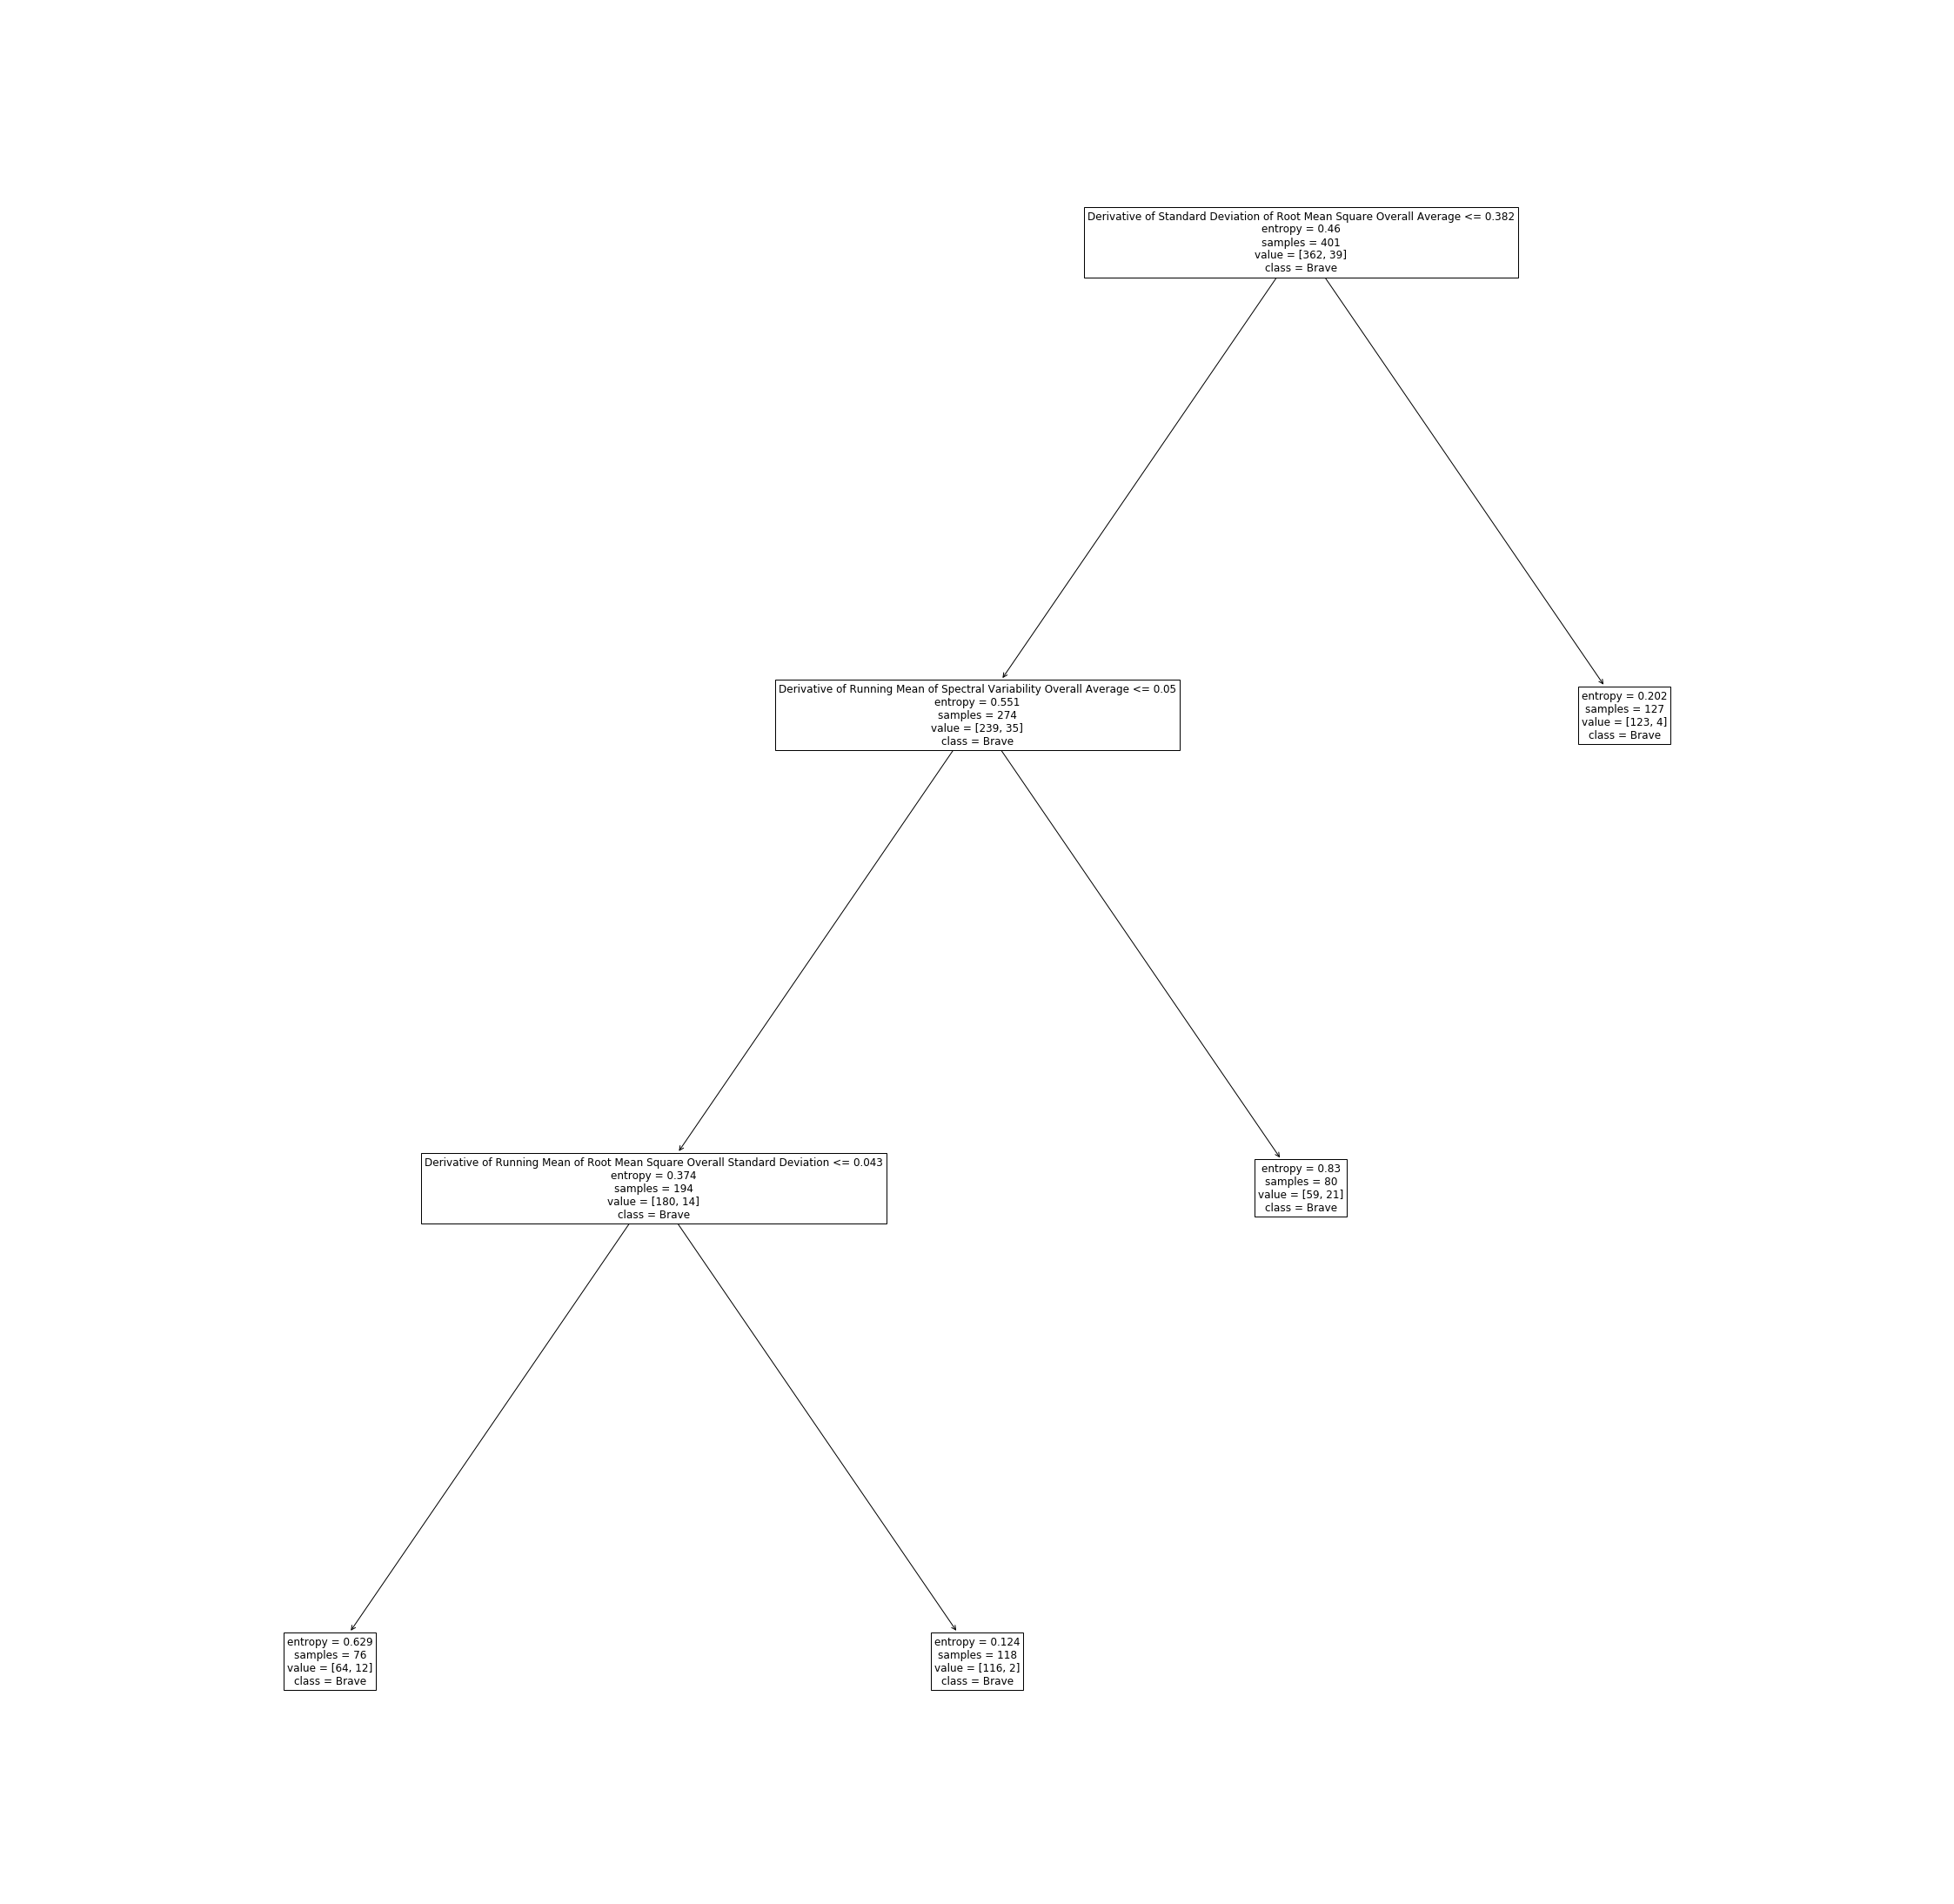

Derivative_of_Running_Mean_of_MFCC_Overall_Average <= 0.38 and Derivative_of_Method_of_Moments_Overall_Standard_Deviation <= 0.05 and Standard_Deviation_of_Spectral_Centroid_Overall_Average <= 0.04 and not Themes == 6 Confidence: 0
Standard_Deviation_of_Spectral_Centroid_Overall_Average > 0.04 and not Themes == 6 Confidence: 0.9027431421446384
Derivative_of_Method_of_Moments_Overall_Standard_Deviation > 0.05 and not Themes == 6 Confidence: 0.9027431421446384
Derivative_of_Running_Mean_of_MFCC_Overall_Average > 0.38 and not Themes == 6 Confidence: 0.9027431421446384
Average Confidence: 0.6770573566084788
Derivative_of_Running_Mean_of_MFCC_Overall_Average <= 0.38 and Derivative_of_Method_of_Moments_Overall_Standard_Deviation <= 0.05 and Standard_Deviation_of_Spectral_Centroid_Overall_Average <= 0.04 and not Themes == 6 Lift: 0.0
Standard_Deviation_of_Spectral_Centroid_Overall_Average > 0.04 and not Themes == 6 Lift: 9.282051282051283
Derivative_of_Method_of_Moments_Overall_Standard_Devia

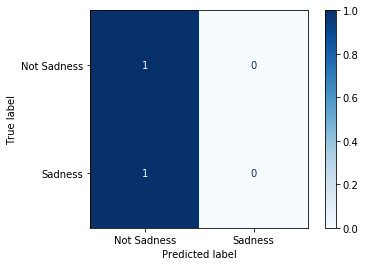

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
        print()
    print_res("Vanilla",x_train,ovr_train[i],rscv, themes[i], verbose = False)
    disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    disp_conf_and_lift(rscv.best_estimator_, features, i+1)
    test_res("Vanilla",x_val,ovr_val[i],rscv, themes[i])


Best Score: 0.8427
Random Oversampling Train Accuracy: 84.4000%


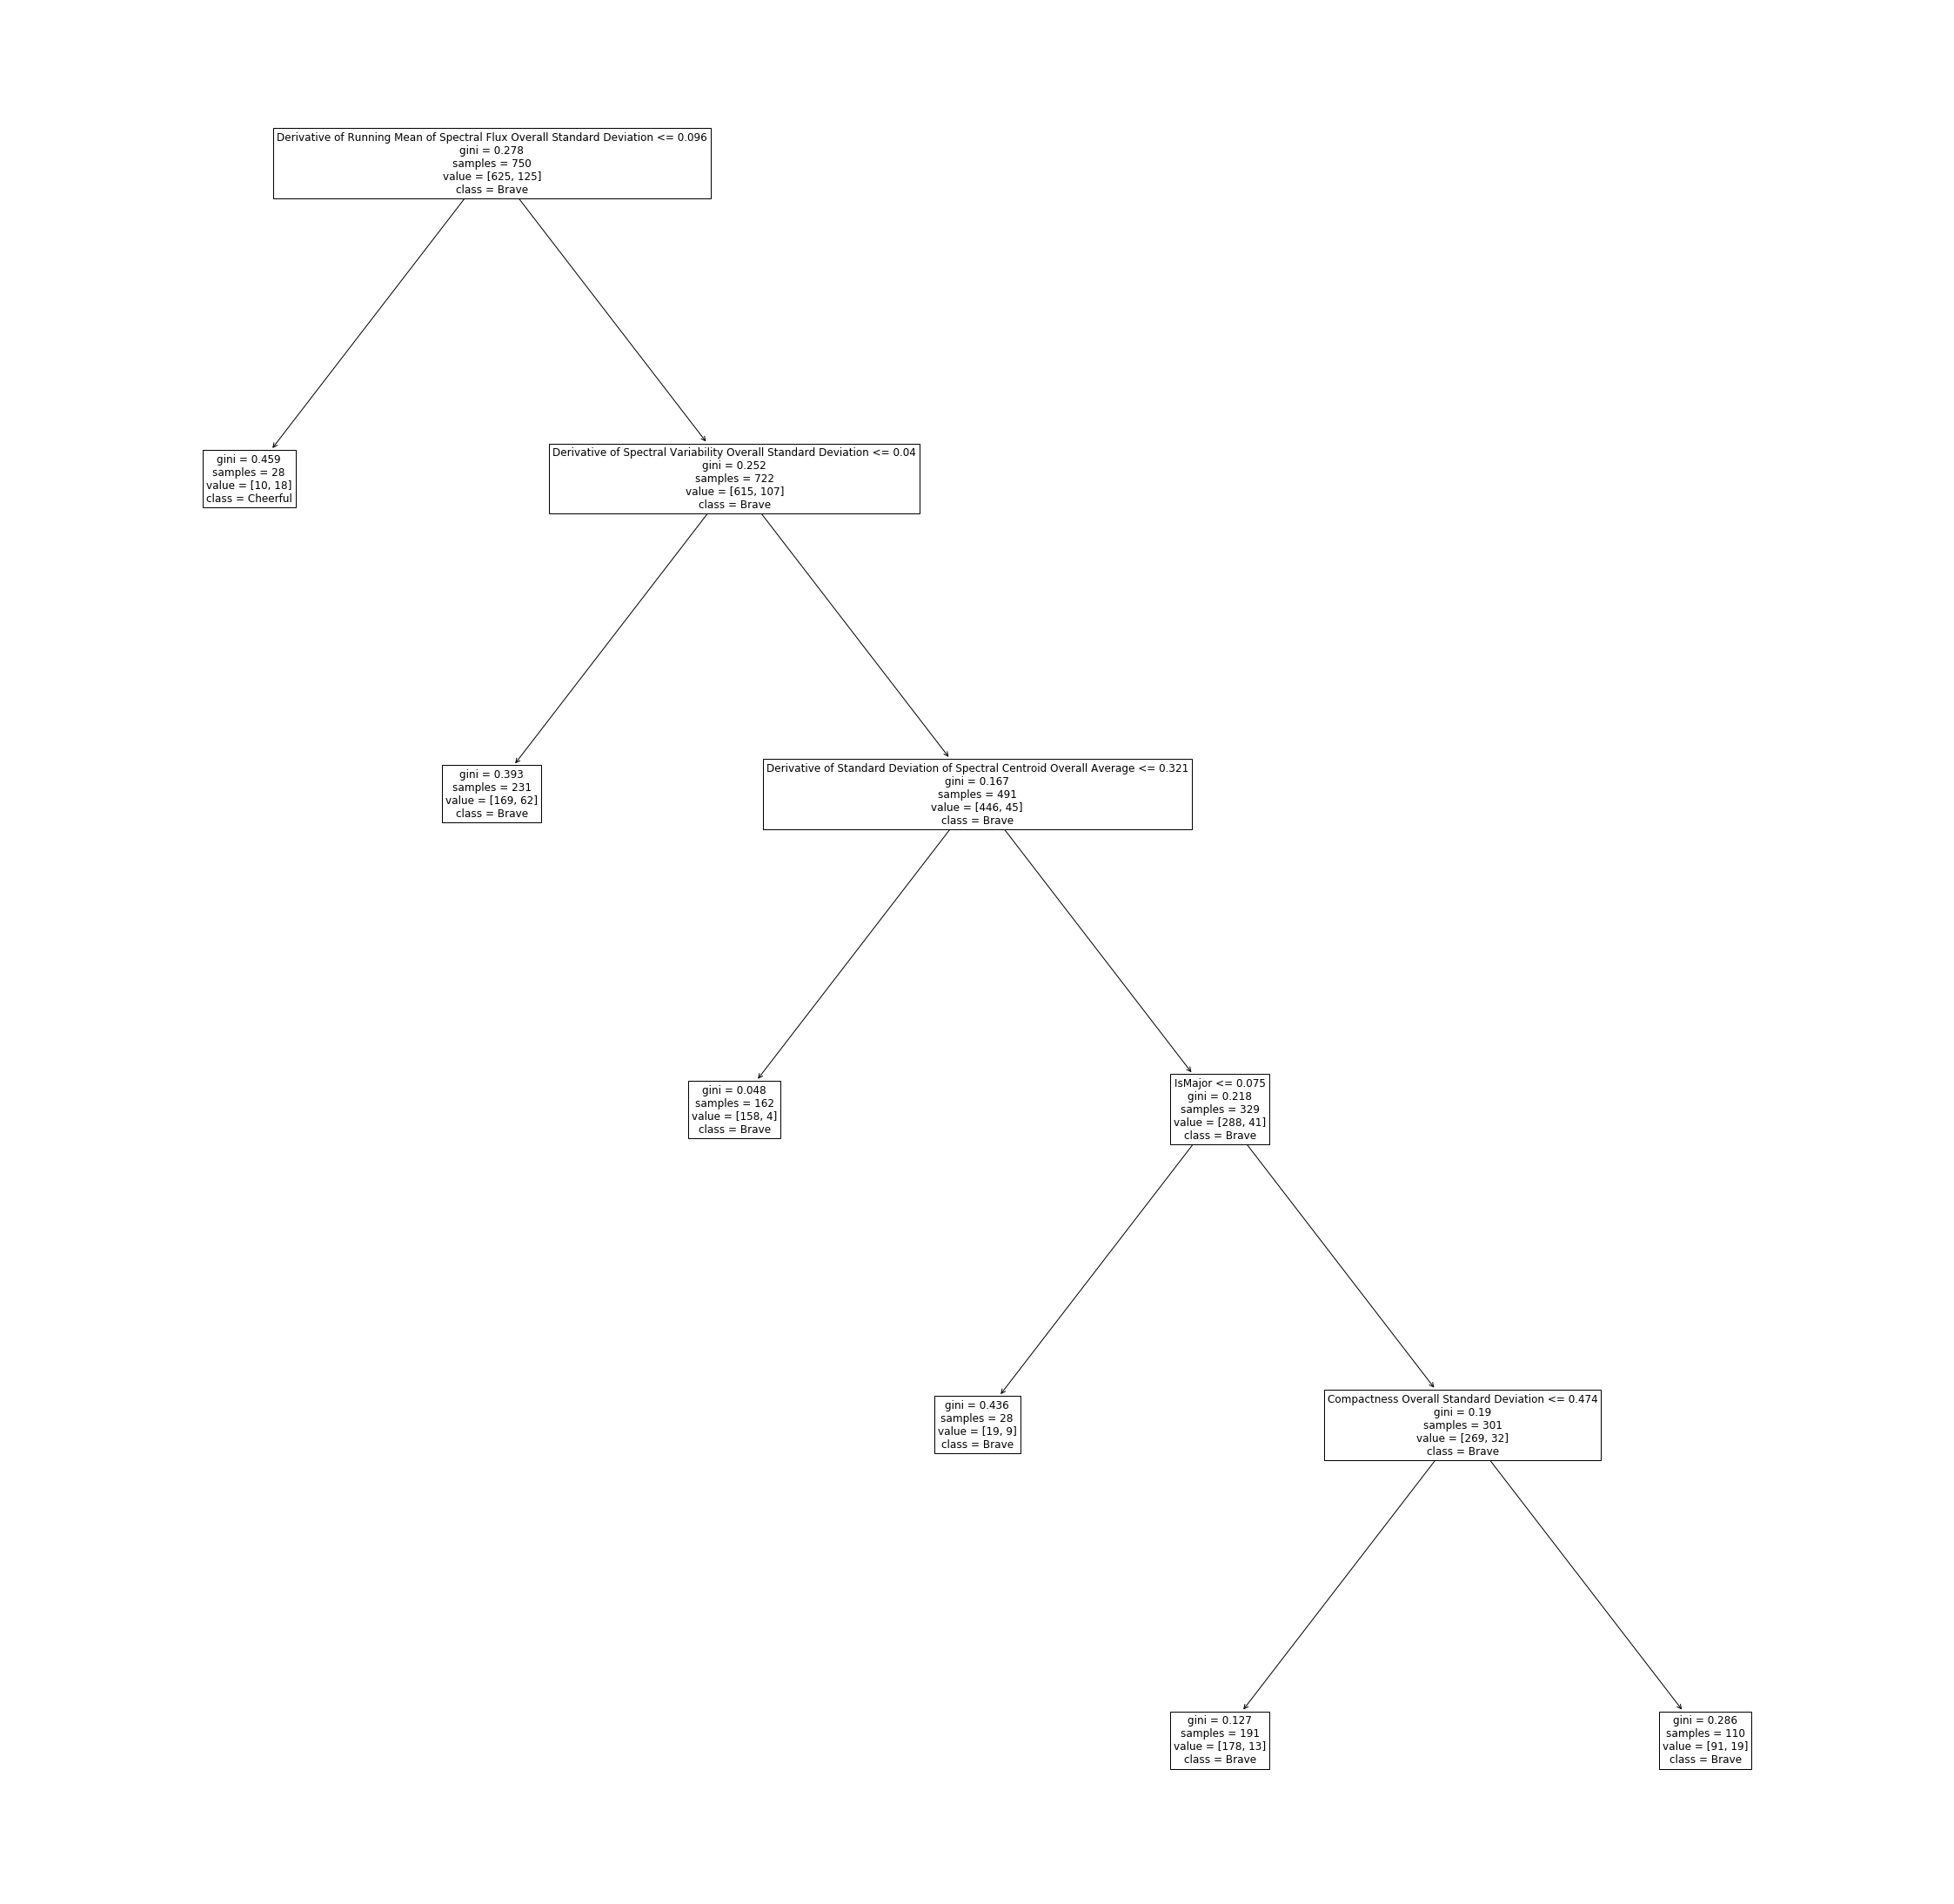

Standard_Deviation_of_Spectral_Rolloff_Point_Overall_Average <= 0.10 and Themes == 1 Confidence: 0
Standard_Deviation_of_Spectral_Rolloff_Point_Overall_Average > 0.10 and Derivative_of_Running_Mean_of_Beat_Sum_Overall_Average <= 0.04 and not Themes == 1 Confidence: 0
Derivative_of_Running_Mean_of_Beat_Sum_Overall_Average > 0.04 and Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.32 and not Themes == 1 Confidence: 0
Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average > 0.32 and Derivative_of_Running_Mean_of_Root_Mean_Square_Overall_Standard_Deviation <= 0.08 and not Themes == 1 Confidence: 0.6882793017456359
Derivative_of_Running_Mean_of_Root_Mean_Square_Overall_Standard_Deviation > 0.08 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.47 and not Themes == 1 Confidence: 0
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.47 and not Themes == 1 Confidence: 0.6882793017456359
Average Confidence: 0.2294264

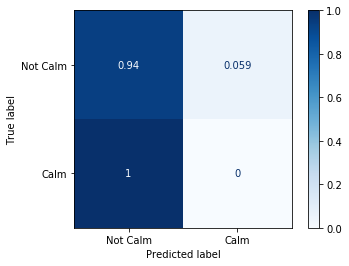

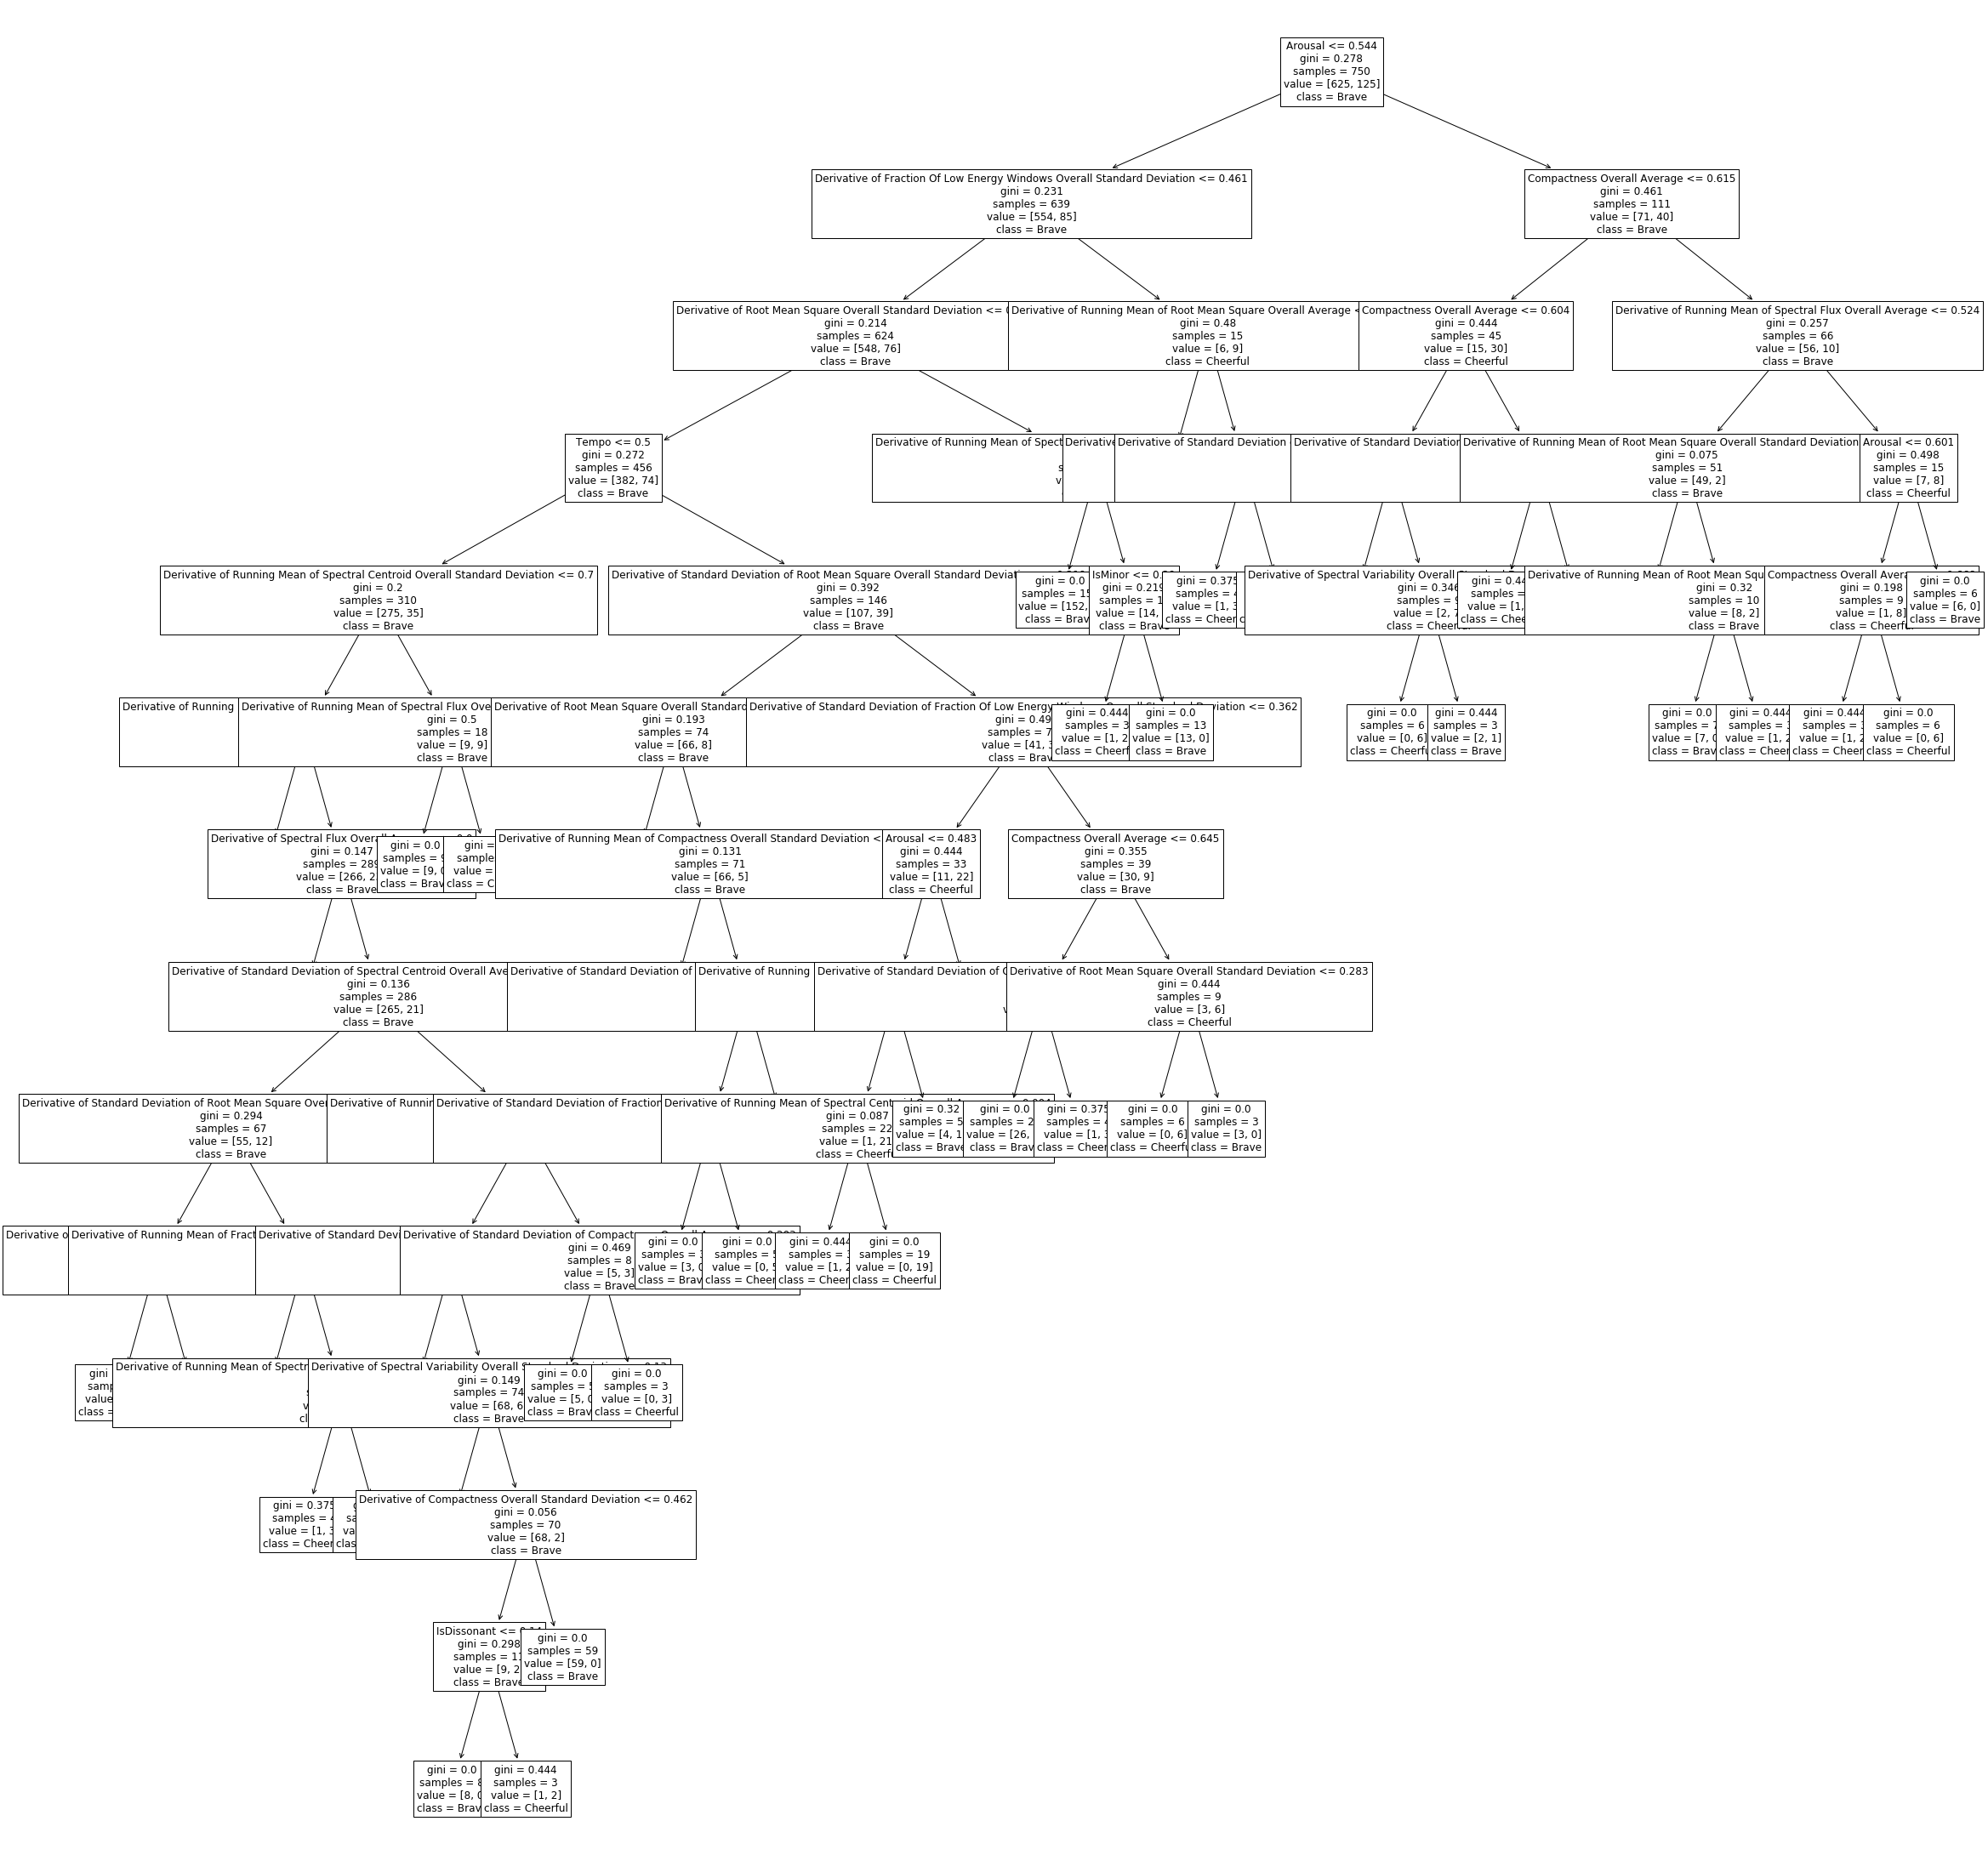

Derivative_of_Running_Mean_of_Fraction_Of_Low_Energy_Windows_Overall_Average <= 0.54 and Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Standard_Deviation <= 0.46 and Fraction_Of_Low_Energy_Windows_Overall_Average <= 0.36 and IsMajor <= 0.50 and Standard_Deviation_of_Spectral_Flux_Overall_Average <= 0.70 and Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation <= 0.01 and Themes == 2 Confidence: 0
Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation > 0.01 and Derivative_of_Partial_Based_Spectral_Flux_Overall_Standard_Deviation <= 0.00 and Themes == 2 Confidence: 0
Derivative_of_Partial_Based_Spectral_Flux_Overall_Standard_Deviation > 0.00 and Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.11 and Derivative_of_Running_Mean_of_MFCC_Overall_Average <= 0.16 and Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average <= 0.54 and Themes == 2 Confidence: 0
Derivative_of_Standard_Deviation_of_Zero_Crossings_Overa

Best Score: 0.9053
Random Oversampling Train Accuracy: 98.0000%


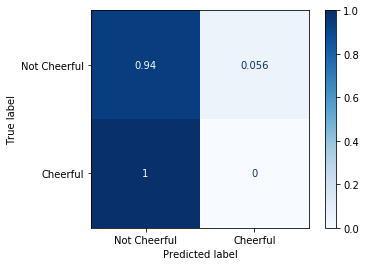

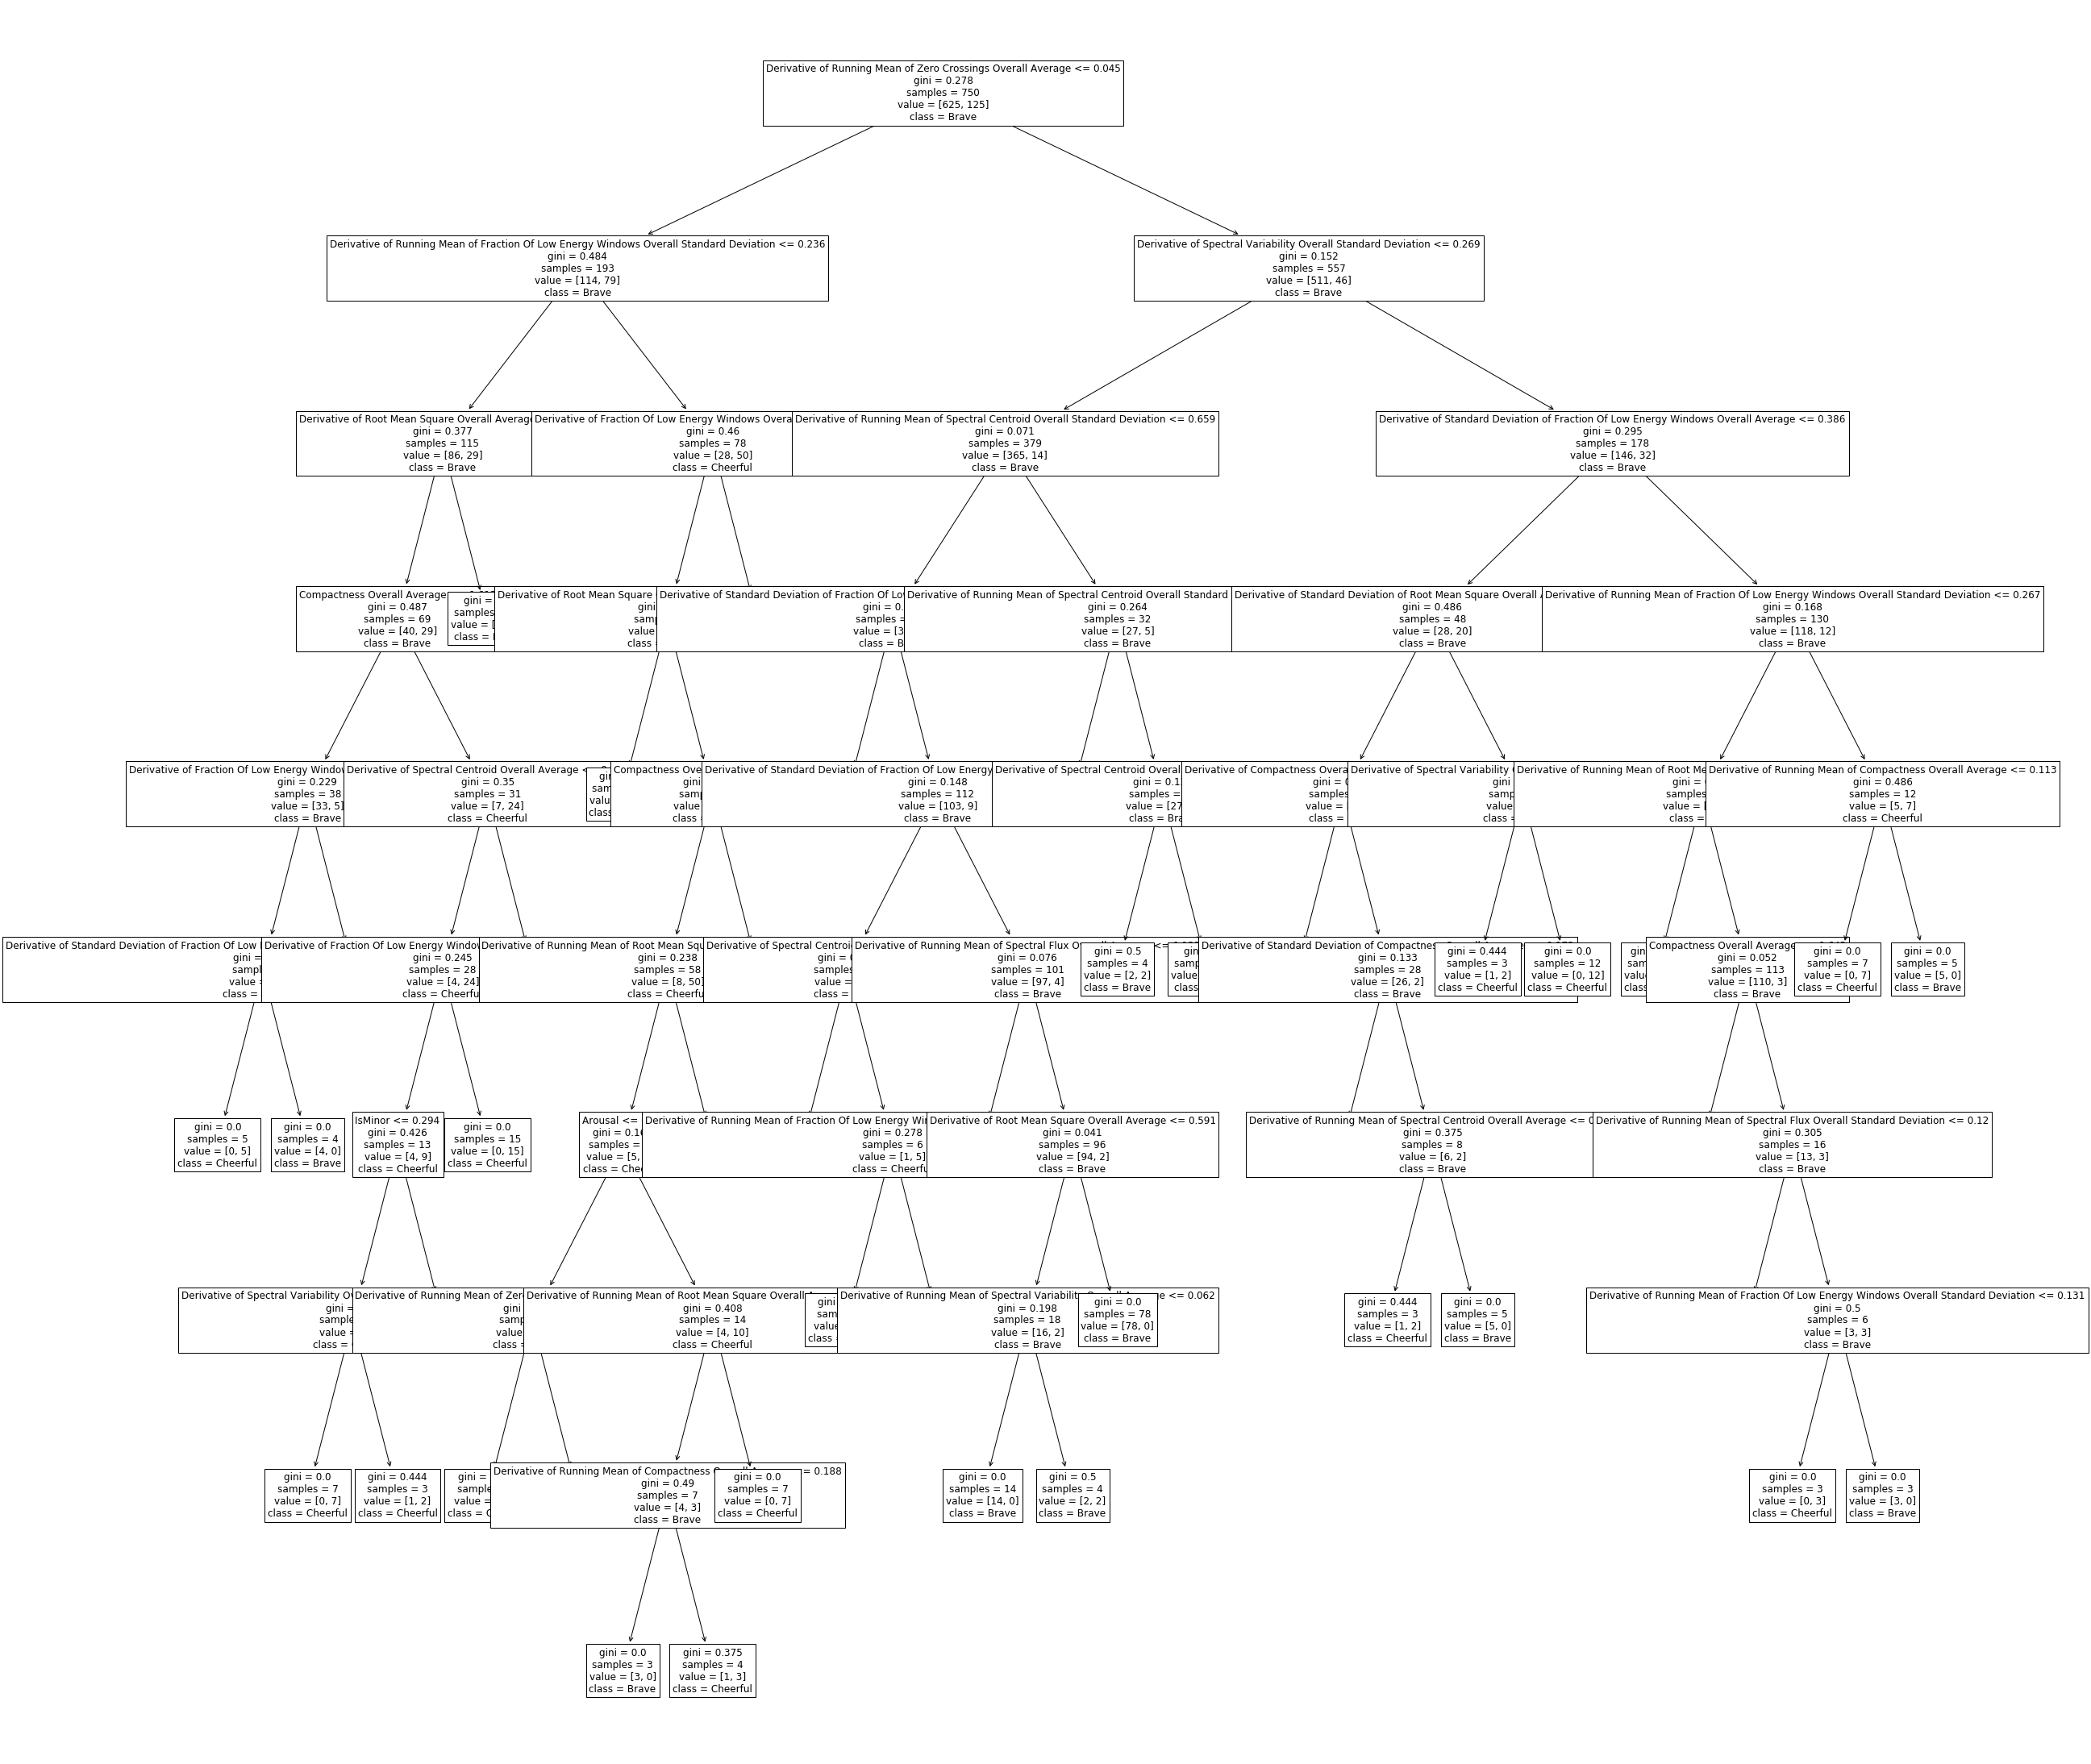

Derivative_of_MFCC_Overall_Standard_Deviation <= 0.04 and Spectral_Rolloff_Point_Overall_Standard_Deviation <= 0.24 and Derivative_of_Standard_Deviation_of_Zero_Crossings_Overall_Average <= 0.62 and Derivative_of_Running_Mean_of_Zero_Crossings_Overall_Average <= 0.61 and Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Average <= 0.28 and Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average <= 0.07 and Themes == 3 Confidence: 0
Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average > 0.07 and not Themes == 3 Confidence: 0.8603491271820449
Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Average > 0.28 and not Themes == 3 Confidence: 0
Derivative_of_Running_Mean_of_Zero_Crossings_Overall_Average > 0.61 and Derivative_of_Partial_Based_Spectral_Centroid_Overall_Standard_Deviation <= 0.02 and Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Average <= 0.30 and Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Aver

Best Score: 0.8533
Random Oversampling Train Accuracy: 97.0667%


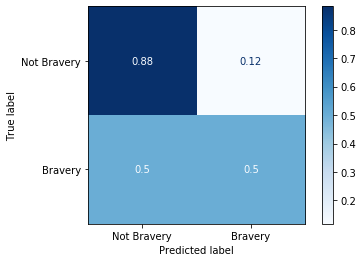

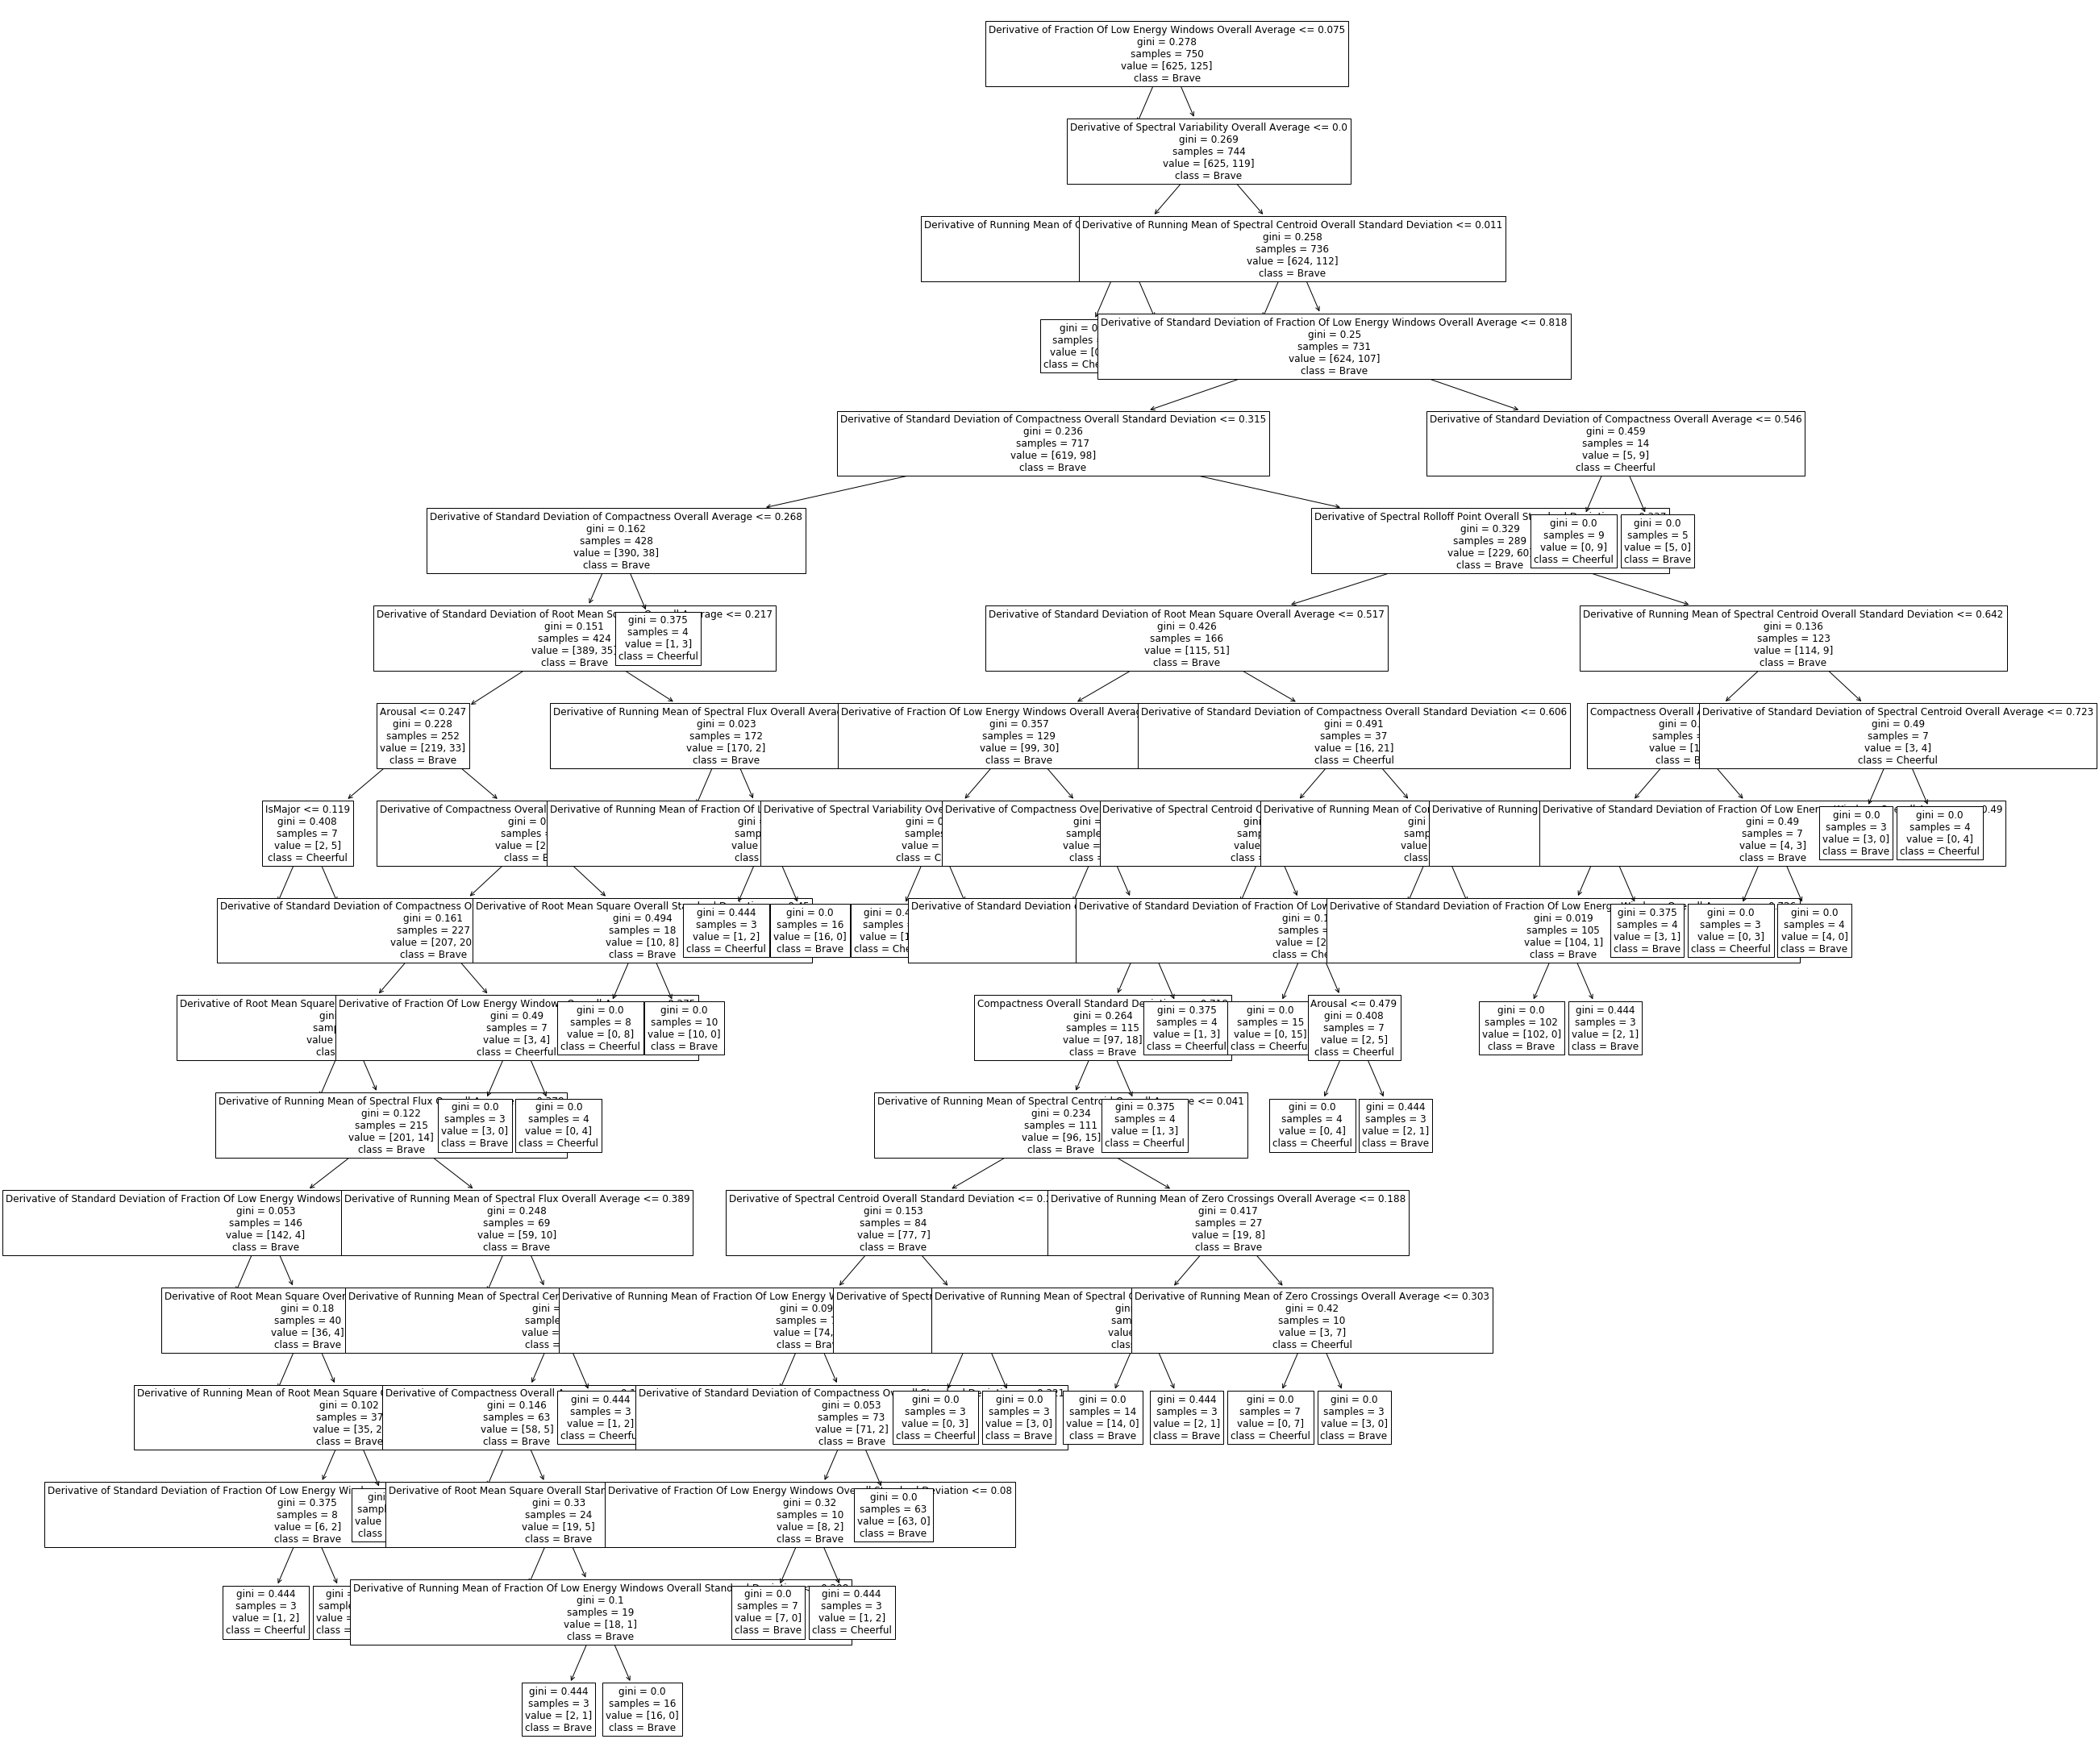

Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Average <= 0.08 and Themes == 4 Confidence: 0.24688279301745636
Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Average > 0.08 and Derivative_of_Relative_Difference_Function_Overall_Standard_Deviation <= 0.00 and Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation <= 0.29 and Themes == 4 Confidence: 0
Running_Mean_of_Spectral_Flux_Overall_Standard_Deviation > 0.29 and Themes == 4 Confidence: 0
Derivative_of_Relative_Difference_Function_Overall_Standard_Deviation > 0.00 and Standard_Deviation_of_Spectral_Flux_Overall_Average <= 0.01 and Themes == 4 Confidence: 0.2467866323907455
Standard_Deviation_of_Spectral_Flux_Overall_Average > 0.01 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.82 and Derivative_of_Running_Mean_of_LPC_Overall_Average <= 0.32 and Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation <= 0.27 and Derivative_of_Running_Mean_of_MFCC_Overall_Average <

Best Score: 0.9653
Random Oversampling Train Accuracy: 99.6000%


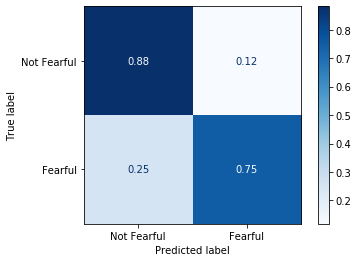

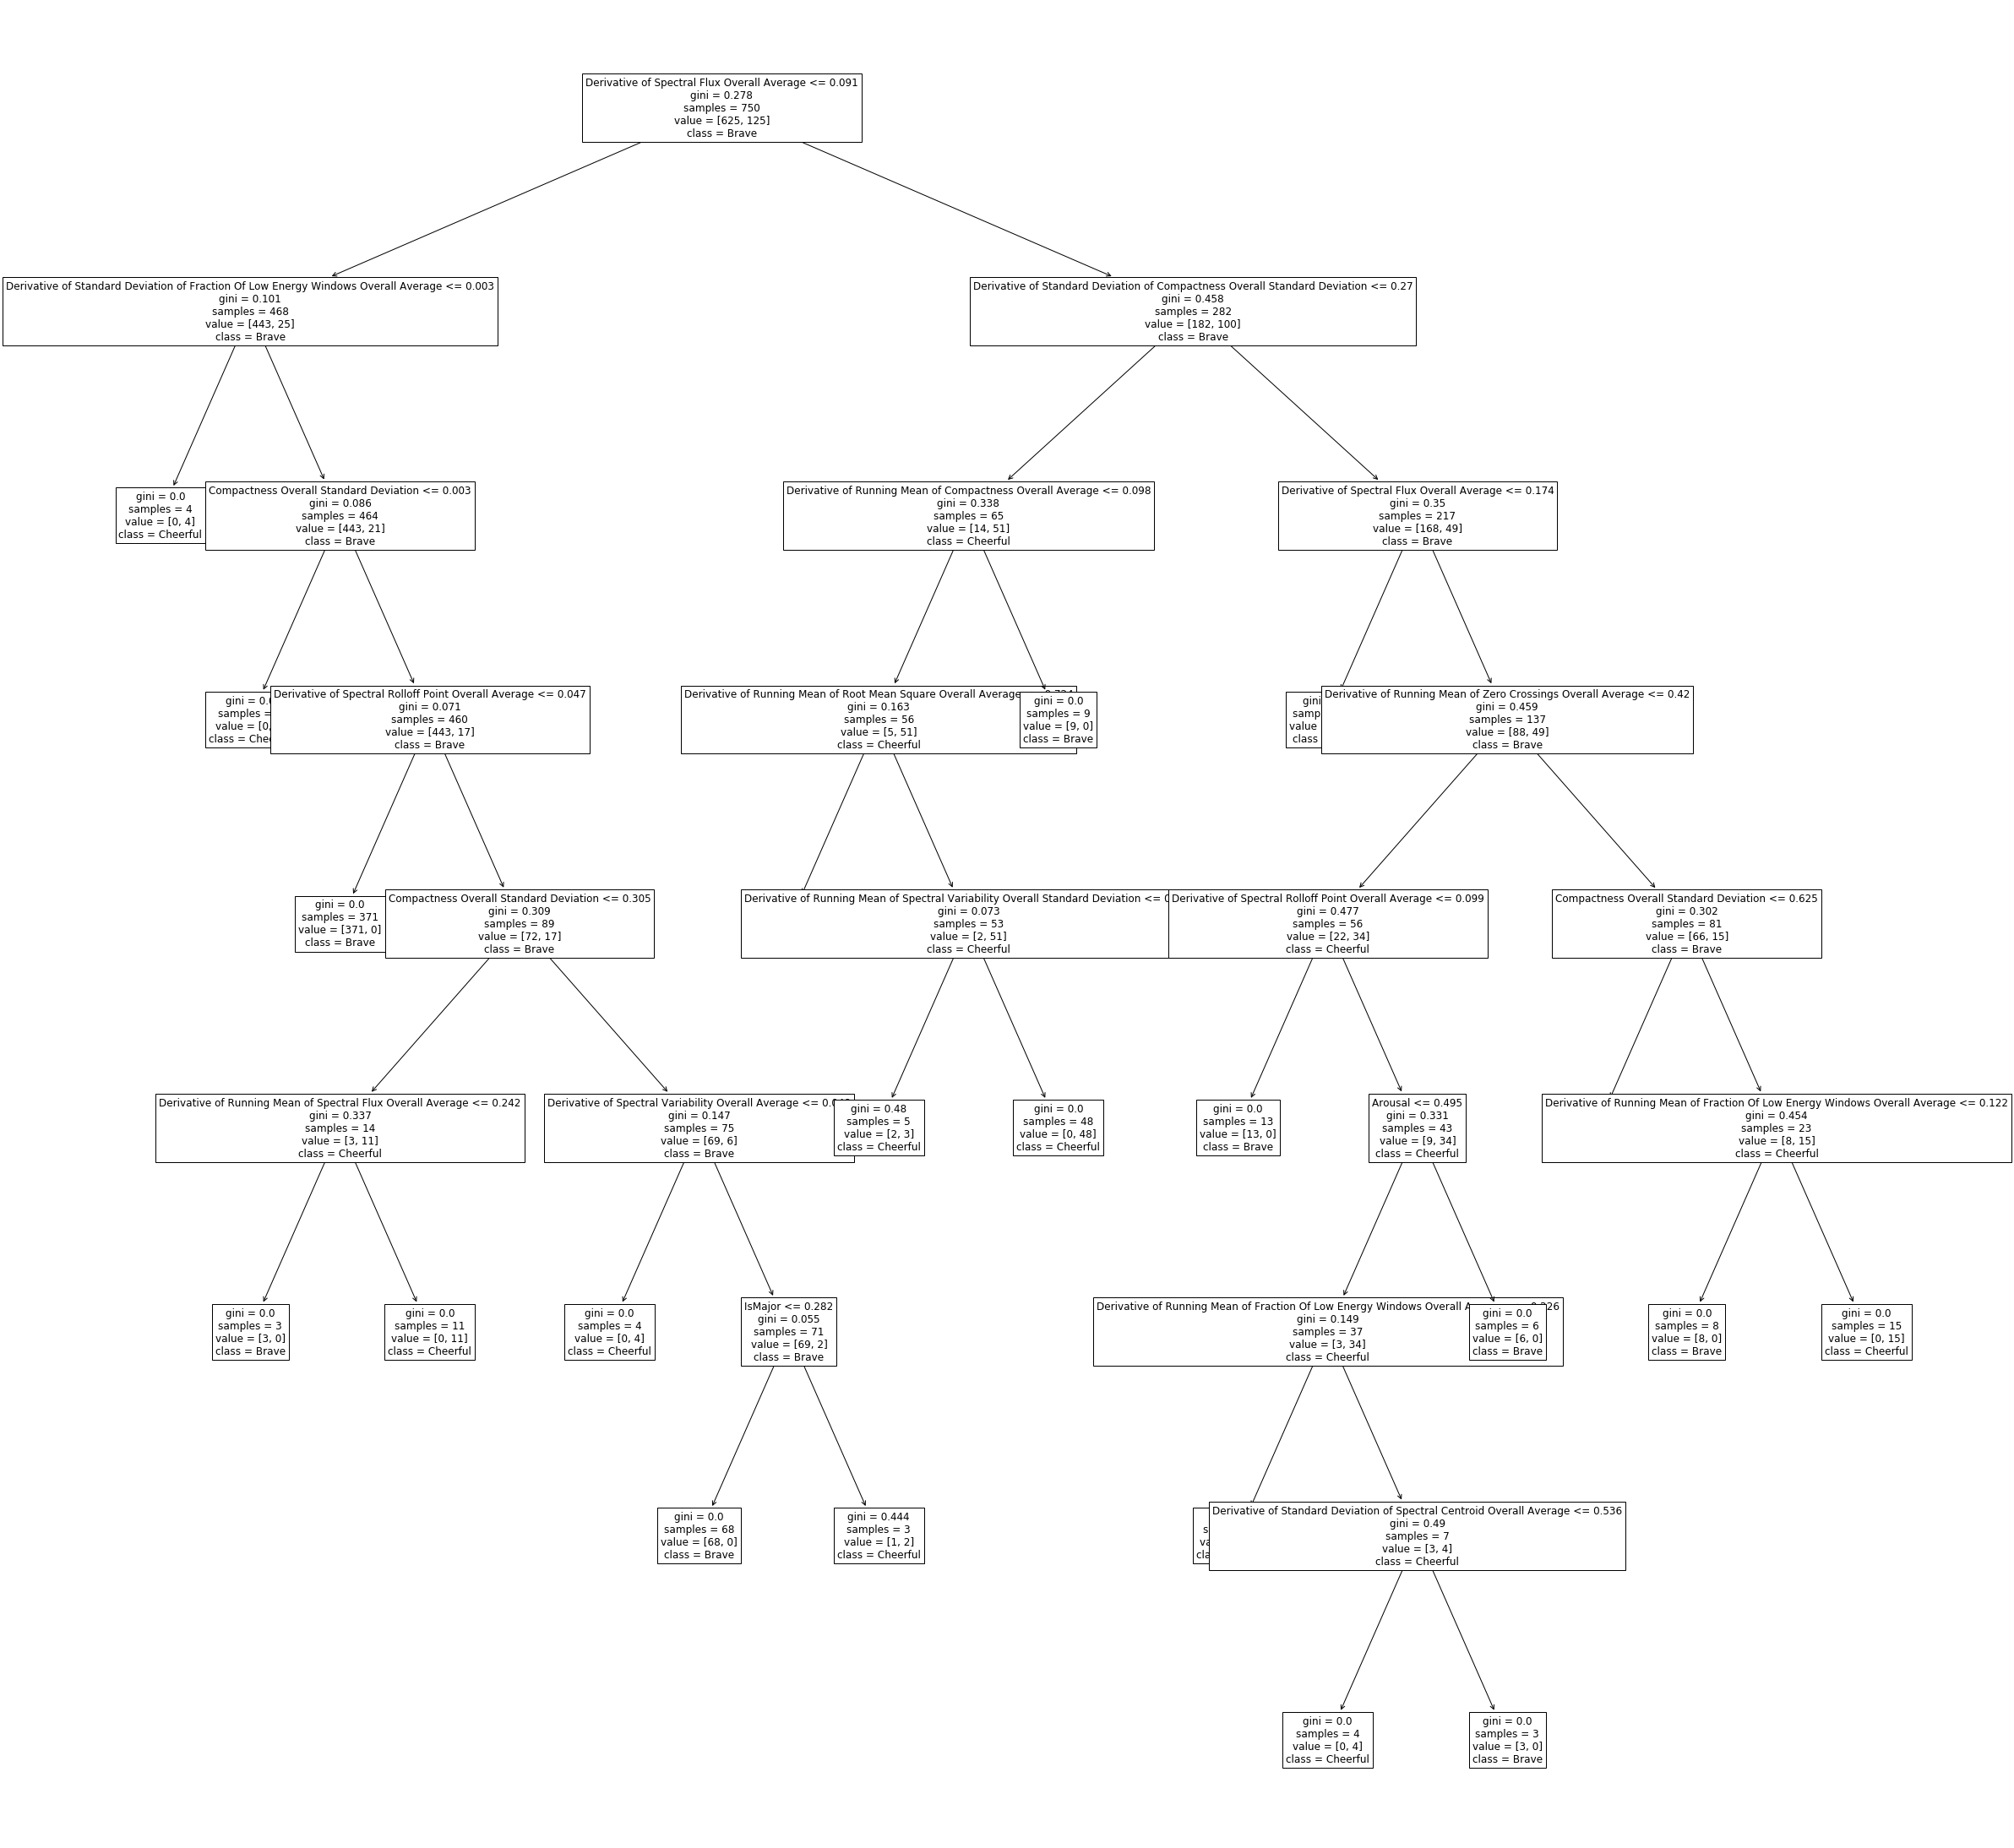

Derivative_of_Partial_Based_Spectral_Flux_Overall_Standard_Deviation <= 0.09 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.00 and Themes == 5 Confidence: 0
Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation > 0.00 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.00 and Themes == 5 Confidence: 0
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.00 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Standard_Deviation <= 0.05 and not Themes == 5 Confidence: 0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Standard_Deviation > 0.05 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.31 and Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation <= 0.24 and not Themes == 5 Confidence: 0
Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation > 0.24 and Themes == 5 Confidence: 0
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.31 and Derivative_of_Relative_Difference_Func

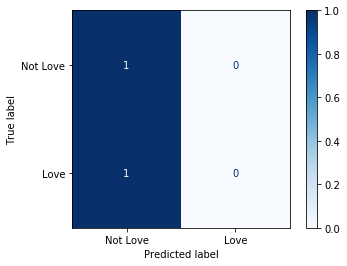

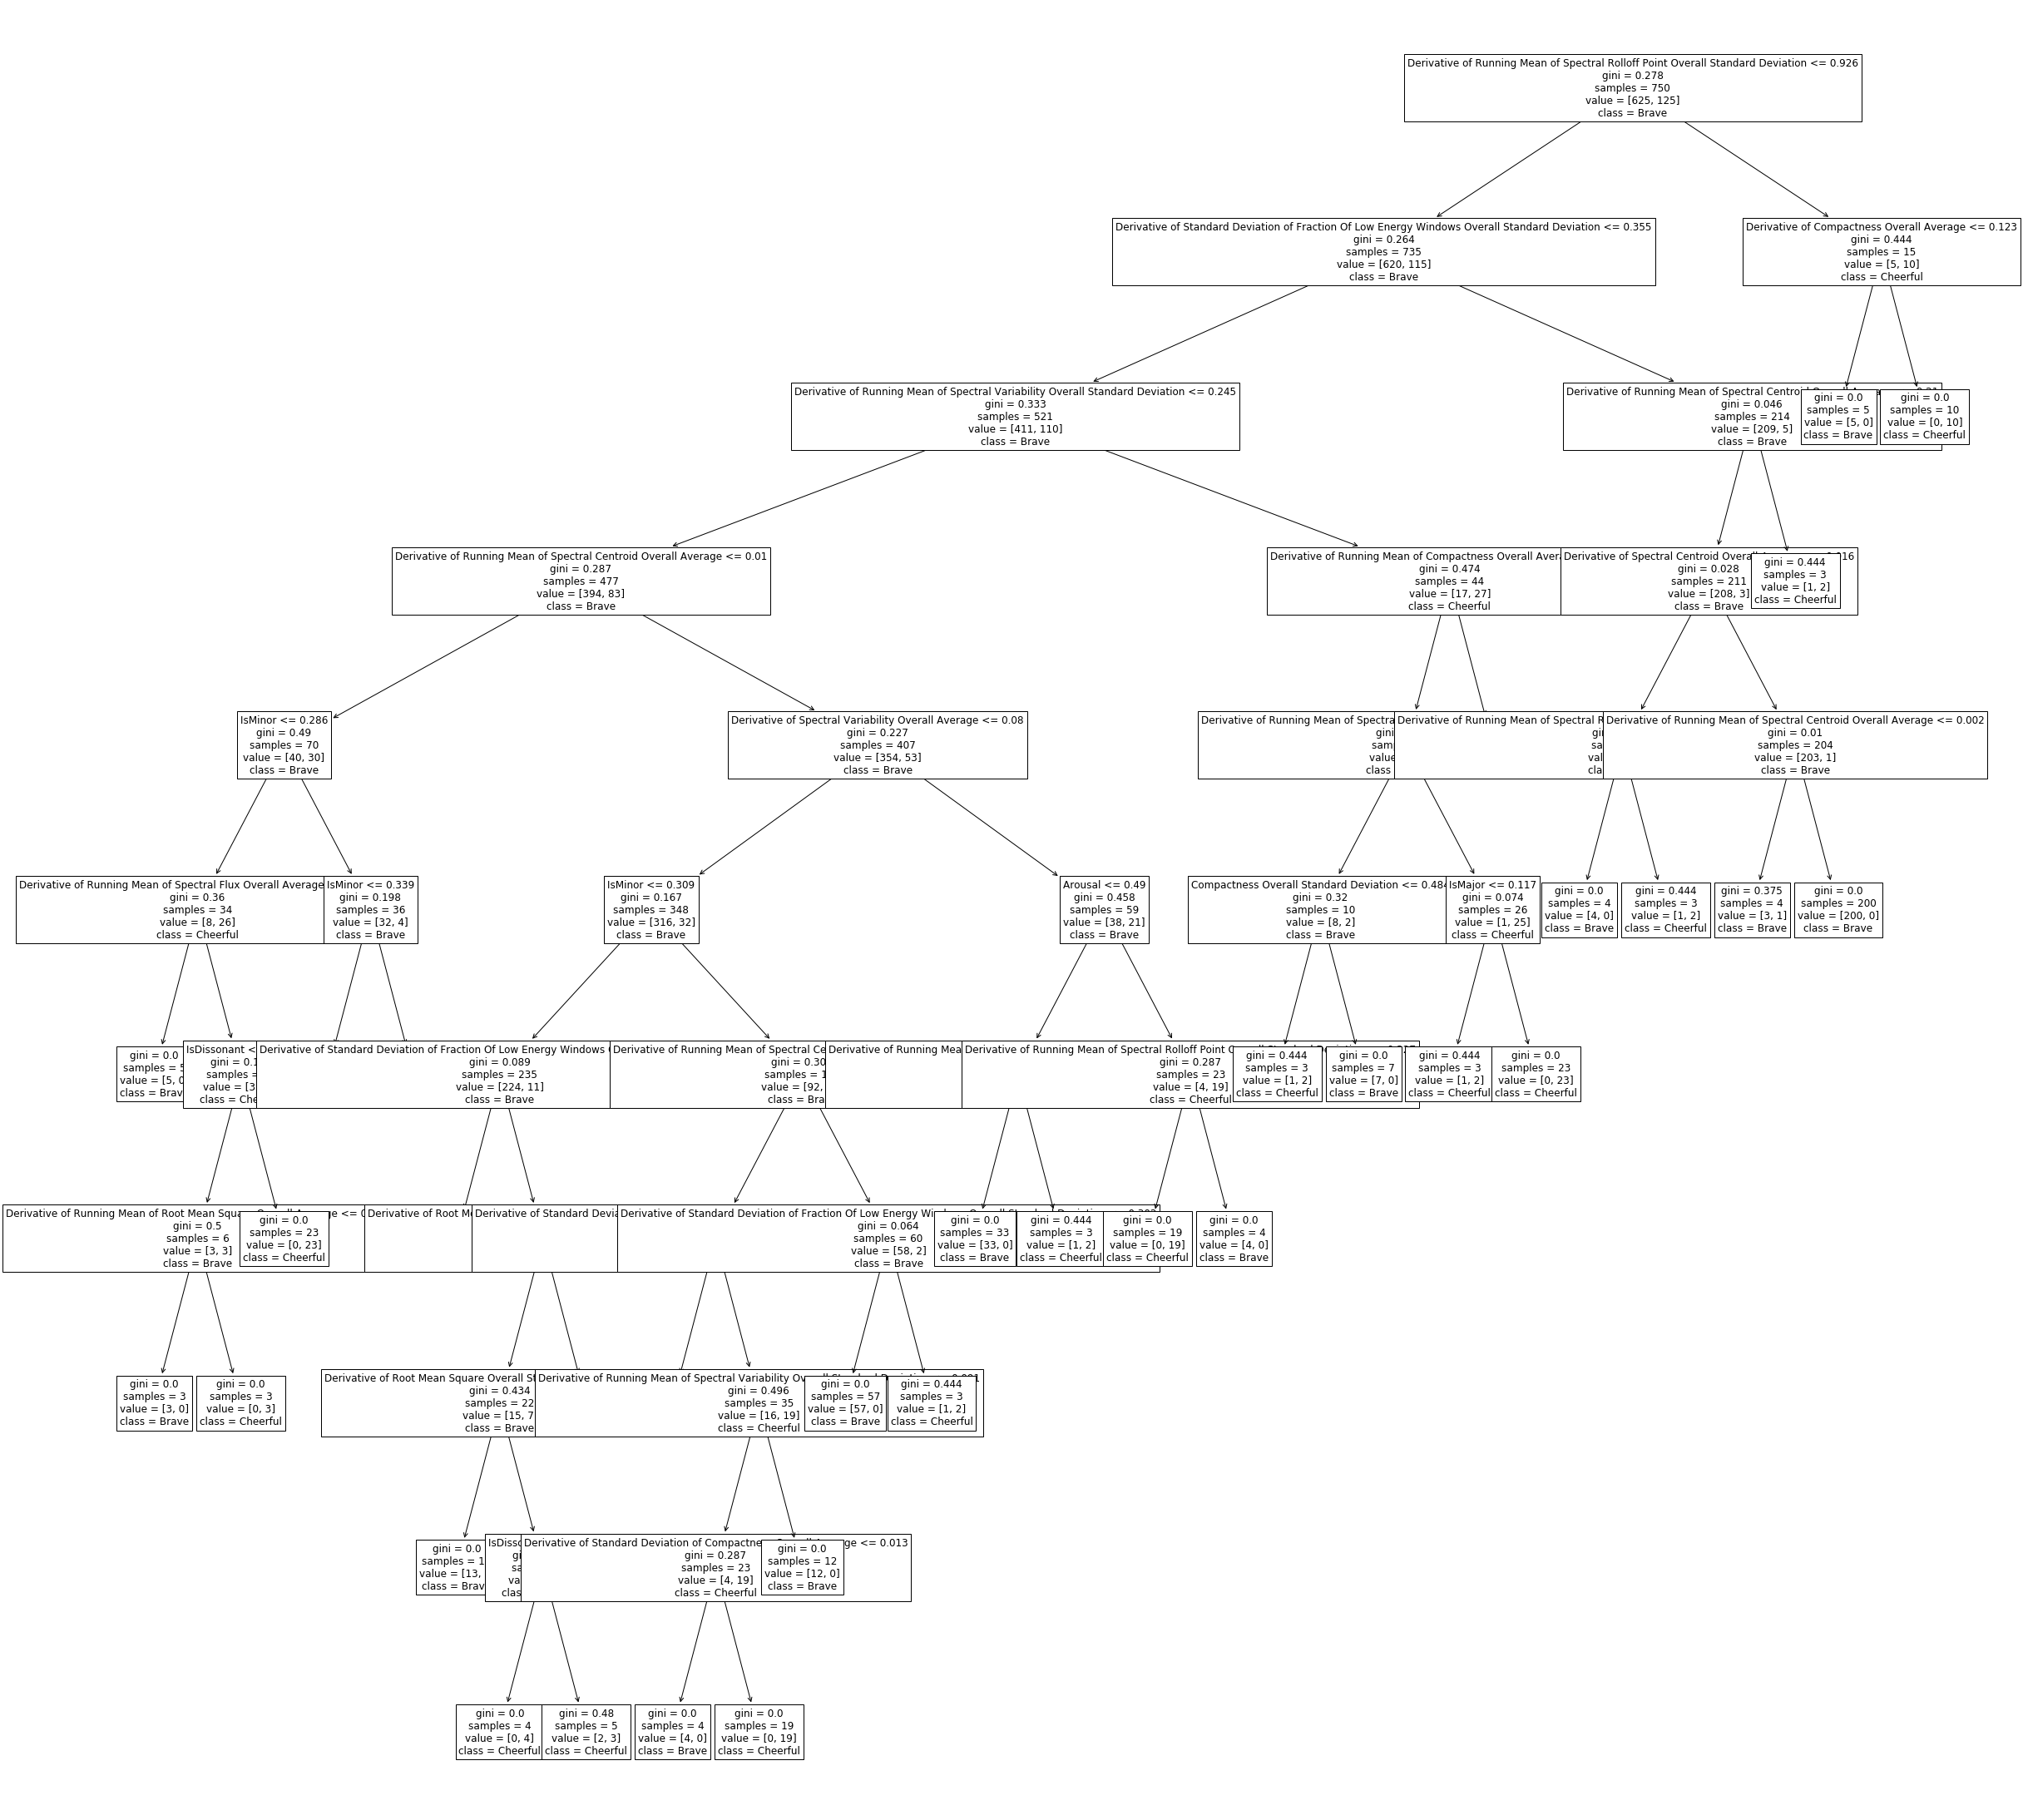

Derivative_of_Method_of_Moments_Overall_Average <= 0.93 and Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average <= 0.36 and Derivative_of_MFCC_Overall_Average <= 0.24 and Standard_Deviation_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.01 and Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Average <= 0.29 and Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation <= 0.07 and not Themes == 6 Confidence: 0
Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation > 0.07 and Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Standard_Deviation <= 0.08 and Standard_Deviation_of_Compactness_Overall_Average <= 0.72 and not Themes == 6 Confidence: 0
Standard_Deviation_of_Compactness_Overall_Average > 0.72 and Themes == 6 Confidence: 0.09725685785536159
Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Standard_Deviation > 0.08 and Themes == 6 Confidence: 0
Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Average > 0.29 and 

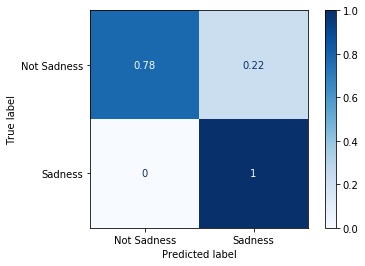

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],rscv,themes[i], verbose = False)
    disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    disp_conf_and_lift(rscv.best_estimator_, features, i+1)
    test_res("Random Oversampling",x_val,ovr_val[i],rscv,themes[i])

Best Score: 0.8360
criterion => gini
max_depth => 37
min_samples_leaf => 0.033820874459354944
min_samples_split => 0.30084969843770415
splitter => random
Splits: 5
SMOTE Train Accuracy: 83.3333%


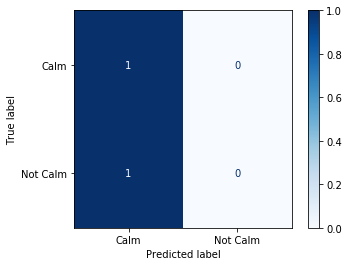

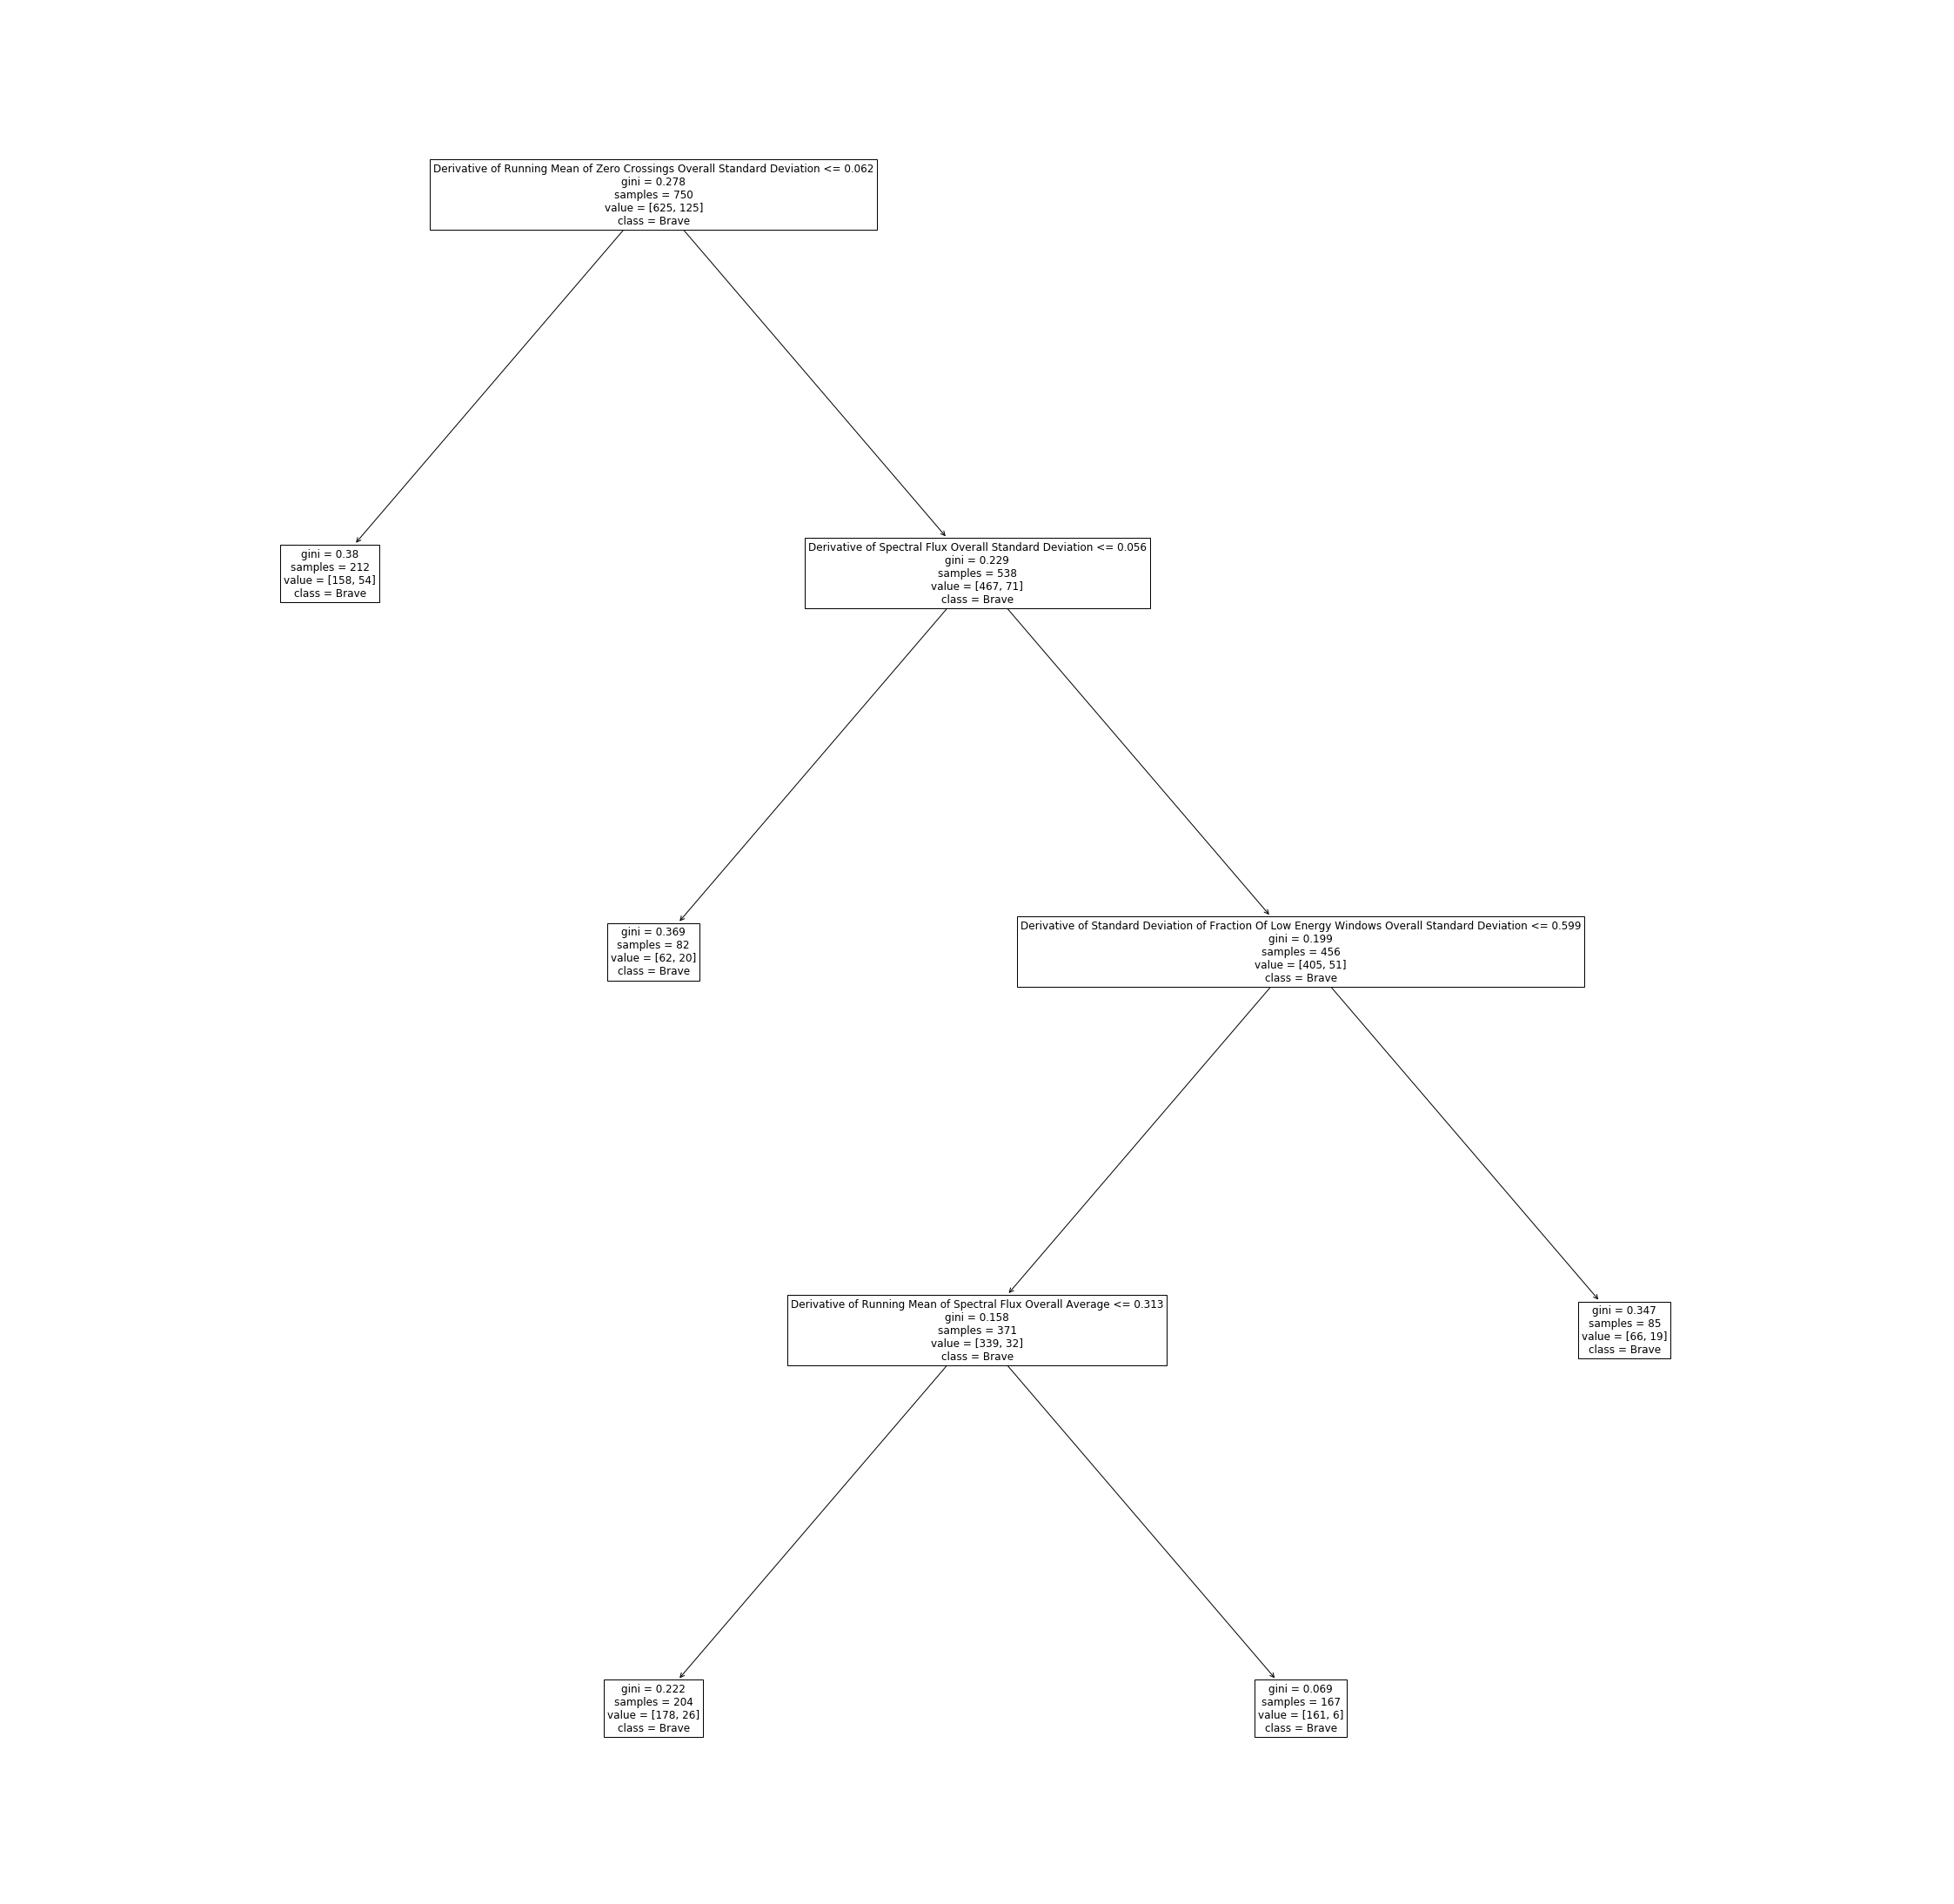

Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.06 and not Themes == 1 Confidence: 0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.06 and Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average <= 0.06 and not Themes == 1 Confidence: 0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Average > 0.06 and Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average <= 0.60 and Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation <= 0.31 and not Themes == 1 Confidence: 0
Standard_Deviation_of_Spectral_Flux_Overall_Standard_Deviation > 0.31 and not Themes == 1 Confidence: 0
Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average > 0.60 and not Themes == 1 Confidence: 0.6882793017456359
Average Confidence: 0.1376558603491272
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.06 and not Themes == 1 Lift: 0.0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.06 and Derivative_of_Peak_Based_Spec

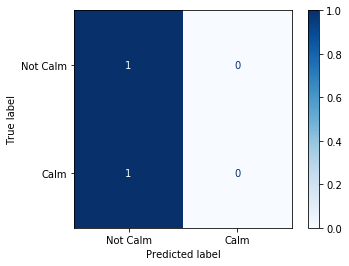

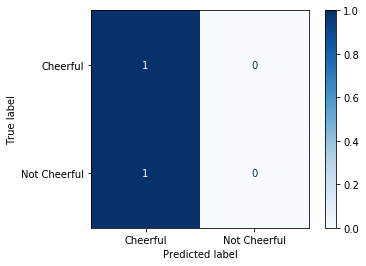

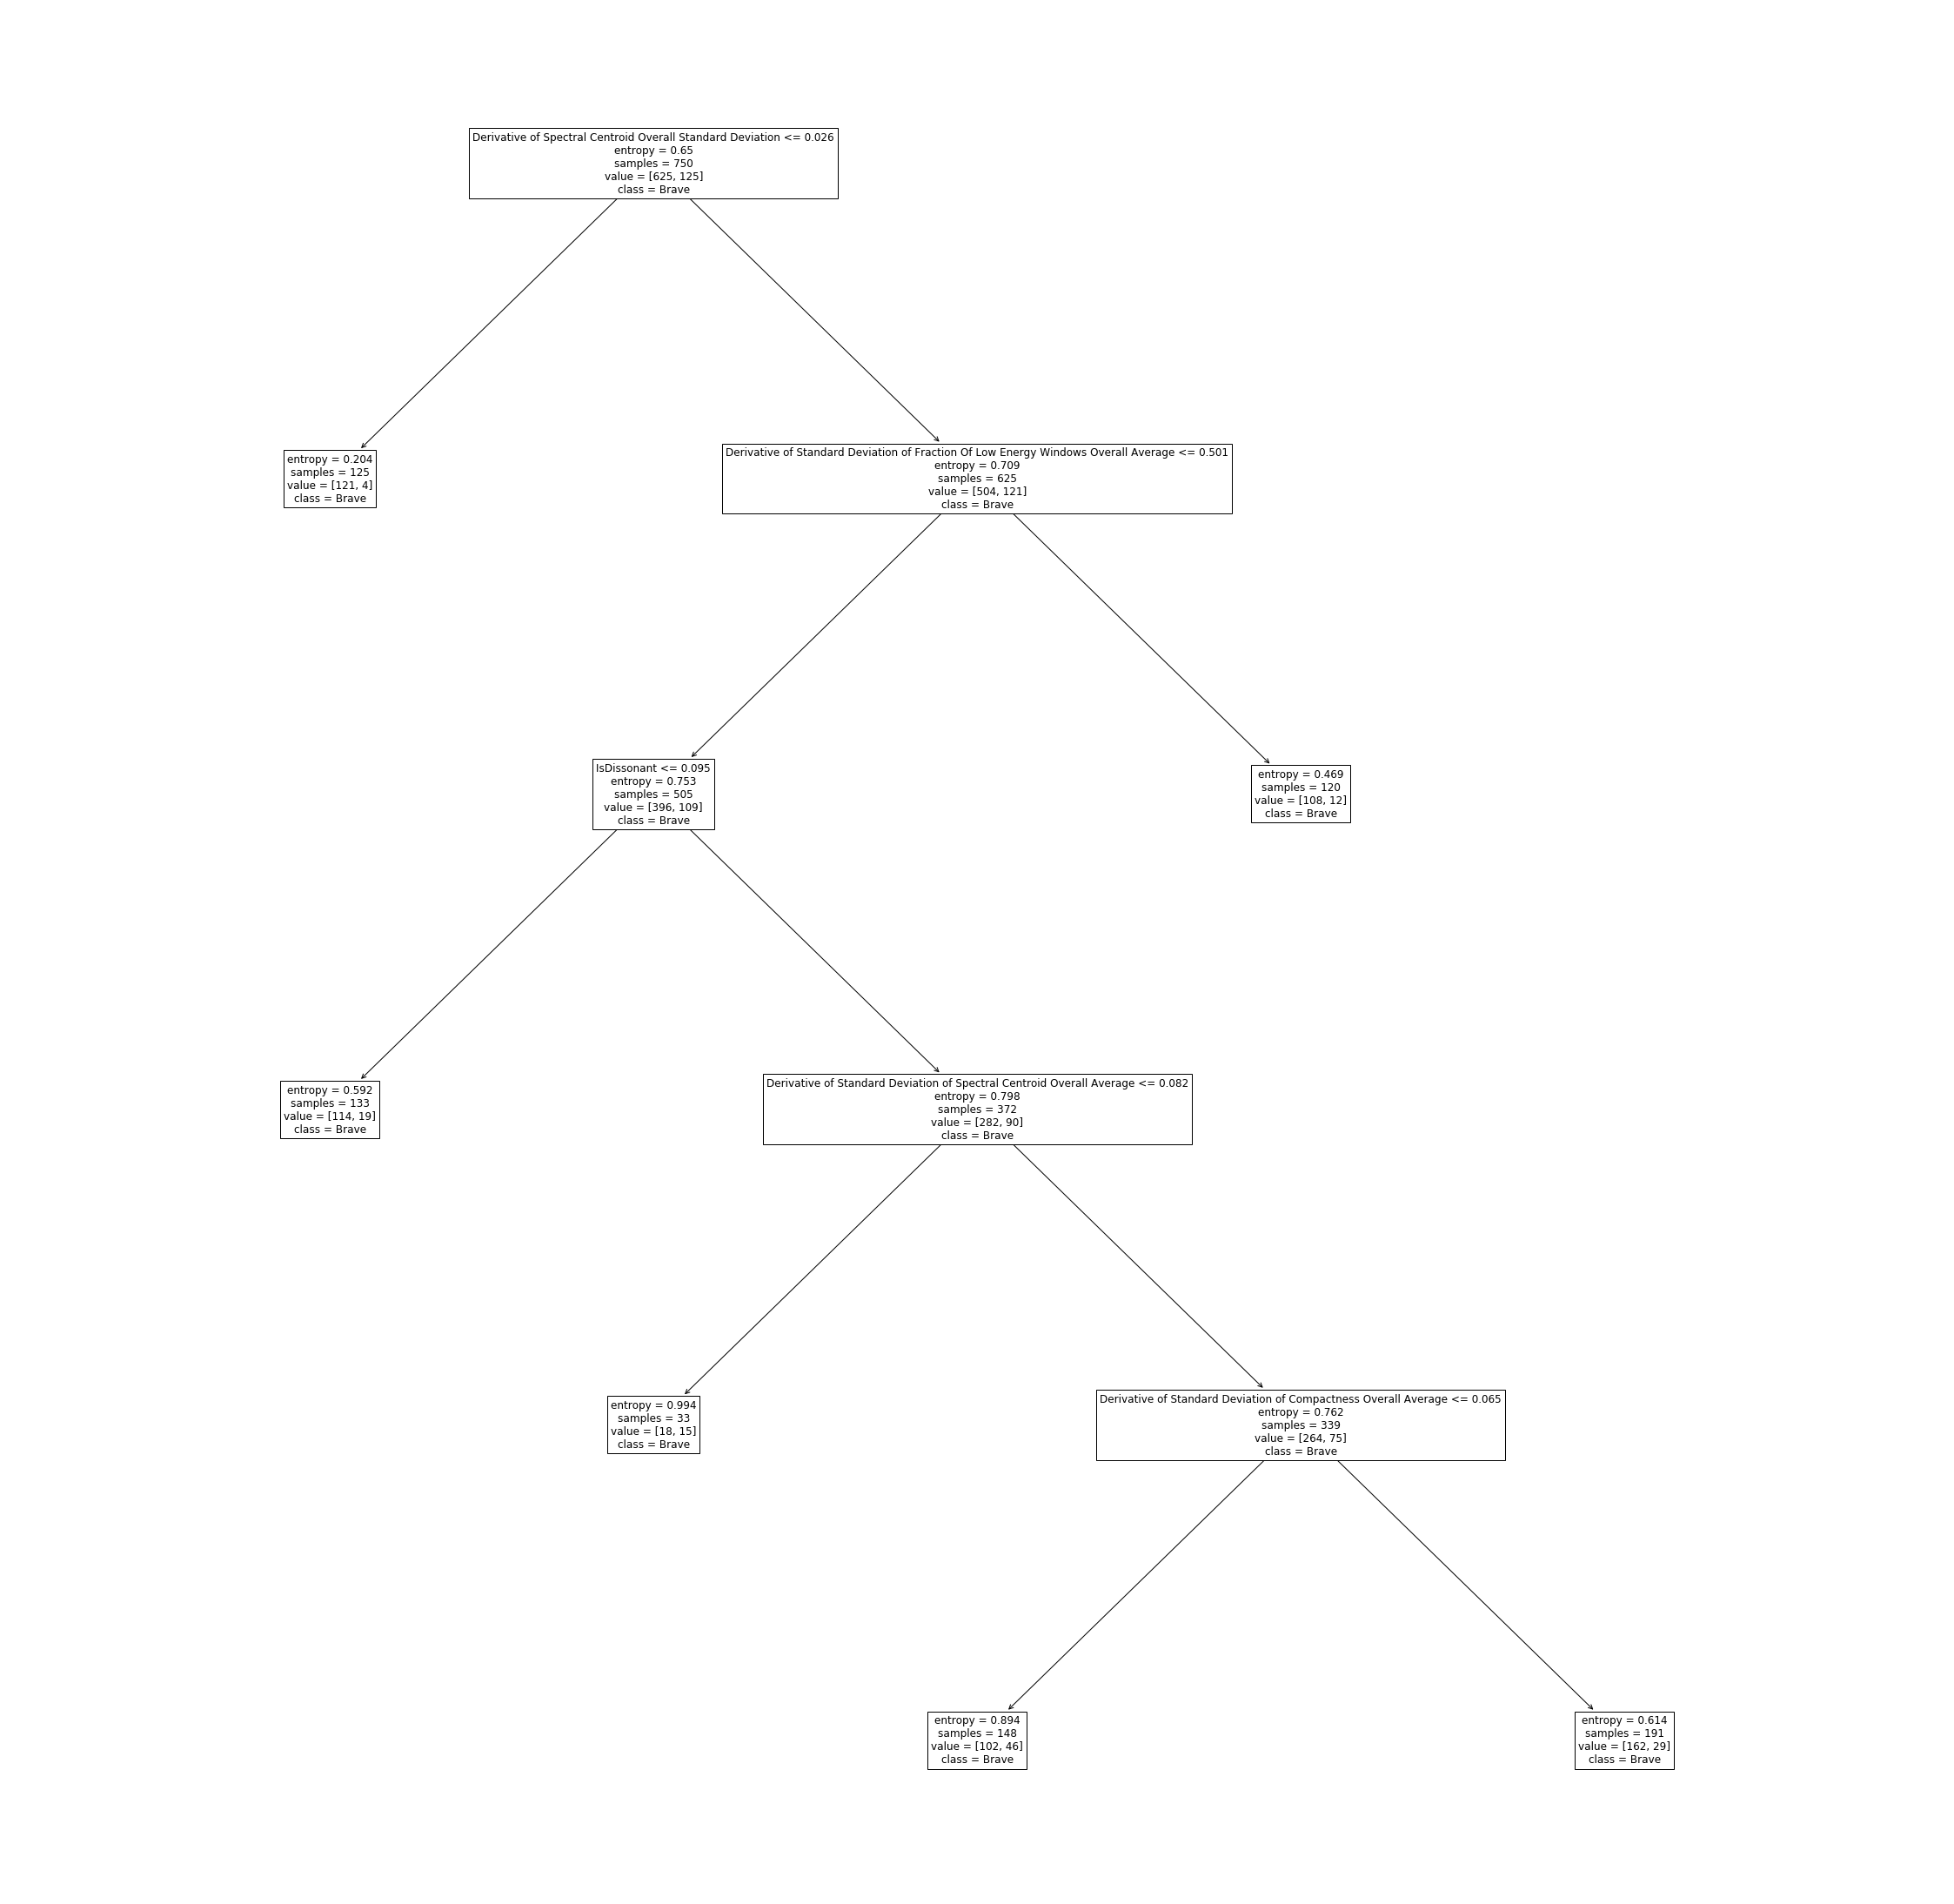

Derivative_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.03 and not Themes == 2 Confidence: 0
Derivative_of_Partial_Based_Spectral_Flux_Overall_Average > 0.03 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.50 and Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Standard_Deviation <= 0.09 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Standard_Deviation > 0.09 and Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.08 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average > 0.08 and Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation <= 0.07 and not Themes == 2 Confidence: 0
Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation > 0.07 and not Themes == 2 Confidence: 0.8628428927680798
Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation > 0.50 and not Themes == 2 Confidence: 0.86284289276807

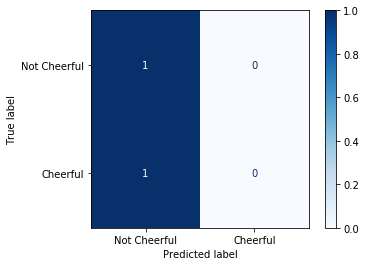

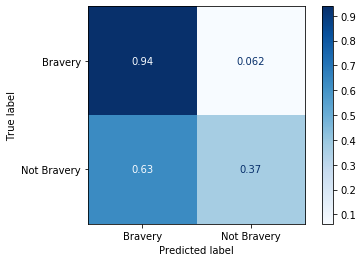

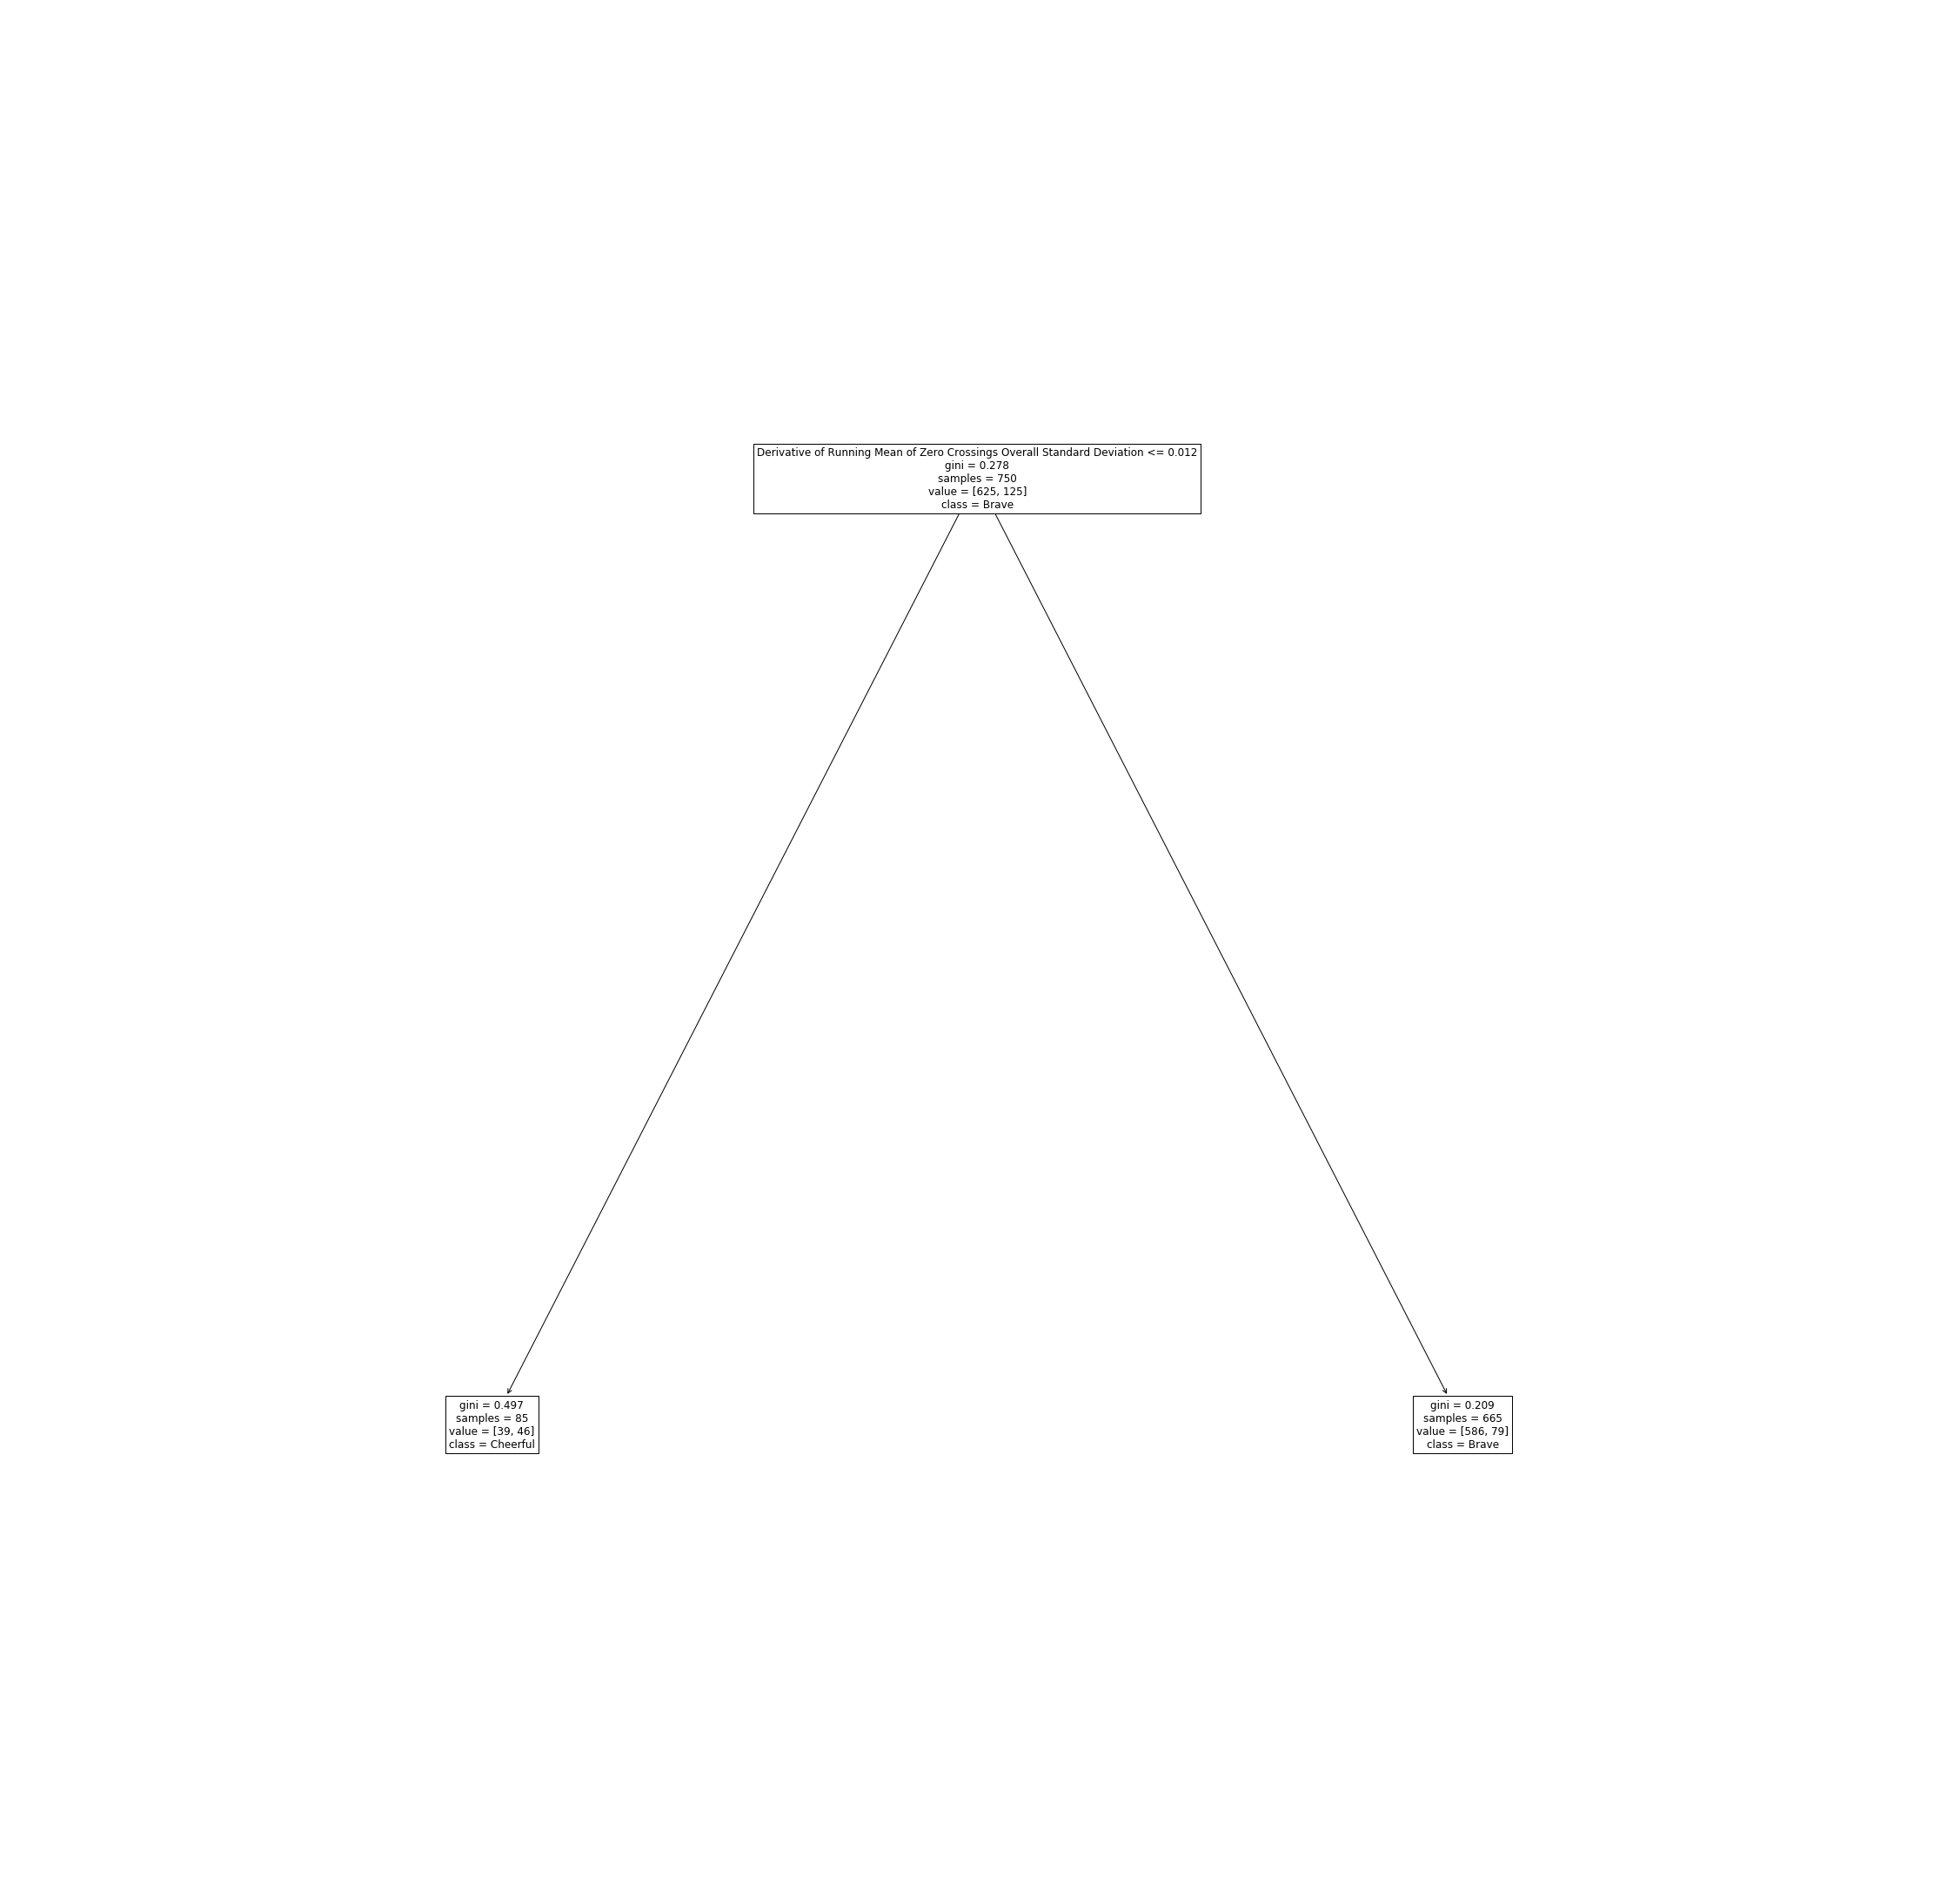

Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.01 and Themes == 3 Confidence: 0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.01 and not Themes == 3 Confidence: 0.8603491271820449
Average Confidence: 0.43017456359102246
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.01 and Themes == 3 Lift: 0.0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.01 and not Themes == 3 Lift: 6.1607142857142865
Average Lift: 3.0803571428571432
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 42.86%
SMOTE F1-score: 0.44


Best Score: 0.8333
criterion => entropy
max_depth => 25
min_samples_leaf => 0.13152036668358508
min_samples_split => 0.4722773606930356
splitter => best
Splits: 5
SMOTE Train Accuracy: 83.3333%


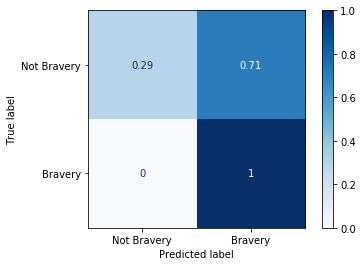

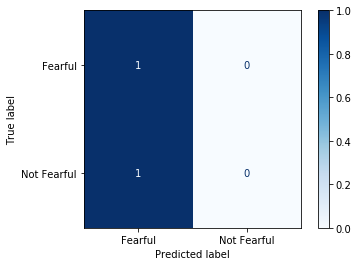

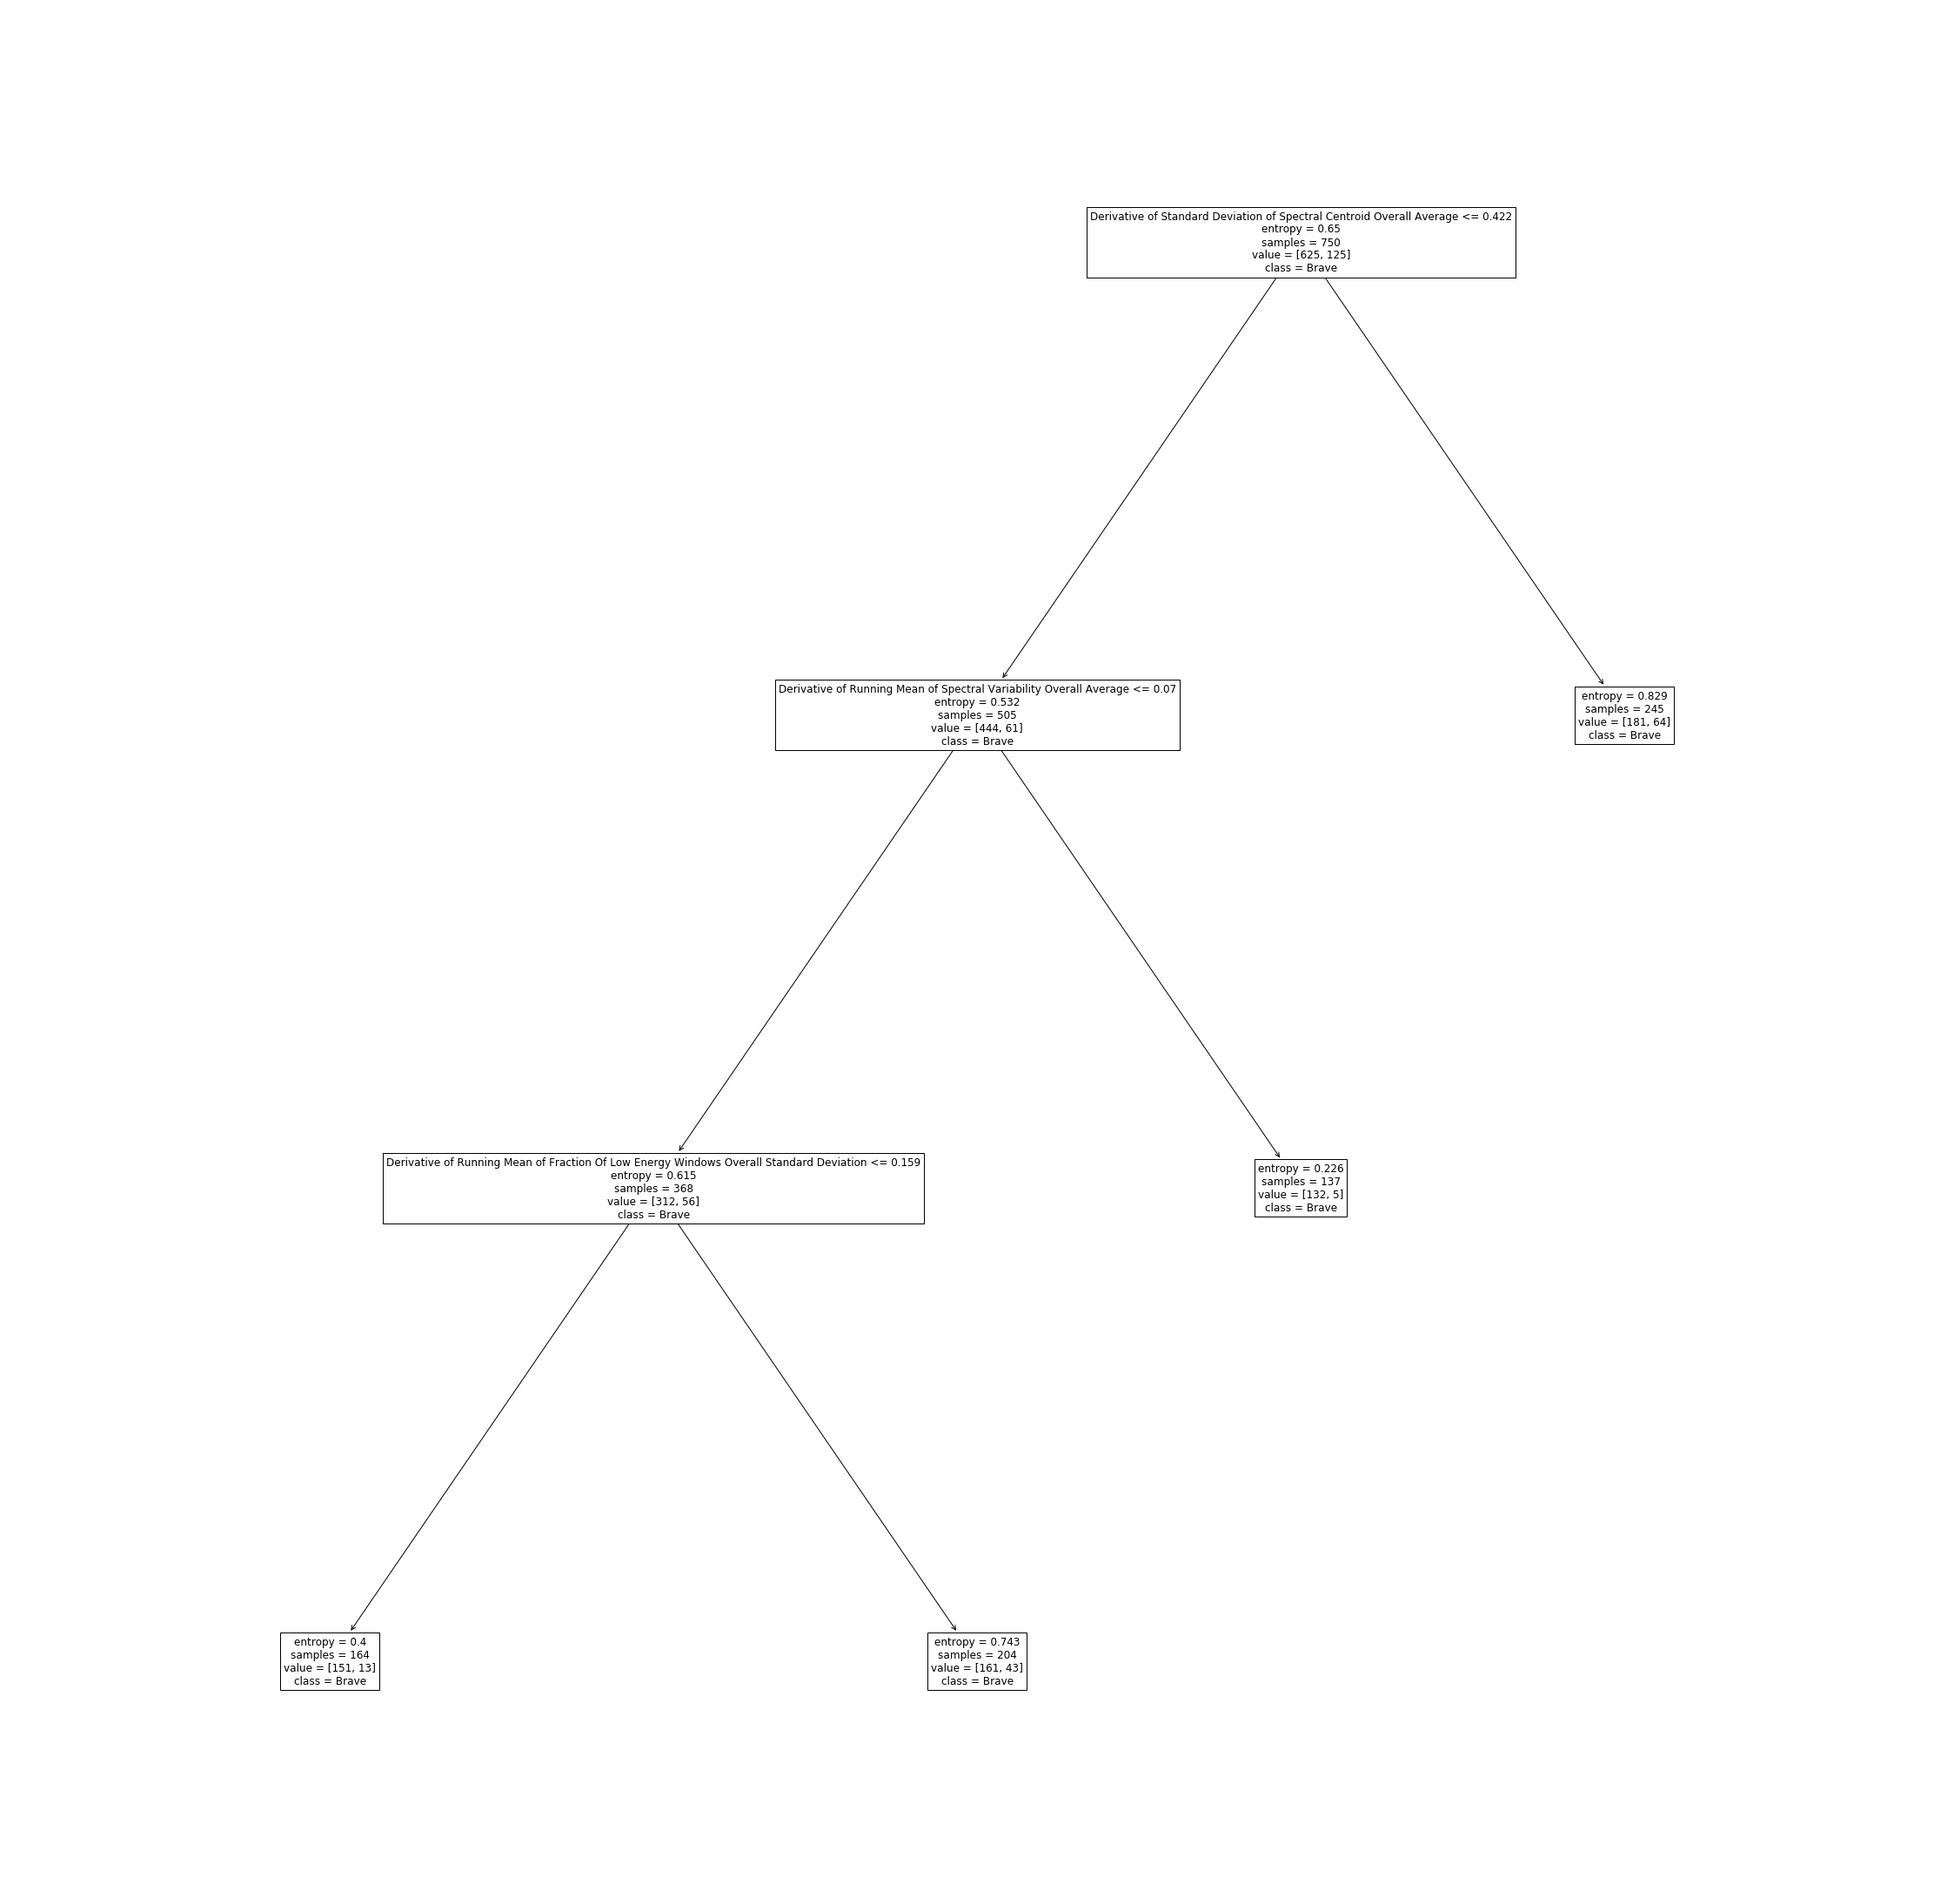

Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.42 and Derivative_of_Method_of_Moments_Overall_Standard_Deviation <= 0.07 and Spectral_Rolloff_Point_Overall_Standard_Deviation <= 0.16 and not Themes == 4 Confidence: 0
Spectral_Rolloff_Point_Overall_Standard_Deviation > 0.16 and not Themes == 4 Confidence: 0.7471264367816092
Derivative_of_Method_of_Moments_Overall_Standard_Deviation > 0.07 and not Themes == 4 Confidence: 0.7531172069825436
Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average > 0.42 and not Themes == 4 Confidence: 0.7531172069825436
Average Confidence: 0.5633402126866741
Derivative_of_Running_Mean_of_Partial_Based_Spectral_Flux_Overall_Average <= 0.42 and Derivative_of_Method_of_Moments_Overall_Standard_Deviation <= 0.07 and Spectral_Rolloff_Point_Overall_Standard_Deviation <= 0.16 and not Themes == 4 Lift: 0.0
Spectral_Rolloff_Point_Overall_Standard_Deviation > 0.16 and not Themes == 4 Lift: 3.02623940554975
Derivative

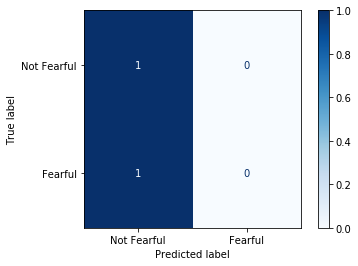

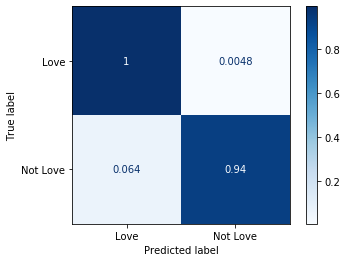

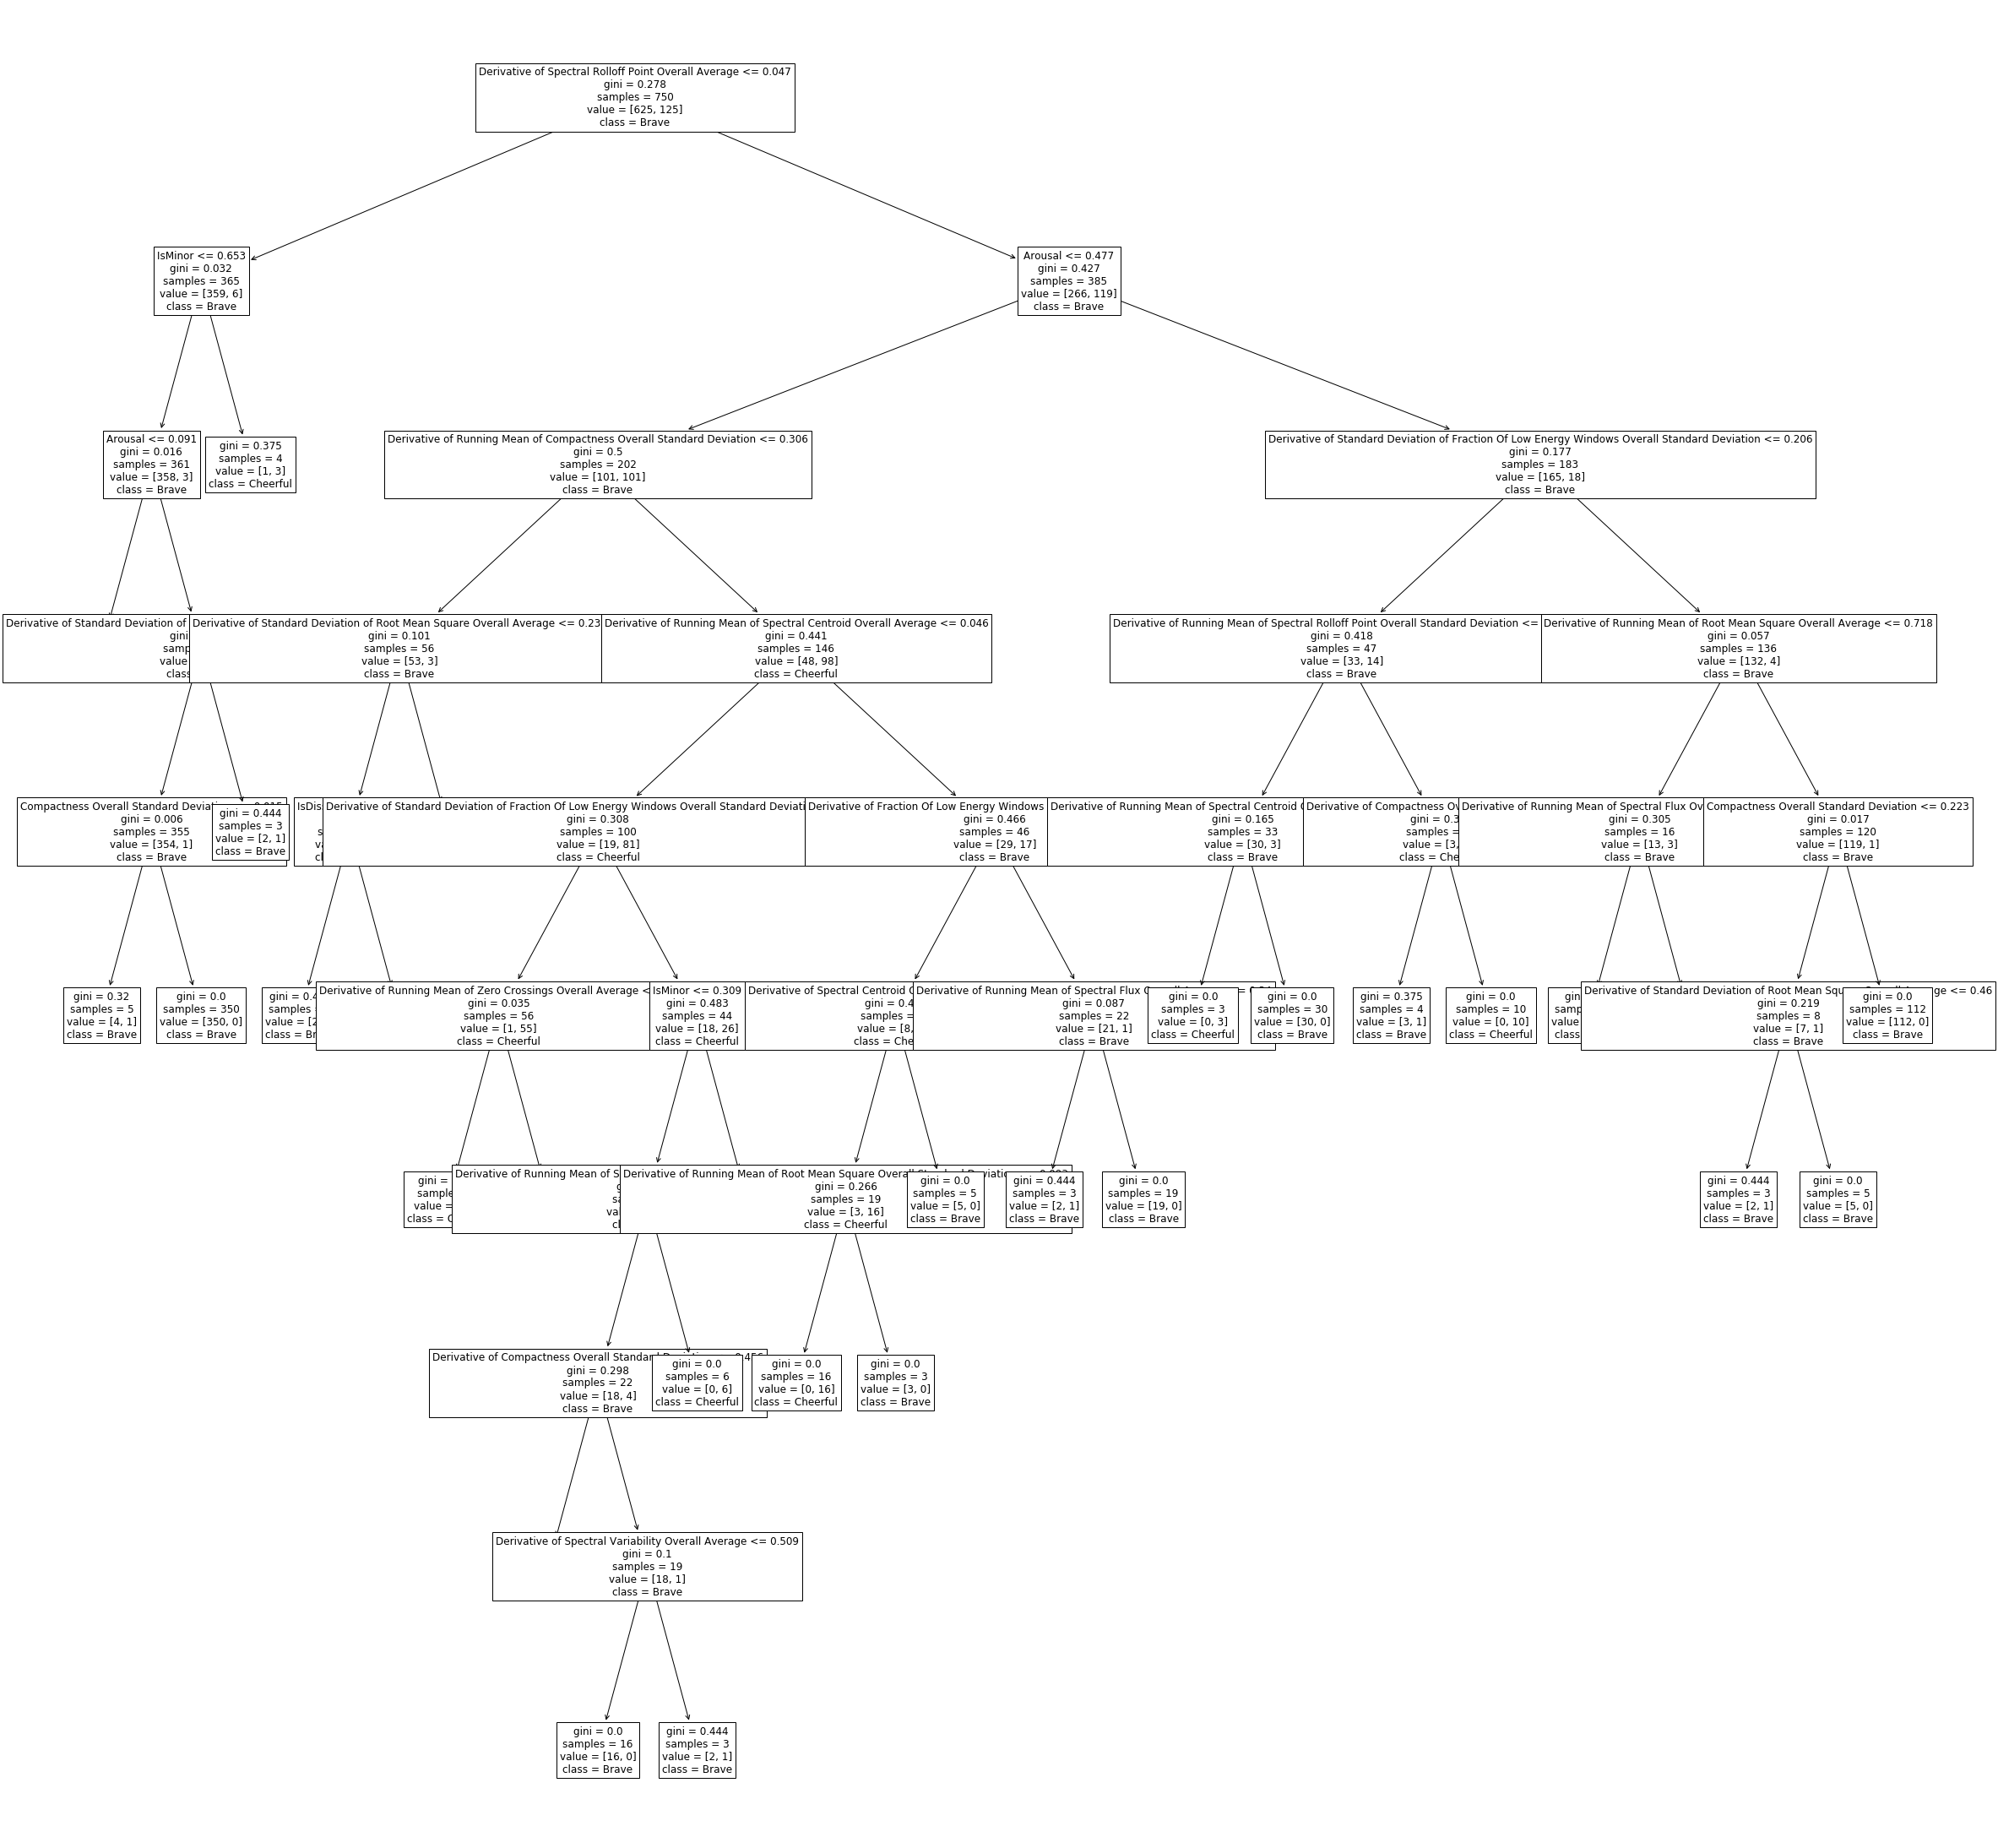

Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Standard_Deviation <= 0.05 and Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Average <= 0.65 and Derivative_of_Running_Mean_of_Fraction_Of_Low_Energy_Windows_Overall_Average <= 0.09 and not Themes == 5 Confidence: 0
Derivative_of_Running_Mean_of_Fraction_Of_Low_Energy_Windows_Overall_Average > 0.09 and Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation <= 0.09 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.02 and not Themes == 5 Confidence: 0
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.02 and not Themes == 5 Confidence: 0.9326683291770573
Derivative_of_Running_Mean_of_Beat_Sum_Overall_Standard_Deviation > 0.09 and not Themes == 5 Confidence: 0.9326683291770573
Derivative_of_Running_Mean_of_Spectral_Variability_Overall_Average > 0.65 and Themes == 5 Confidence: 0
Derivative_of_Peak_Based_Spectral_Smoothness_Overall_Standard_Deviation > 0.05 and Derivative_of_Running_M

Best Score: 0.8787
criterion => gini
max_depth => 36
min_samples_leaf => 0.0031299385321771384
min_samples_split => 0.0022751910270725206
splitter => best
Splits: 5
SMOTE Train Accuracy: 97.3333%


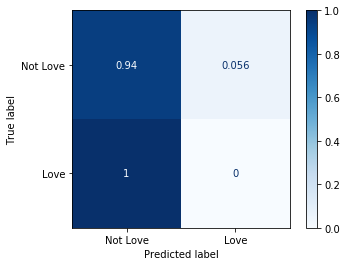

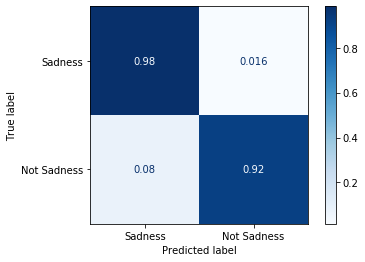

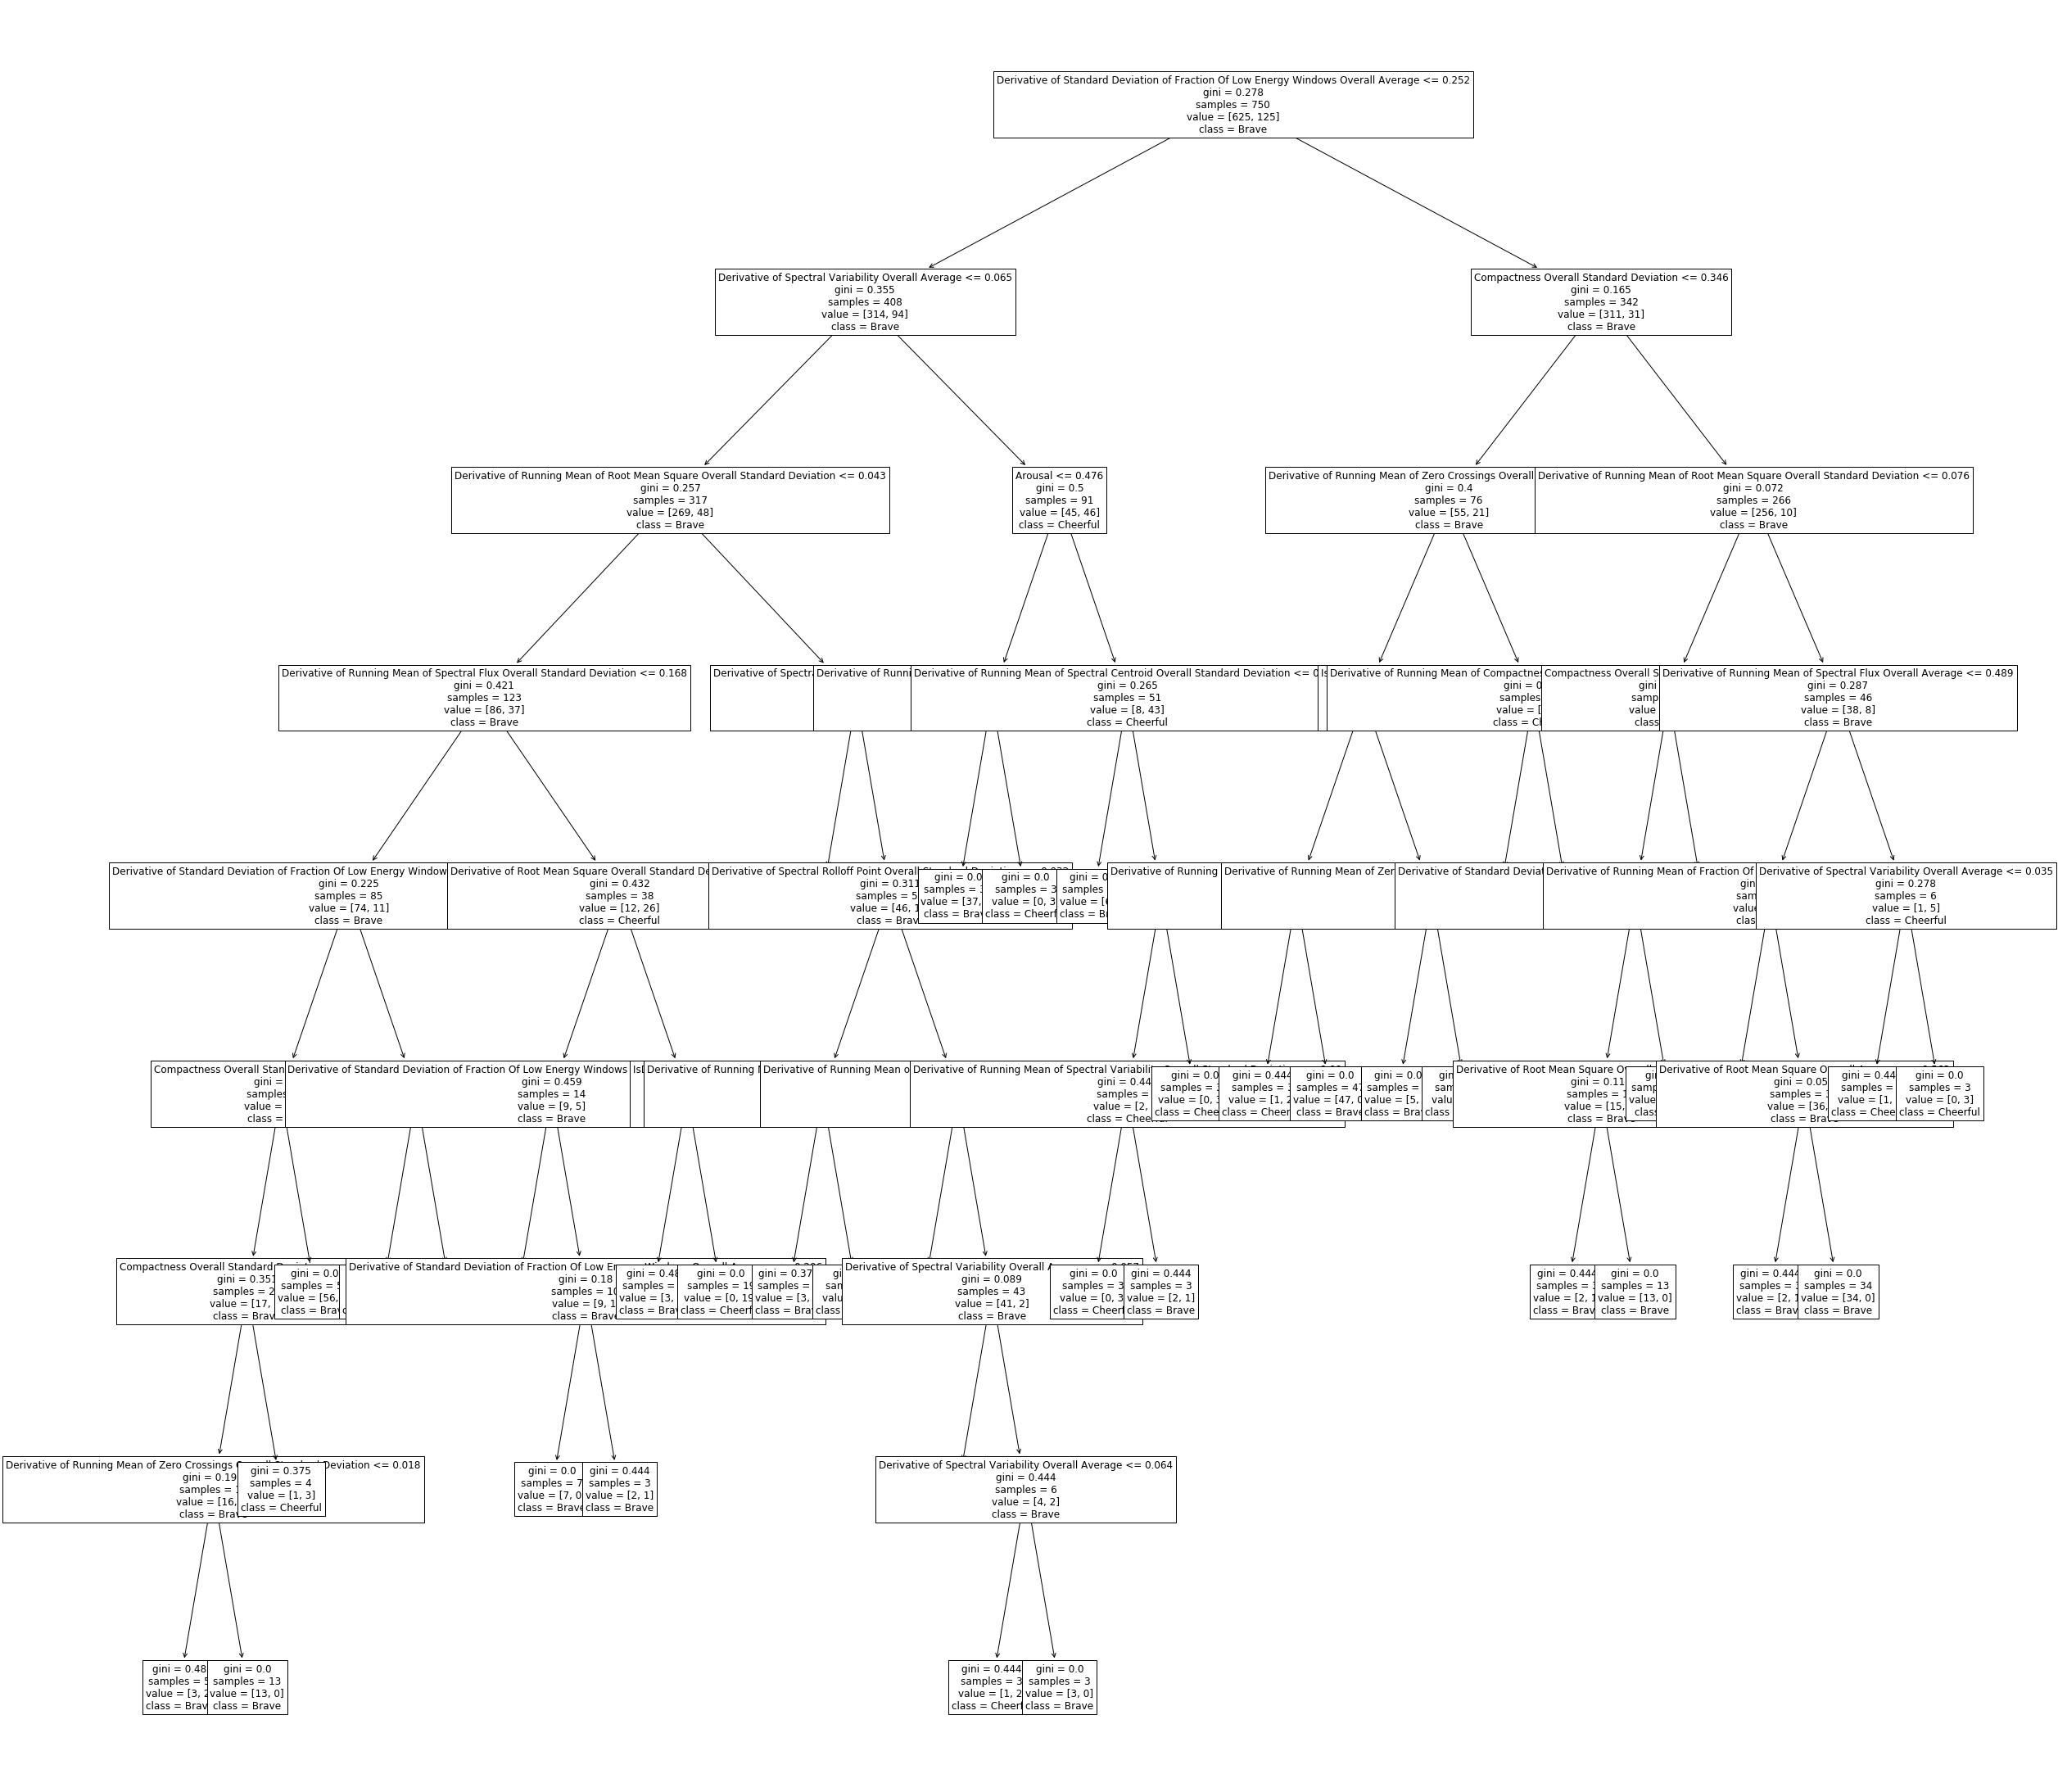

Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.25 and Derivative_of_Relative_Difference_Function_Overall_Standard_Deviation <= 0.07 and Standard_Deviation_of_Spectral_Centroid_Overall_Average <= 0.04 and Standard_Deviation_of_Spectral_Rolloff_Point_Overall_Average <= 0.17 and Derivative_of_Running_Mean_of_LPC_Overall_Standard_Deviation <= 0.22 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.42 and Derivative_of_Spectral_Centroid_Overall_Standard_Deviation <= 0.36 and Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average <= 0.02 and not Themes == 6 Confidence: 0
Derivative_of_Partial_Based_Spectral_Centroid_Overall_Average > 0.02 and not Themes == 6 Confidence: 0.9027431421446384
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.36 and Themes == 6 Confidence: 0.09725685785536159
Derivative_of_Spectral_Centroid_Overall_Standard_Deviation > 0.42 and not Themes == 6 Confidence: 0.9027431421446384
Derivative_of_Running_Mean_of_LPC_

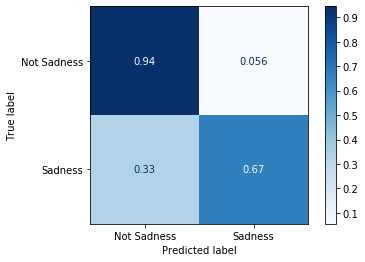

In [8]:
for i in range(0,6):
    if(i > 0):
        print()
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],rscv,themes[i])
    disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    disp_conf_and_lift(rscv.best_estimator_, features, i+1)
    test_res("SMOTE",x_val,ovr_val[i],rscv,themes[i])

In [8]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# 38.10% 0.36
feat_sel_2 = SelectFromModel(\
                estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


In [9]:
# Random Forest
random_search_iterations = 1000
n_splits = 5
rand_seed = 108750183

parameters = {
    'n_estimators' : [i for i in range(90,151)],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [i for i in range(1,num_features + 1)],
    'min_samples_split' : uniform(loc=0.01,scale=0.99),
    'min_samples_leaf' : uniform(loc=0.01,scale=0.49),
    'bootstrap' : [True, False],
    'warm_start' : [True, False],
}

# train classifier for SMOTE data
random_forest = RandomForestClassifier(random_state=rand_seed)
random_search_random_forest = \
                        RandomizedSearchCV(random_forest, parameters,\
                                           cv=n_splits, \
                                           random_state=rand_seed, \
                                           n_iter=random_search_iterations,\
                                           n_jobs=-1)

Best Score: 0.6958
Vanilla Train Accuracy: 68.8279%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.8678
Vanilla Train Accuracy: 91.7706%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79

Best Score: 0.8629
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.7531
Vanilla Train Accuracy: 75.3117%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.9327
Vanilla Train Accuracy: 93.2668%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79



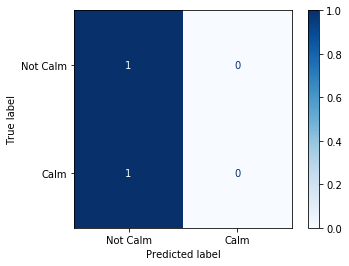

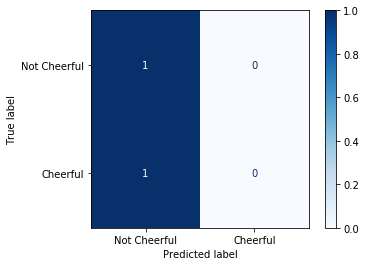

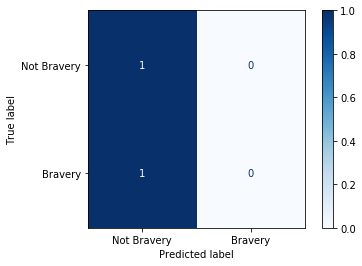

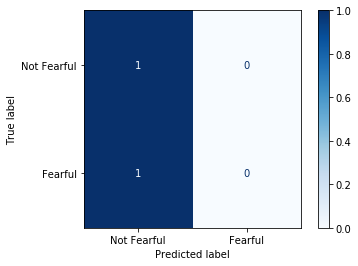

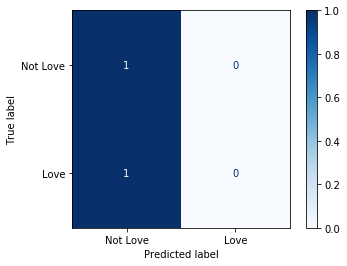

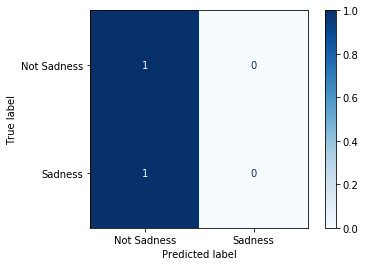

In [10]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_random_forest, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_random_forest, themes[i])

Best Score: 0.8413
Random Oversampling Train Accuracy: 84.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.9493
Random Oversampling Train Accuracy: 98.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79

Best Score: 0.9280
Random Oversampling Train Accuracy: 97.6000%
[0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.75

Best Score: 0.8387
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.9907
Random Oversampling Train Accuracy: 9

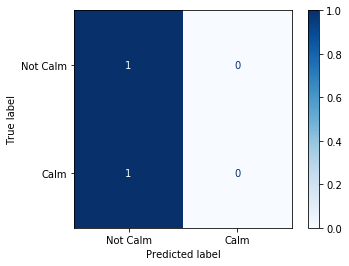

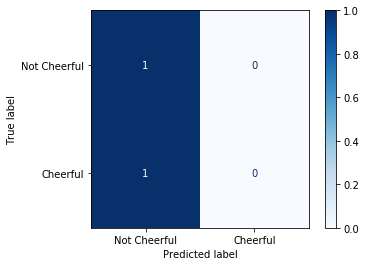

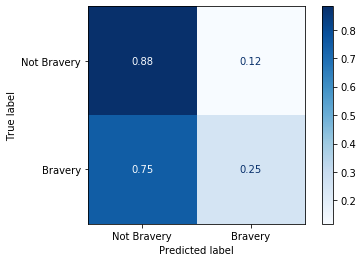

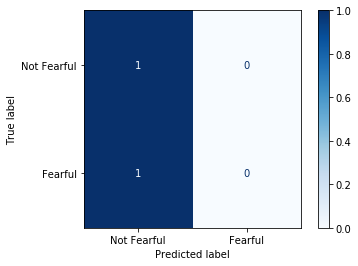

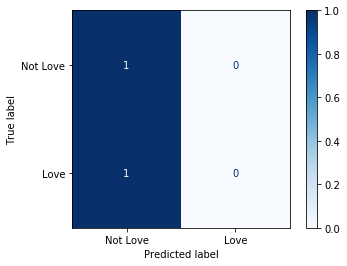

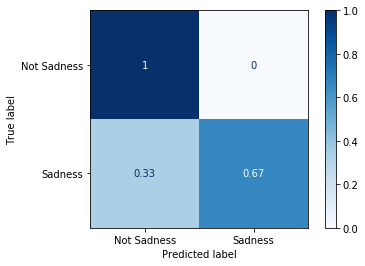

In [11]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_random_forest,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_random_forest,themes[i])

Best Score: 0.8400
bootstrap => False
criterion => gini
max_depth => 43
min_samples_leaf => 0.013296498830860164
min_samples_split => 0.62950233173912
n_estimators => 115
warm_start => True
Splits: 5
SMOTE Train Accuracy: 84.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72

Best Score: 0.9027
bootstrap => False
criterion => entropy
max_depth => 14
min_samples_leaf => 0.013545768219276944
min_samples_split => 0.02246193690011469
n_estimators => 132
warm_start => True
Splits: 5
SMOTE Train Accuracy: 96.9333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79

Best Score: 0.8800
bootstrap => False
criterion => entropy
max_depth => 14
min_samples_leaf => 0.013545768219276944
min_samples_split => 0.02246193690011469
n_estimators => 132
warm_start => True
Splits: 5
SMOTE Train Accuracy: 96.4000%
[0 0 0 

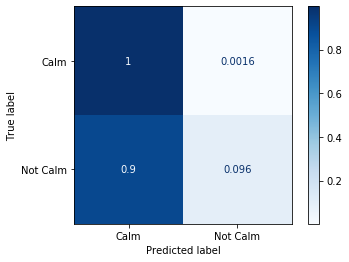

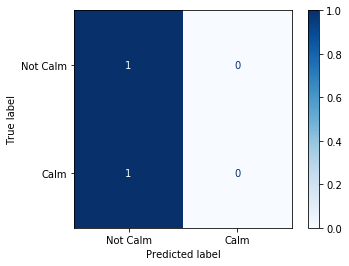

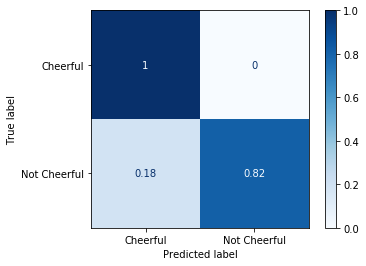

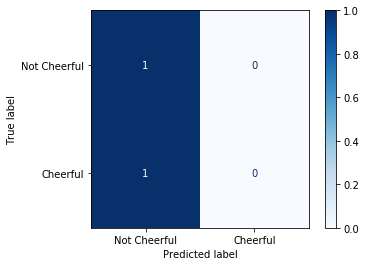

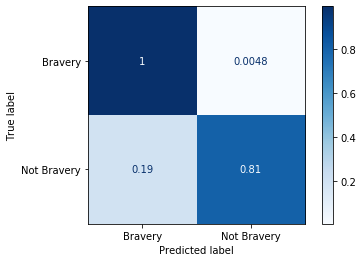

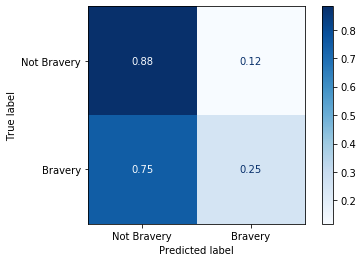

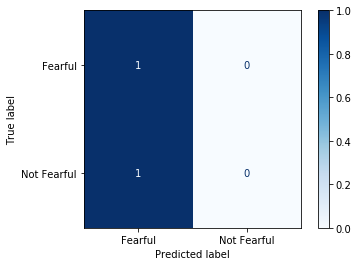

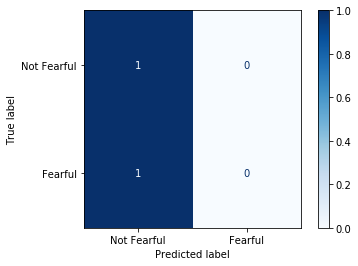

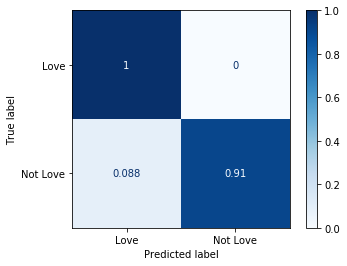

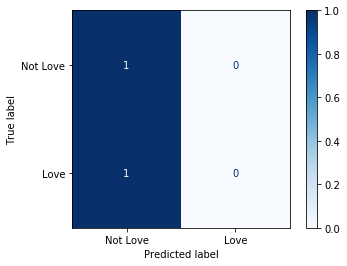

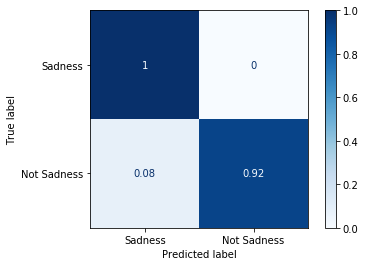

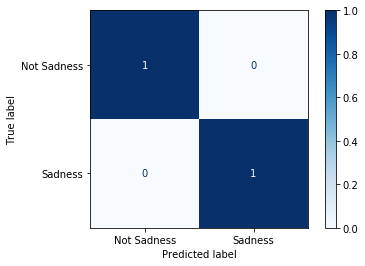

In [12]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_random_forest,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_random_forest,themes[i])